<h2> Table of contents</h2>
1. Introduction
2. Import libraries
3. #############
4. ##########
5. ###############
6. ###############
7. ###############
8. ###############
9. ###############
10. ###############
11. ###############
12. ###############
13. Conclusion

<h3><u>Instructions</u></h3>

<p>something good</p>

<h3><u>Import libraries</u></h3>

In [46]:
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows',4000)
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import requests
import json
import pprint
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import sent_tokenize,word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


<h3><u>Upload Annual_Crime_Austin_2014_to_2016_update.csv </u></h3>

In [47]:
df_Crime_Austin_2014_to_2016 = pd.read_csv('Annual_Crime_Austin_2014_to_2016_update.csv')
df_Crime_Austin_2014_to_2016.head()

GO Primary Key  Council District         GO Highest Offense Desc  \
0     201610188.0               8.0  AGG ASLT ENHANC STRANGL/SUFFOC   
1     201610643.0               9.0  THEFT                            
2     201610892.0               4.0  AGG ROBBERY/DEADLY WEAPON        
3     201610893.0               9.0  THEFT                            
4     201611018.0               4.0  SEXUAL ASSAULT W/ OBJECT         

  Highest NIBRS/UCR Offense Description GO Report Date  \
0                           Agg Assault       1-Jan-16   
1                                 Theft       1-Jan-16   
2                               Robbery       1-Jan-16   
3                                 Theft       1-Jan-16   
4                                  Rape       1-Jan-16   

                                         GO Location Clearance Status  \
0  8600 W SH 71                                  ...                C   
1  219 E 6TH ST                                  ...                C   
2  701 W LONGSPUR BLVD                           ...                N   
3  404 COLORADO ST                               ...                N   
4                                                NaN                C   

  Clearance Date GO District  GO Location Zip  GO Census Tract  \
0      12-Jan-16           D          78735.0            19.08   
1       4-Jan-16           G          78701.0            11.00   
2       3-May-16           E          78753.0            18.23   
3      22-Jan-16           G          78701.0            11.00   
4      10-Mar-16           E          78753.0            18.33   

   GO X Coordinate  GO Y Coordinate  
0        3067322.0       10062796.0  
1        3114957.0       10070462.0  
2        3129181.0       10106923.0  
3        3113643.0       10070357.0  
4              NaN              NaN

<h3><u>Rename Column Names for df_Crime_Austin_2014_to_2016</u></h3>

In [48]:
df_Crime_Austin_2014_to_2016.rename_axis({'GO Location Zip':'Zip','Highest NIBRS/UCR Offense Description':'Austin_Offense_Description'},axis = 1, inplace=True)


<h3><u>Check for Duplicated Rows and dropna values in df_Crime_Austin_2014_to_2016 </u></h3>

In [49]:
number_of_Duplicated_Rows = df_Crime_Austin_2014_to_2016.duplicated().sum()
print('There are {} duplicated rows in df_Crime_Austin_2014_2016'.format(number_of_Duplicated_Rows))

There are 0 duplicated rows in df_Crime_Austin_2014_2016


In [50]:
df_Crime_Austin_2014_to_2016 = df_Crime_Austin_2014_to_2016.dropna()

<h3>Change zipcode to an object dtype in df_Crime_Austin_2014_to_2016 dataframe </h3>

In [51]:
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(int)
df_Crime_Austin_2014_to_2016['Zip'] = df_Crime_Austin_2014_to_2016.Zip.astype(str)

In [114]:
m = {'Agg Assault':'Aggravated Assault'}

<h3>Save df_Crime_Austin_2014_to_2016 as .csv file </h3>

In [52]:
df_Crime_Austin_2014_to_2016.to_csv('Final_Generated_Crime_Austin_2014_to_2016.csv',index=False)

Index(['GO Primary Key', 'Council District', 'GO Highest Offense Desc',
       'Austin_Offense_Description', 'GO Report Date', 'GO Location',
       'Clearance Status', 'Clearance Date', 'GO District', 'Zip',
       'GO Census Tract', 'GO X Coordinate', 'GO Y Coordinate'],
      dtype='object')

<h3>Setup YELP  API Authentication</h3>

In [53]:
keys ={"client_id":"acsWZVrkgYT2pceSbVY3SA" ,
      "client_secret": "3P6HCoVLXl5IddCFs0yokn8fZ2gzkvzzatJaUjG0PJrD5Xi9gbPvrkBwYFwMmnMP"}

token = requests.post(url="https://api.yelp.com/oauth2/token",data=keys).json()

access_token = token['access_token']

headers = {'Authorization': 'bearer %s' % access_token}

<h3>Austin ZipCodes</h3>

In [54]:
#There are 48 different zip codes in the df_Crime_Austin_2014_2016 dataframe. 

austin_zips=['78735', '78701', '78753', '78724', '78741', '78704',
             '78748', '78758', '78744', '78747', '78756', '78759', 
             '78723', '78745', '78749', '78751', '78752', '78731', 
             '78702', '78722', '78705', '78757', '78721', '78739', 
             '78729', '78613', '78617', '78746', '78750', '78719', 
             '78703', '78736', '78653', '78727', '78652', '78754', 
             '78726', '78717', '78660', '78725', '78712', '78730', 
             '78742', '78728', '78732', '78737', '78733', '78610']

<h3>Yelp API Call by austin zipcode </h3>

In [55]:
#Create empty list for all the information pulled from yelp api

info = []

#Using the austin_zips list generate a json file for all the 48 austin zipcodes

for zips_codes in austin_zips:
    url = 'https://api.yelp.com/v3/businesses/search'
    params = {'location': zips_codes, 'sort_by': 'rating', 'limit' : 50}
    resp = requests.get(url=url, params=params, headers=headers).json()
    data = resp['businesses']
    info.append(data)
    

In [56]:
#pprint.pprint(info)

<h3>Generated Yelp Dataframe</h3>

In [57]:
#Store information from api in below empty lists

list_business_name = []
list_review_counts = []
list_ratings = []
list_zip_codes = []
list_id_business = []
list_city =[]
list_state = []
list_categories = []
list_address = []
list_lat = []
list_lon = []
list_price = []


#loop through json file containing all the information from Yelp API call

for x in range(len(info)):
    
    data = info[x]
   
    
    for item in data:
        list_business_name.append(item.get('name'))
        list_review_counts.append(item.get('review_count'))
        list_ratings.append(item.get('rating'))
        
        list_zip_codes.append(item.get('location').get('zip_code'))
        list_id_business.append(item.get('id'))
        list_city.append(item.get('location').get('city'))
        list_state.append(item.get('location').get('state'))
        list_categories.append(item.get('categories')[0].get('alias'))
        list_address.append(item.get('location').get('display_address')[0])
        
        list_lat.append(item.get('coordinates').get('latitude'))
        list_lon.append(item.get('coordinates').get('longitude'))
        
        list_price.append(item.get('price'))

In [58]:
#Generate df_Yelp_API dataframe

df_Yelp_API = pd.DataFrame({'Business_Name'   : list_business_name,
                            'Review_Counts'   : list_review_counts,
                            'Business_Ratings': list_ratings,
                            'Zip'             : list_zip_codes,
                            'Business_ID'     : list_id_business,
                            'City'            : list_city,
                            'State'           : list_state,
                            'Category'        : list_categories,
                            'Company_Address' : list_address,
                            'Latitude'        : list_lat,
                            'Longitude'       : list_lon,
                            'Price'           : list_price})


                           

df_Yelp_API

Business_ID  \
0                  urban-mattress-south-austin-austin-2   
1                                    healthy-pet-austin   
2                            toast-entertainment-austin   
3                            union-jack-plumbing-austin   
4                             mercedes-flowers-austin-8   
5                                       zen-well-austin   
6                         sage-blossom-massage-austin-2   
7                      barefoot-mosquito-control-austin   
8                           the-natural-gardener-austin   
9                                  throckmortons-austin   
10    manish-patel-od-todays-vision-south-towne-aust...   
11               summer-rydel-dds-a-summer-smile-austin   
12                       addis-carpet-cleaning-austin-2   
13                   third-coast-home-inspection-austin   
14                      spacecraft-entertainment-austin   
15                       creative-images-by-keri-austin   
16              texas-honey-ham-company-west-lake-hills   
17                        dash-service-company-austin-5   
18        josh-brown-team-legacy-mutual-mortgage-austin   
19             rudys-country-store-and-bar-b-q-austin-6   
20                jack-allens-kitchen-oak-hill-austin-2   
21                                 pure-skin-spa-austin   
22                               caden-roofing-austin-2   
23                                       d-lites-austin   
24                               via-313-pizza-austin-5   
25                         buddhas-brew-kombucha-austin   
26                    pure-smiles-orthodontics-austin-2   
27            travis-country-veterinary-hospital-austin   
28                                  posh-salon-austin-2   
29                            ryan-carrel-studio-austin   
30                      professional-tv-mounting-austin   
31                                   wholy-bagel-austin   
32                happy-larrys-motorcycle-towing-austin   
33                     nicole-mlakar-photography-austin   
34                         meche-organic-salon-austin-2   
35                 dan-whites-screens-and-things-austin   
36                           oak-hill-eye-care-austin-2   
37                           slab-bbq-and-beer-austin-3   
38                     realty-austin-southwest-austin-2   
39                                        beirut-austin   
40                        maryes-gourmet-pizza-austin-2   
41               eurasia-sushi-bar-and-seafood-austin-2   
42                     vintage-and-lace-weddings-austin   
43                     cleantech-carpet-cleaning-austin   
44                           i-renovate-austin-austin-2   
45                                  juiceland-austin-22   
46                           sweet-treets-bakery-austin   
47                             tacodeli-west-lake-hills   
48                                designer-nails-austin   
49                      brad-b-plumbing-services-austin   
50                                      boteco-austin-3   
51                                savor-de-moi-austin-3   
52                  town-lake-metropolitan-parks-austin   
53                                     dee-dee-austin-2   
54                                      ceviche7-austin   
55                                    halal-time-austin   
56                             franklin-barbecue-austin   
57                            the-roosevelt-room-austin   
58                                   abo-youssef-austin   
59                                    dolce-neve-austin   
60                                 grannys-tacos-austin   
61                                 via-313-pizza-austin   
62                             the-tasty-spoon-austin-2   
63                                 la-barbecue-austin-3   
64               the-wild-parrots-of-east-austin-austin   
65                                          uchi-austin   
66                           texas-state-capitol-austin   
67                      mickleth

In [59]:
#Checking to make sure they both have the same zipcodes
#100 rows need to be removed from yelp dataframe. This rows contain zipcodes which are out of scope for the analysis.

df_Yelp_API['Zip'].isin(austin_zips).value_counts()

True     2301
False      98
Name: Zip, dtype: int64

<h3>Double checking the length of Dataframe</h3>

In [60]:
#Double checking the length of Dataframe to ensure all rows contain zipcodes which are in scope

df_Yelp_API = df_Yelp_API[df_Yelp_API['Zip'].isin(austin_zips)]
df_Yelp_API.shape

(2301, 12)

In [61]:
#Comparing the number of Zips in df_Yelp_API and df_Crime_Austin_2014_to_2016

df_Yelp_API.Zip.nunique() == df_Crime_Austin_2014_to_2016.Zip.nunique()

True

<h3>Checking for duplicated columns in df_Yelp_API dataframe </h3>

In [62]:
#There are 1055 duplicated rows in this dataframe these will be deleted 

df_Yelp_API.duplicated().sum()

1056

In [63]:
#After Dropping the duplicated row the dataframe will have the following number of rows

len(df_Yelp_API) - df_Yelp_API.duplicated().sum()

1245

In [64]:
#drop duplicated rows in df_Yelp_API and keep the first 

df_Yelp_API = df_Yelp_API.drop_duplicates(keep='first')

#Checking length of df_Yelp_API to ensure it has the correct amount of rows

df_Yelp_API.shape

(1245, 12)

<h3>Create blank columns for df_Yelp_API dataframe to store all Reviews</h3>

In [65]:
#Create blank columns for df_Yelp_API dataframe to store Reviews 

df_Yelp_API['First_Review'] = " "
df_Yelp_API['First_Timestamp'] = " "

df_Yelp_API['Second_Review'] = " "
df_Yelp_API['Second_Timestamp'] = " "

df_Yelp_API['Third_Review'] = " "
df_Yelp_API['Third_Timestamp'] = " "


df_Yelp_API['Yelp_Url'] = " "

In [66]:
#Use Yelp API to place all reviews in review columns associated with df_Yelp_API dataframe

for index,row in df_Yelp_API.iterrows():
    review = row['Business_ID']
    
    url_review = 'https://api.yelp.com/v3/businesses/{}/reviews'.format(review)
    
    api_reviews = requests.get(url=url_review,headers=headers).json()
    pprint.pprint(api_reviews)
    
    df_Yelp_API.set_value(index,'First_Review',api_reviews['reviews'][0]['text'])
    df_Yelp_API.set_value(index,'First_Timestamp', api_reviews['reviews'][0]['time_created'])
    df_Yelp_API.set_value(index,'Second_Review',api_reviews['reviews'][1]['text'])
    df_Yelp_API.set_value(index,'Second_Timestamp', api_reviews['reviews'][1]['time_created'])
    df_Yelp_API.set_value(index,'Third_Review',api_reviews['reviews'][2]['text'])
    df_Yelp_API.set_value(index,'Third_Timestamp', api_reviews['reviews'][2]['time_created'])
    df_Yelp_API.set_value(index,'Yelp_Url', api_reviews['reviews'][0]['url'])
    
#display df_Yelp_API dataframe after all information has be obtained   

df_Yelp_API.head(10)

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was searching for a comfortable mattress and visited '
                      'several different stores in Austin. Deciding on a '
                      'mattress is no small decision.  But Troy was great...',
              'time_created': '2017-11-15 18:16:20',
              'url': 'https://www.yelp.com/biz/urban-mattress-south-austin-austin-2?hrid=pBFCXwUrSfK2fu7HUzJp7A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/xyxyOQpER96wH5XKR7P2kw/o.jpg',
                       'name': 'Pam Y.'}},
             {'rating': 5,
              'text': 'I was helped by a Hannah at this store and she was '
                      'helpful and informative but not pushy or a typical '
                      'mattress salesperson. I ended up purchasing my...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was amazing! Dawn blew me away. She was so '
                      'knowledgeable, and got me back to full range of motion '
                      'and out of pain for the first time in weeks. The...',
              'time_created': '2017-11-12 12:41:10',
              'url': 'https://www.yelp.com/biz/zen-well-austin?hrid=D7NYV4SwSGALGAIzbdvAtg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/bPSbX5IWGRcMRK3YmUdXOQ/o.jpg',
                       'name': 'Jill J.'}},
             {'rating': 5,
              'text': 'Overall, a very unique massage experience!\n'
                      '\n'
                      'I did no research whatsoever on what exactly a Thai '
                      "massage is before coming here. That's smart, right? "
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I wanted to write this review even though I never got a '
                      "chance to do business with Thockmorton's. I sent a "
                      'message asking if they would be able to fix a...',
              'time_created': '2017-09-12 15:09:52',
              'url': 'https://www.yelp.com/biz/throckmortons-austin?hrid=9O-V7c9QUsTMV7EtqoAK6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xXexg3xiF6JThht8_MJ8LA/o.jpg',
                       'name': 'Kate C.'}},
             {'rating': 1,
              'text': 'If you want to support businesses who support their '
                      'employees then Go somewhere else.\n'
                      '\n'
                      "I went to Throkmorton's for a new watchband on a 2nd "
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Craig came highly recommended by our realtor and I am '
                      'so glad I called him for our home inspection. Craig is '
                      'personable, thorough, efficient and very...',
              'time_created': '2017-11-04 06:23:34',
              'url': 'https://www.yelp.com/biz/third-coast-home-inspection-austin?hrid=VfqyG-DeQDiybiI8n_J8iw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/jlQojobG9PsZUVrFSV1CGQ/o.jpg',
                       'name': 'Meghann H.'}},
             {'rating': 5,
              'text': 'Craig was a recommendation from my realtor and she '
                      "couldn't be more right about him. Craig is super "
                      'personable and knowledgeable. He patiently explained, '
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10 years ago after having the coolant in my AC replaced '
                      'several times by another company l called Dash. After '
                      'promptly arriving they repaired the damaged...',
              'time_created': '2017-08-17 18:33:20',
              'url': 'https://www.yelp.com/biz/dash-service-company-austin-5?hrid=Z8KwzObrVeEucSJhODyAng&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Robert F.'}},
             {'rating': 1,
              'text': 'I understand that calling for AC repair on a Sunday '
                      'morning, in July, the on-call tech is going to be '
                      'swamped. But, still, waiting nearly 4 hours for a...',
              'time_created': '2017-07-30 11:19:25',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I come here to get the lash lift/tint and I would 12/10 '
                      "recommend!! It's so nice to wake up and not have to "
                      "worry about putting mascara on bc you're still...",
              'time_created': '2017-10-12 16:21:30',
              'url': 'https://www.yelp.com/biz/pure-skin-spa-austin?hrid=V_thJoZfnzjytl6hK3A6mA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Stephanie J.'}},
             {'rating': 5,
              'text': 'If i could give Heather a thousand stars I would! First '
                      "off, let me say I'm from San Antonio, so I'm not super "
                      'familiar with Austin. I ended up going to...',
              'time_created': '2017-08-25 15:23:09',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Buddha's Brew makes my favorite kombucha EVER. I love "
                      'the taste, the variety of flavors, and the little '
                      'bottles with the peace sign on the bottom. My only...',
              'time_created': '2015-09-02 09:29:19',
              'url': 'https://www.yelp.com/biz/buddhas-brew-kombucha-austin?hrid=uB1j439K-Am1en5zHu_T4g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DGveJF3WFYPm_ZRL_laL1w/o.jpg',
                       'name': 'Brandie M.'}},
             {'rating': 5,
              'text': 'THIS KOMBUCHA IS THE BEST and by far my absolute '
                      "favorite (and I've had a lot)!! All of their flavors "
                      'never disappoint. Great customer service. The '
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ryan is a wonderful stylist: attentive, highly '
                      'experienced, personable, kind and a great listener.\n'
                      '\n'
                      'The entire experience was a joy from the moment I '
                      'walked...',
              'time_created': '2015-01-29 09:22:42',
              'url': 'https://www.yelp.com/biz/ryan-carrel-studio-austin?hrid=CANetLIyUIv4llL_r0OLSw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/3Jfpk37ixWs0X6AL-hR3GA/o.jpg',
                       'name': 'Xander M.'}},
             {'rating': 5,
              'text': 'Ryan does blonde like no other! He works his magic and '
                      'my bright blonde hair looks natural and grows out well! '
                      'He

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I know I'm just adding to the pile of positive remarks "
                      "about Nicole's work & manner, but it's worth noting. "
                      "It's the least I could do for what she has given...",
              'time_created': '2014-02-22 14:11:42',
              'url': 'https://www.yelp.com/biz/nicole-mlakar-photography-austin?hrid=2rewTFZEmzXy3ZP_R3dDvQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/zXuBaFw4RGy1dl5kDtj4AA/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'Nicole was such a joy to work with. Photoshoots can be '
                      'stressful to say the least, and Nicole made the entire '
                      'process so relaxing and fun. In addition, she...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came here for lunch had the rib sandwich and it was '
                      'delicious. If your in the market for BBQ hands down '
                      "this place has some awesome meat options you can't...",
              'time_created': '2017-09-28 11:25:33',
              'url': 'https://www.yelp.com/biz/slab-bbq-and-beer-austin-3?hrid=TJTmbwQ5Rqd7hcoHDurhaA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HkKvQ4kjWuhzxqEEDykZ1w/o.jpg',
                       'name': 'Mark M.'}},
             {'rating': 2,
              'text': 'TL;DR synopsis of this Slab BBQ & Beer location:\n'
                      '- City slicker limited-menu BBQ--as in "Sammys"\n'
                      '- Half-off ribs on Tuesday nights are half-gristle\n'
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm ecstatic that I found this place. I love sushi with "
                      'all my heart and my boyfriend, well not so much. So '
                      'finding a place for date night that we can both...',
              'time_created': '2017-11-01 09:44:40',
              'url': 'https://www.yelp.com/biz/eurasia-sushi-bar-and-seafood-austin-2?hrid=xi9klS-sK6ZuEY87S5chow&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'Okay, this is a plea to this restaurant to fix '
                      'something, figure something out, about your '
                      'ventilation/exhaust system! I am a huge fan of the food '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Love all the vegan smoothies and juices here. Friendly '
                      'service as well. I highly recommend the originator!',
              'time_created': '2017-11-05 13:34:25',
              'url': 'https://www.yelp.com/biz/juiceland-austin-22?hrid=aRZC4U_E8pQF3Ln1-Gnr5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-DmPopOVmXnZ8yR6g06BkQ/o.jpg',
                       'name': 'Esther Y.'}},
             {'rating': 1,
              'text': 'Every single time I come here I think, "I could drive '
                      'home, make a smoothie and drink it in the time it takes '
                      'them to get my order to me."\n'
                      '\n'
                      'Edited to add:...',
              'time_created': '2017-0

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "He's pretty available so Brad has become my go-to "
                      'plumber in a pinch. Kitchen sink has a leak on a '
                      'Wednesday and guests are arriving for the weekend?! '
                      'Brad...',
              'time_created': '2017-11-14 20:33:28',
              'url': 'https://www.yelp.com/biz/brad-b-plumbing-services-austin?hrid=qEGSCN-u-Ku9_REyky30SQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/UghwqCMOyD-W4aiohcSVWg/o.jpg',
                       'name': 'Jennie K.'}},
             {'rating': 5,
              'text': 'Brad is responsive, courteous, and professional. He '
                      'showed up on time and contacted us to let us know that '
                      "he's on his way.\n"
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This awesome trailer puts out some of the best Thai '
                      "cuisine I've ever had the pleasure of experiencing.  "
                      "When it comes to Thai food I'm usually familiar...",
              'time_created': '2017-10-14 17:13:04',
              'url': 'https://www.yelp.com/biz/dee-dee-austin-2?hrid=GLcBCnFk6q60RRPN371nAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8Gm9-JCLpgyQiFf1IuCKYg/o.jpg',
                       'name': 'Chris M.'}},
             {'rating': 4,
              'text': "Dee Dee is an awesome food truck, and I'll definitely "
                      "be back when I'm craving good Thai food! I came here "
                      'with friends on a Friday night. Parking is just...',
              'time

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Speakeasy drinks! \n'
                      'I absolutely love the atmosphere- the lighting, the '
                      'painting on the walls, the bottles of alcohol by the '
                      'bar, the music. It was...',
              'time_created': '2017-12-02 05:11:23',
              'url': 'https://www.yelp.com/biz/the-roosevelt-room-austin?hrid=t126dPvpwmfJ8TRGyWeg-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Vmo5YMEK21f4PBm4AkSUiA/o.jpg',
                       'name': 'Donna Y.'}},
             {'rating': 5,
              'text': 'Decadent style, lush in high class, but yet subtle and '
                      'elegant! I loved the layout, the design, and the '
                      'vibe... I felt like I was in a rich dim 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hello pizza, my old friend\n'
                      "I've come to eat you up again\n"
                      'Because a vision softly creeping\n'
                      'Of your cheese has me weeping\n'
                      'And the vision that was planted in...',
              'time_created': '2017-11-27 20:01:30',
              'url': 'https://www.yelp.com/biz/via-313-pizza-austin?hrid=54Uw7H2Xrpbu5CSPRqmKtw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/9qV0MNFQbmt9RoFxAVwdpw/o.jpg',
                       'name': 'Amber K.'}},
             {'rating': 1,
              'text': "I've been eating at Via 313 for years, and have always "
                      'completely 100% loved the pizza at every location.  '
                      'When people 

{'possible_languages': ['nb', 'de', 'en', 'es'],
 'reviews': [{'rating': 5,
              'text': "We arrived at 5:00 thinking we'd have plenty of time to "
                      'join the happy hour. We soon realized we were actually '
                      'late, and were lucky to get the last two...',
              'time_created': '2017-11-29 17:41:50',
              'url': 'https://www.yelp.com/biz/uchi-austin?hrid=QR6gWvqKLnt6my64VGM6qA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/oRXfNvJEXzrTifXtP3SSzQ/o.jpg',
                       'name': 'Laine C.'}},
             {'rating': 3,
              'text': 'Came to Uchi with a high level of anticipation for a '
                      'celebration. The place was, of course, packed at 9:00 '
                      'pm on a Friday night. When we arrived we were...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'You actually order through a food truck and there is a '
                      'seating area available if you decide to eat there.  I '
                      'visited around 9 pm and there were many bugs...',
              'time_created': '2017-08-06 04:49:34',
              'url': 'https://www.yelp.com/biz/las-trancas-austin?hrid=jO-El7WfoO_J5mgzGnUrzw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/dV6DNtfRrNlnRgmGdimd9w/o.jpg',
                       'name': 'Jorge N.'}},
             {'rating': 5,
              'text': "FINALLY, QUALITY TACOS THAT AREN'T $5 EACH.\n"
                      '\n'
                      "Las Trancas has some incredible tacos. I'd recommend "
                      'getting the pastor (usually my go to anywhere but '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The go to spot if I want top tier bbq in a hurry. '
                      'Definitely a locals secret.\n'
                      '\n'
                      'I always want bbq Long after the 10am "have to wait in '
                      'line for an hour or...',
              'time_created': '2017-12-02 09:01:22',
              'url': 'https://www.yelp.com/biz/kerlin-bbq-austin?hrid=37wC_iVg9n8isLXRs7uB3g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/fjTe5H_hyyKedVR6rCYWWQ/o.jpg',
                       'name': 'Travis K.'}},
             {'rating': 5,
              'text': "Ya'll, I don't want to write this because I really "
                      'wanna keep the lines short but Kerlin is just as good, '
                      'if not better than

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "To drive home the point that's been made in the earlier "
                      'reviews: BEST PIZZA AND BEST BAR IN ALL OF AUSTIN. \n'
                      '\n'
                      'The pizza is tavern-style: square cut, thin...',
              'time_created': '2017-11-18 06:44:16',
              'url': 'https://www.yelp.com/biz/king-bee-lounge-austin-2?hrid=HiJd-8Sn2Y2NEAQqb3yFLg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/HgyOSO2qT1UKueHTs8mRZg/o.jpg',
                       'name': 'Liane T.'}},
             {'rating': 5,
              'text': 'This bar is everything. Everything is done with love '
                      'and authenticity. The pizza is so good (choosing '
                      'between pesto and tomato sauce is the hard

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 5,
              'text': "It's Austin's front yard (courtesy of generous gifts by "
                      "A.J. Zilker in 1918 and 1932), and we're all invited to "
                      'come enjoy the 358 acres of expansive lawn,...',
              'time_created': '2017-09-12 14:07:27',
              'url': 'https://www.yelp.com/biz/zilker-park-austin-2?hrid=gUQSCYcBqUI7GU3hJM9i-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/jh0vM_E2JLSPCod4ycW3Lw/o.jpg',
                       'name': 'Shannon B.'}},
             {'rating': 4,
              'text': "When I explore the inner-workings of a city, I'm always "
                      'on the lookout for public spaces that are designed for '
                      'public welfare and the occasional nap. Zilker...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best. Breakfast. Tacos. Ever! Came to Austin for the '
                      'weekend and left so satisfied! \n'
                      '\n'
                      "Got the migas. Changed my life. I'll never be the same "
                      'woman after...',
              'time_created': '2017-11-20 06:27:36',
              'url': 'https://www.yelp.com/biz/veracruz-all-natural-austin-6?hrid=wURHidd6bSsSXBMVbGqG8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/XPoqT3o8a-nDTlpnT373Og/o.jpg',
                       'name': 'Liz C.'}},
             {'rating': 4,
              'text': "This is a solid breakfast taco place. I didn't know "
                      'what migas were and had to google it. Apparently, it is '
                      'tortilla

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Short review. Second time in with a year apart in '
                      'visits. Killed it Again. Perfectly pulled shot '
                      "(Barista's choice- Washed Kenyan. Absolutely Delicious. "
                      'Hit...',
              'time_created': '2017-11-04 17:50:27',
              'url': 'https://www.yelp.com/biz/figure-8-coffee-purveyors-austin-2?hrid=RSpDGupeRhEiE0klyUcx4g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/LS2m208d_e5dJhhncMIbeg/o.jpg',
                       'name': 'Lifetwogo K.'}},
             {'rating': 4,
              'text': 'Beautiful space with amazing espresso. They make a '
                      'really fantastic iced latte, I basically chugged the '
                      "thing. Be warned that it

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Never be smarter than the staff!!! \n'
                      ' Or they passive aggressively argue with you the rest '
                      'of the time you eat LOL. This is quite literally not a '
                      'review just...',
              'time_created': '2017-12-02 09:58:25',
              'url': 'https://www.yelp.com/biz/true-food-kitchen-austin-2?hrid=L6HtIco_MLJ8kLxJb2DrUg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/7S1jjM1X-y8oTIE2DF-u0g/o.jpg',
                       'name': 'Robert F.'}},
             {'rating': 5,
              'text': 'One night in Austin and boy did we strike gold.\n'
                      'This place was the jam.\n'
                      'If you love the most delicious Veggie going, then this '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "For the last several years, I've been looking for a "
                      "cheesesteak place that is better than Phatso's, which "
                      'shut down. The hunt is over. Way South Philly...',
              'time_created': '2017-06-18 11:25:15',
              'url': 'https://www.yelp.com/biz/way-south-philly-austin?hrid=_m9rBcp25IOW_N5DfCM0Zg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/cf7O8QdUuHRFSA50jsx6CA/o.jpg',
                       'name': 'John H.'}},
             {'rating': 5,
              'text': 'Found this place through the advice of local Austin '
                      'Yelpers, so figured to check them out.\n'
                      '\n'
                      'I am glad that I did. The sandwiches were great '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'What can be said about this place that has not. Owners '
                      'are friendly , get to know their customers, the hot '
                      'dogs are fantastic blend of flavors and buns are...',
              'time_created': '2017-11-04 14:09:46',
              'url': 'https://www.yelp.com/biz/t-locs-sonora-hot-dogs-austin-4?hrid=2Mxi5fscy-8_vsR_wos6-A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/W6cLqjBfBCnqR-J2mc891w/o.jpg',
                       'name': 'Mike B.'}},
             {'rating': 2,
              'text': 'Mystified by all these 5 star reviews, which just goes '
                      'to show that people in Austin will pay almost anything '
                      'for a food item they are not familiar with....',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Came here for lunch on a Saturday since I've heard so "
                      'much about the food here. My brother has been here '
                      'several times before and recommended the poke...',
              'time_created': '2017-10-21 18:39:30',
              'url': 'https://www.yelp.com/biz/the-big-kahuna-austin-3?hrid=L3T4S82aoyPvIM-tmR-RTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/tQL7i6T052ZF-ulSXuoO5g/o.jpg',
                       'name': 'Nikita D.'}},
             {'rating': 4,
              'text': "A decent Hawaiian food truck. Not the best I've ever "
                      'had, but solid. I came when they were almost out of '
                      'everything (they had some catering stuff later in...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Though I came here to study; I stayed for the music and '
                      'the vibe. The lighting was a bit too dark to get any '
                      'reading done--granted I did come at 10pm on a...',
              'time_created': '2017-09-24 16:59:06',
              'url': 'https://www.yelp.com/biz/yahala-hookah-lounge-austin?hrid=O5KPlEwyxCIBoGJU6iFLWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/6Y2D596hsuzMzwJvq1FLsQ/o.jpg',
                       'name': 'Tabias W.'}},
             {'rating': 4,
              'text': 'Leave it to Armenians to find a hookah lounge in Austin '
                      ':x\n'
                      '\n'
                      'Though kinda in the middle of nowhere, I really liked '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Finally found good breakfast tacos up north! Homemade '
                      'right in front of you. Migas was amazing and the '
                      "chorizo isn't greasy like most places. So happy to...",
              'time_created': '2017-10-21 07:23:30',
              'url': 'https://www.yelp.com/biz/jrs-tacos-austin?hrid=drrSvqc4eT0217jy19ja_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/o3N5vvdPtz9bSHjHsqvflw/o.jpg',
                       'name': 'Landa C.'}},
             {'rating': 5,
              'text': "Found JR's taco on Yelp while I was have a cafeteria "
                      'food confidence crisis and did not want to spend '
                      'another dime there.\n'
                      'As the other reviews mention, 

{'possible_languages': ['en', 'zh', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Drove all the way from San Marcos to eat lunch at '
                      "Chago's and it did not disappoint!  My friend and I had "
                      'a yucca appetizer and tried both the pork pernil...',
              'time_created': '2017-12-01 13:26:38',
              'url': 'https://www.yelp.com/biz/chagos-caribbean-cuisine-austin?hrid=oKW79xa24phPQLNUnrs_Uw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/I-CYn6MY26Xp24JWyeu_bg/o.jpg',
                       'name': 'Lydia K.'}},
             {'rating': 4,
              'text': 'The food is great only problem I have that for the '
                      "price they give little food.  I guess because it's the "
                      'only Caribbean restaurant in the area they f

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Every time I come here with my wife we get the most '
                      'awesome customer service. The spot is really chill '
                      'atmosphere is great. Audi takes great care of us....',
              'time_created': '2017-10-13 18:55:24',
              'url': 'https://www.yelp.com/biz/hookah-buzz-austin-7?hrid=Ai3Dbv4J_ZOEQdGzcLmrdg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/27LWAuRN83jdG48m1J6zJg/o.jpg',
                       'name': 'Ken P.'}},
             {'rating': 5,
              'text': 'This place has literally the BEST paan hookah in ATX '
                      'hands down! The hookah will last you for hours..you get '
                      'new coals without having to ask, they play good...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Gonna keep this brief: \n'
                      '\n'
                      'This is an adorable little coffee stand inside the new '
                      'Veracruz All Natural brick and mortar. I had a truly '
                      'stellar espresso and my...',
              'time_created': '2017-11-27 12:27:58',
              'url': 'https://www.yelp.com/biz/machine-head-coffee-austin?hrid=5tlosLMgzONm5YL7Tbum1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/MVPDSOSzqWNcUPFu_sxRwg/o.jpg',
                       'name': 'Kasy S.'}},
             {'rating': 5,
              'text': 'Nolan & crew are the best there is. Just great coffee '
                      'people. It helps that they share a space with the best '
                      "tacos

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'Why 5 starts ? \n'
                      'Well first very nice people Sunday 2pm for launch  with '
                      'my family. We order the full family meal come with 2 '
                      'sides and whole chicken . We...',
              'time_created': '2017-11-20 01:37:34',
              'url': 'https://www.yelp.com/biz/inka-chicken-austin?hrid=JqjkT7_b6ADJ1gQ9uuq5QA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/F2XNPglNstBwzvOyaOzkPA/o.jpg',
                       'name': 'Tony E.'}},
             {'rating': 5,
              'text': 'AMAZING Rotisserie chicken! The chicken is super '
                      'flavorful and moist. I would recommend this place to '
                      'anyone and everyone. \n'
                 

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'This place is half restaurant, half bakery. An '
                      'authentic Mexican spot where everything is delicious!\n'
                      '\n'
                      'Restaurant has GREAT breakfasts tacos. They use...',
              'time_created': '2017-11-23 07:43:54',
              'url': 'https://www.yelp.com/biz/mi-tradici%C3%B3n-austin-3?hrid=dAGUlHqxVqZNzTog6pHNAA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/TzkfRQOnbPmnD0gtWDCjcQ/o.jpg',
                       'name': 'Cynthia A.'}},
             {'rating': 4,
              'text': 'So so so happy we went to this place!!! Very simple '
                      'establishment.  We had tortas and pastor tacos.\n'
                      'The tortas were great...the bread wa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'BOMB DOT COM. After a long morning of trying to figure '
                      'out what my co-worker wanted to eat, I ended up here by '
                      'myself. Long story short - it worked out for...',
              'time_created': '2017-11-28 15:50:32',
              'url': 'https://www.yelp.com/biz/tan-my-restaurant-austin-2?hrid=hwu5g3cFeFe5ywzLOpv7xQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PebfqimFqMgW6HSScBxn9w/o.jpg',
                       'name': 'Casey H.'}},
             {'rating': 4,
              'text': 'Located next to a mobile phone store, and with limited '
                      'parking next to an old apartment complex, this little '
                      '"hole-in-the-wall" Vietnamese restaurant is not...',
    

{'possible_languages': ['fr', 'en'],
 'reviews': [{'rating': 5,
              'text': 'I came here for lunch with my boyfriend a couple days '
                      'ago for the first time and it was quite an '
                      'experience. \n'
                      '\n'
                      'Upon walking in, there was only one other...',
              'time_created': '2017-10-22 09:24:21',
              'url': 'https://www.yelp.com/biz/d-k-sushi-and-seoul-asian-food-market-austin?hrid=E3geHYmK44jaGjq7tS4Y1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/vRmhJtm000PzYqPCft33JQ/o.jpg',
                       'name': 'Elizabeth S.'}},
             {'rating': 5,
              'text': 'Do not be fooled by the shabby exterior. Or the '
                      'graffiti, disco themed inside, and open mic looking '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best bubble tea in town! They have a large selection of '
                      'drinks from smoothies to slushies to milk teas. My go '
                      'to drinks are the iced Vietnamese coffee...',
              'time_created': '2017-11-10 16:07:35',
              'url': 'https://www.yelp.com/biz/teapioca-lounge-austin-3?hrid=pTgpAdCB-xJODaiEwtq7IQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/iIipNNABgPaLg_Oh2PeyMQ/o.jpg',
                       'name': 'Blair V.'}},
             {'rating': 5,
              'text': '* I love it here! This is my new favorite place! \n'
                      '\n'
                      '* Great service, amazing drinks and lovely little '
                      'lounge area! \n'
                      '\n'
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "First time here and I'm in love.\n"
                      '\n'
                      "It feels like I'm entering someone's house when you "
                      'walk in. Freshly made pastries, sandwiches, and '
                      'breakfast goodies...',
              'time_created': '2017-10-03 06:40:37',
              'url': 'https://www.yelp.com/biz/brentwood-social-house-austin?hrid=nmEijmfFyw7eYgNgbaLadA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/scoYK5FZrFHxMnvf8gsSyw/o.jpg',
                       'name': 'Leo R.'}},
             {'rating': 2,
              'text': 'The place was very cute and I had high hopes. Sadly, I '
                      "won't be back. Three food I'd pre-made which us perfect "
                      'for sh

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We found Kit & Kaboodle on Yelp and are so glad we did! '
                      'Booking with them was very easy and convenient. When we '
                      'arrived I filled out a little info about my...',
              'time_created': '2017-05-11 06:18:19',
              'url': 'https://www.yelp.com/biz/kit-and-kaboodle-grooming-austin?hrid=Tl6gtWryvrw3cn6_f0bVmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/29UDb9R9or2fEmgRzdCh8A/o.jpg',
                       'name': 'Arly D.'}},
             {'rating': 5,
              'text': 'Brought my little senior mutt here two times for his '
                      "bi-yearly cuts and they've always done a great job and "
                      'been super kind! \n'
                      '\n'
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Several friends and I came here twice on a recent trip '
                      'to Austin.  The facilities are great, accommodating to '
                      'inexperienced shooters without being a...',
              'time_created': '2016-02-08 11:45:33',
              'url': 'https://www.yelp.com/biz/capitol-city-trap-and-skeet-club-manor?hrid=TEW9XWhetc3rdTdWnxvJrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/ToIh6Ntwtr0Vp23-wMdReA/o.jpg',
                       'name': 'James J.'}},
             {'rating': 5,
              'text': 'Came here for the first time today with my husband, mom '
                      'and dad, we had a great time! It is really nice there '
                      'and very affordable. We bought the family...',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 2,
              'text': 'The quality of the vegetables from the farm is '
                      'exceptional and I will likely continue to buy from them '
                      'at markets, but the execution of the CSA is sub-par....',
              'time_created': '2015-08-04 11:31:45',
              'url': 'https://www.yelp.com/biz/green-gate-farms-austin?hrid=G6lhv4H2IsHmrAJTlbQ4fg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/nmE55oibNkUxbgopq67_gg/o.jpg',
                       'name': 'Stephen M.'}},
             {'rating': 5,
              'text': 'Toured this past week by invitation of one of the kids '
                      'that took their one week summer camp.  The enthusiasm '
                      'of the children was infectious.  They did not...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We don't leave till tomorrow but so far this has been "
                      'the best B&B we have stayed at. This is a really nice '
                      'B&B really close to Austin. You get your own...',
              'time_created': '2016-01-30 19:46:09',
              'url': 'https://www.yelp.com/biz/decker-creek-bed-and-breakfast-and-biscuit-manor?hrid=GCSIGF4Pje22vs98NEII0w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/raRFewLK5b0hPwcDkYV0PQ/o.jpg',
                       'name': 'Edgar A.'}},
             {'rating': 5,
              'text': 'Pat and Byron are the greatest hosts. Cabin 2 is '
                      'perfect for any dog owner. It has a beautiful rustic '
                      'look with very detailed/themed decorations. A

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Their food is always hot, fresh, and delicious! AND '
                      'THEY DELIVER! \n'
                      '\n'
                      'We love the sesame chicken, egg rolls, house special '
                      'fried rice, chicken noodle...',
              'time_created': '2017-10-28 18:09:30',
              'url': 'https://www.yelp.com/biz/dragon-express-austin?hrid=7zbhV5EPfcxypEU2EzWaSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/5B58_UFflHXu0C9HneQ75Q/o.jpg',
                       'name': 'Victoria H.'}},
             {'rating': 5,
              'text': "The food at this place is so amazing. It's gotten so "
                      'much better than I had there in the past. Our family is '
                      'so happy to hav

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Stopped here on our way down to Port Aransas for '
                      'vacation. Excellent tacos and gordita, and the salsa '
                      'was just hot enough with a great flavor. Will have '
                      'to...',
              'time_created': '2017-02-18 12:29:28',
              'url': 'https://www.yelp.com/biz/jds-tacos-austin?hrid=buaaM6NrqLb5NUaxmkTnQA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/qoE5O_qYgtr_eUrhG1K8cw/o.jpg',
                       'name': 'Aaron N.'}},
             {'rating': 5,
              'text': 'This place is amazing. I eat here all the time. The '
                      "chorizo and potato breakfast tacos are where it's at. "
                      'The people who work there are also really nic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'First time helicopter ride overlooking beautiful '
                      'downtown Austin. I lived in Austin for many years, but '
                      'the friendly pilot points out places of interest....',
              'time_created': '2017-01-22 10:18:39',
              'url': 'https://www.yelp.com/biz/austin-helicopter-tours-austin?hrid=KqtgoWismANeDedDabgMjA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/QUo7LczVbCcyK2_Li4dQ2Q/o.jpg',
                       'name': 'Dana C.'}},
             {'rating': 5,
              'text': 'What an amazing time. Perfect way to sweep your date '
                      'off their feet. Start with a shorter flight to make '
                      'sure you can handle it lol. But if you can handle...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Javier & Wallace came today to clean our furniture and '
                      'carpet.  They were VERY professional, introduced '
                      'themselves and knew their product.  They did a...',
              'time_created': '2017-07-07 08:04:48',
              'url': 'https://www.yelp.com/biz/stanley-steemer-austin-3?hrid=oiP-K8JGE9V58p2E8v1miw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jim S.'}},
             {'rating': 1,
              'text': 'I received a quote through their online questionnaire. '
                      'I thought is was really expensive so I called to setup '
                      'and appointment for an on-site quote. When the...',
              'time_created': '2017-11-14 11:22:36',
              'url': 'https://www.yelp.com/biz/s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Simply a great place that is helping Austin's youth and "
                      'volunteers understand where the food comes from and how '
                      'it gets to its destinations.\n'
                      '\n'
                      'I was able to...',
              'time_created': '2015-12-23 17:12:57',
              'url': 'https://www.yelp.com/biz/urban-roots-farm-austin?hrid=vPs49gm0GyI4luSnC4p8Kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ExzlNRnOuLJu3WnHrkFFvQ/o.jpg',
                       'name': 'Troy H.'}},
             {'rating': 4,
              'text': 'We had a great time at the Tour de Farm Event. Would '
                      'recommend it for next year. What a great concept for '
                      "changing the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'If you are looking to have your car detailed, look no '
                      'further. I bought a used car and it needed a complete '
                      'detail inside and out. I dropped off my car and...',
              'time_created': '2017-11-26 20:01:18',
              'url': 'https://www.yelp.com/biz/auto-detailing-by-dub-coates-austin?hrid=POSZG4KnFejdjtmHoZunqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/PftSff_zWB6PWp4sbgrjQQ/o.jpg',
                       'name': 'Ruby M.'}},
             {'rating': 5,
              'text': "Dub's work is better than any other detail group I have "
                      'used! Highly recommend!',
              'time_created': '2017-05-15 16:09:15',
              'url': 'https://www.yelp.com/biz/a

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': 'Pretty decent sized community with great access to '
                      'highways. Friendly staff.',
              'time_created': '2017-07-01 11:51:02',
              'url': 'https://www.yelp.com/biz/the-reserve-at-walnut-creek-apartments-austin-2?hrid=DBIACBJn4QgsroOMA2IvSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5ngFWQsE2JHP0iVSHJY9Ig/o.jpg',
                       'name': 'Jorge O.'}},
             {'rating': 1,
              'text': '***WARNING****This place is an absolute nightmare. The '
                      'Management staff is hands down the most incompetent '
                      'group of people you will ever work with....',
              'time_created': '2017-11-13 17:29:42',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My experience was just like many of the other reviews '
                      'you will see about Green iPhone Repair. I reached out '
                      'to Lane and he got back to me quickly, gave me a...',
              'time_created': '2015-07-01 12:02:17',
              'url': 'https://www.yelp.com/biz/green-device-exchange-austin?hrid=9JqEHw80hMWfaeYpt_rKZQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-GIT4poXnPuMJo6dUAWkBw/o.jpg',
                       'name': 'Raquel C.'}},
             {'rating': 5,
              'text': 'Lane and Green iPhone Repair has saved me and my phone '
                      "several times in the last two years. I'm such a clumsy "
                      'oaf that even with a brick case around my...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great experience. We have been several times both with '
                      'family and friends of all ages. This is not only '
                      'educational but an enjoyable and great work out....',
              'time_created': '2017-11-09 18:50:53',
              'url': 'https://www.yelp.com/biz/live-love-paddle-austin-2?hrid=vwKFoXM3Muz8qrh-iyEaiQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/UAdf7-MdUaHAFy41PQMZ9A/o.jpg',
                       'name': 'Elisa A.'}},
             {'rating': 5,
              'text': 'I went on the Bat Watching Tour and had a fantastic '
                      'time. The guide was very knowledgeable and friendly.. '
                      'The kayaking was a lot of fun, and the bats were...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Love this little spot in Austin. If you're going to "
                      "take pictures, Park down the street - don't try to stop "
                      'your car in the middle of the on the corner...',
              'time_created': '2017-09-17 08:26:07',
              'url': 'https://www.yelp.com/biz/greetings-from-austin-postcard-mural-austin?hrid=l2mBcHEueRhsJ9ZLstdS1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/KD12DlPDf9SFVcanhRedcg/o.jpg',
                       'name': 'Phylicia P.'}},
             {'rating': 5,
              'text': 'What an awesome and iconic piece of Public Art in '
                      'Austin! \n'
                      '\n'
                      'Love the cute, "postcard" style and the colors!\n'
            

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'What can I say - cortado, alfajores (see photo), and '
                      'the owners are truly wonderful! That dulce de leche in '
                      'between those perfectly delicate cookies and...',
              'time_created': '2017-11-03 08:31:46',
              'url': 'https://www.yelp.com/biz/cafe-nenai-austin-2?hrid=0W6GLKsZeggRciEZRTonUw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/VQ7mjUIk_HyRhds5q5DSsA/o.jpg',
                       'name': 'Rachal C.'}},
             {'rating': 5,
              'text': "I can't say enough good things about Cafe Nena'i. It's "
                      'really cute and cozy inside. What really blew me away, '
                      'though, is the quality of coffee and food the...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is now my favorite pho joint! The food is '
                      "delish and everything is so clean. It's a little "
                      'different from the usual sit in pho places, because...',
              'time_created': '2017-11-17 18:50:35',
              'url': 'https://www.yelp.com/biz/pho-please-austin-3?hrid=7n11WoX-Z2tMGDuriD59ug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/iDxPnFo9Yk-UYCQR0vTlyw/o.jpg',
                       'name': 'Jamie G.'}},
             {'rating': 5,
              'text': 'I ate here last night, and my boyfriend and I agreed '
                      "that it's the most amazing pho we had ever eaten. The "
                      'service was awesome too. They had our appetizer...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yup yup yup! I needed to find a coffee spot stat and '
                      'trusty yelp led me to the right place once again.\n'
                      '\n'
                      "This place is so freaking tiny and adorable I can't...",
              'time_created': '2017-10-24 11:36:19',
              'url': 'https://www.yelp.com/biz/fleet-coffee-austin?hrid=UCv0bWazc25AZBfB4kL-7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tgulDMuxwMgSKzv3AODNYg/o.jpg',
                       'name': 'Ashley V.'}},
             {'rating': 4,
              'text': 'This is where you might find most of the hipsters in '
                      'Austin since it has great coffee and '
                      'cool/modern/unassuming decor. :)\n'
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Absolutely fantastic and authentic Jamaican food. Well '
                      "eclipses good I've had in the Bahamas and absolutely "
                      'worth a trip!!!\n'
                      '\n'
                      'I had the jerk chicken and it...',
              'time_created': '2017-10-27 13:00:18',
              'url': 'https://www.yelp.com/biz/tonys-jamaican-food-austin?hrid=KqVJIvazZER_N8ttWWlgOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xaurs84o5hAwYr0tCGPR8Q/o.jpg',
                       'name': 'Amila D.'}},
             {'rating': 4,
              'text': "Service: To be honest, I don't remember because I was "
                      "too busy eyeing everyone else's food. \n"
                      '\n'
                 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Amazing coffee. Not a coffee shop, but they offer '
                      'complimentary coffee, donation based. They roast the '
                      'coffee in house!  My new goto spot for coffee.',
              'time_created': '2017-09-13 07:52:35',
              'url': 'https://www.yelp.com/biz/third-coast-coffee-roasting-company-austin?hrid=cirzRWh1vSDT4gZk5Q_ShQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/aB04fzq6qGg0o3T6rNTBjg/o.jpg',
                       'name': 'Jennie V.'}},
             {'rating': 5,
              'text': 'Austin still promotes itself as the "Live Music Capital '
                      'of the World," but I\'ve been living here a while now, '
                      "and I'll tell you exactly what we're good...",


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'People like Daniel Brown are the reason we moved to '
                      'Austin. Kind, honest and hardworking and it shows in '
                      'his approach to business and the quality of food....',
              'time_created': '2017-07-28 17:42:40',
              'url': 'https://www.yelp.com/biz/browns-bar-b-que-austin?hrid=nJWdPFkgz_QSQMOliL4PRg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-8mu9xht5PvvDLRxcHZTYw/o.jpg',
                       'name': 'Mark M.'}},
             {'rating': 4,
              'text': "I liked this food more than la BBQ. And I didn't have "
                      'to wait 2 hours for an over rated place\n'
                      'Browns is moist, juicy, great flavors\n'
                      'Walked from 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place. We went to Vox for the first time '
                      'for my birthday last year. We ended up going AGAIN for '
                      'my birthday this year. Crazily enough they sat...',
              'time_created': '2017-11-04 16:14:42',
              'url': 'https://www.yelp.com/biz/vox-table-austin?hrid=26E9eFlqWoVA0leYZFm_wg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/r6ZXT11yQeOSI9ZA021U0g/o.jpg',
                       'name': 'Jeanie A.'}},
             {'rating': 4,
              'text': 'I am torn between 4 and 5 stars.\n'
                      '\n'
                      'The albacore tartar tacos were a sublime 5 statrs; even '
                      'my friend who has a huge dislike of fish said he '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wow where to start on this awesome place? My boyfriend '
                      'and I were interested in getting massages while on a '
                      'trip to Austin. I found Zen Blend while...',
              'time_created': '2017-11-30 14:05:31',
              'url': 'https://www.yelp.com/biz/zen-blend-mind-body-spa-austin?hrid=xvuf7zPsfQZyy1I6J3nNmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3qDEiPlSmVa_xjGOKZonWQ/o.jpg',
                       'name': 'Emily H.'}},
             {'rating': 5,
              'text': "I'd love to say that I get massages all the time, and "
                      "I've had my fair share of good and bad, but my only "
                      'previous massage experiences are Groupon splurges...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sean was our excellent realtor. Sean provided '
                      'outstanding service at all stages of the deal:\n'
                      '- Providing info based on a very deep knowledge with '
                      'real...',
              'time_created': '2017-08-21 14:00:05',
              'url': 'https://www.yelp.com/biz/sean-mccormack-austin-youre-my-home-austin-2?hrid=Ik-Ng5uz4HGcBOuWQKvhVw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Dan B.'}},
             {'rating': 5,
              'text': 'About this time last year, Sean was updating our home '
                      'search database on a daily basis with new listings and '
                      'patiently taking my husband and I to tour the...',
              'time_created': '2017-02-01 10:06:19',
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'So our A/C started acting up...water pouring from the '
                      'outside spout and not cooling inside. Texas. Summer. '
                      'Sunday afternoon.\n'
                      '\n'
                      'Saw the reviews for Go Green...',
              'time_created': '2017-09-24 15:58:04',
              'url': 'https://www.yelp.com/biz/go-green-heating-and-cooling-austin-2?hrid=5RZSJCBZ6a0USEKve-xsSg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/GfcH5YRx3eFmwLEgXbh5EA/o.jpg',
                       'name': 'Kim M.'}},
             {'rating': 5,
              'text': 'I recently called Go Green HVAC services to come and '
                      'check out my AC unit. From the moment I made the call '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had a business trip to Austin this March and had '
                      'brisket sandwich here. \n'
                      'The sandwich is good. The brisket is flavorful, moist '
                      'and tender.\n'
                      'The service is...',
              'time_created': '2017-11-16 09:01:27',
              'url': 'https://www.yelp.com/biz/valentinas-tex-mex-bbq-austin?hrid=jyAdxN4xQfmyMbS5LXTrlA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/PNVB4I2D3EbU6ntXX5Z1JA/o.jpg',
                       'name': 'Yc C.'}},
             {'rating': 4,
              'text': 'Y67 Ukiah\n'
                      '7.\n'
                      'Mcth d rtiit88\n'
                      '7AmYe 4rtiit88 '
                      'rtrrrrrrrrrrrrrrrr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had Acura come out and estimate a roof replacement in '
                      'my current home. The price was competitive and they '
                      'were super professional. I ended up putting the...',
              'time_created': '2017-10-17 14:21:46',
              'url': 'https://www.yelp.com/biz/acura-roofing-austin?hrid=ICIyNXeqAuyDTxjav26AnA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6k0OQv691OJfuarUODVCqA/o.jpg',
                       'name': 'Zach K.'}},
             {'rating': 5,
              'text': 'Very professional company. It was a relief to finally '
                      'work with a reliable company. Very efficient and highly '
                      'dependable. Went out of their way to do the...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I found Jenna through Facebook and immediately loved '
                      'her work. I described to her the kind of photos I '
                      'wanted for our engagement shoot and she helped me...',
              'time_created': '2014-08-07 19:30:37',
              'url': 'https://www.yelp.com/biz/creatrix-photography-austin?hrid=5GPLrpg_udZhzydjm6M94Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5_xS7jCyK-s_UCGGZ2zDIQ/o.jpg',
                       'name': 'Caitlin M.'}},
             {'rating': 5,
              'text': 'When looking for a wedding photographer, I wanted '
                      'someone that I knew was LGBT friendly. When reading '
                      "Jenna's blog, she said that she would love to be the...",
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Absolutely loveeeeeeeeeee these ladies. I was going to '
                      'another dentist and she made me feel judged that Mary '
                      'daughter was still musing at 21 months and I...',
              'time_created': '2017-11-21 13:53:04',
              'url': 'https://www.yelp.com/biz/tiny-texans-pediatric-dentistry-austin?hrid=3Z91P2V_LGGXp2FCEKiBrg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tYa2IOWIgD1unSabp2CtEA/o.jpg',
                       'name': 'Norah E.'}},
             {'rating': 5,
              'text': 'Dr. Christina and her whole staff were so wonderful '
                      'with my 3 1/2 year old, he is already asking when he '
                      'can go back!  Best dentist for kids - HANDS DOWN...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We hired Raul to paint our entire house pre-move-in: '
                      'ceilings, walls, baseboards. He was meticulous--the '
                      'house looks wonderful and fresh, every nail hole...',
              'time_created': '2017-10-01 09:18:10',
              'url': 'https://www.yelp.com/biz/perfect-touch-painting-austin?hrid=DbADaF1m03SZa8ovmdfQRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Tiffany Y.'}},
             {'rating': 5,
              'text': 'We found Raul of Perfect Touch painting through Yelp '
                      'reviews. From the first time we met him to give us an '
                      'estimate to paint our cabinets, he displayed a...',
              'time_created': '2017-02-01 20:43:06',
              'url': 'https://www.yelp.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Back again... and no surprise... amazing prices, '
                      'service and selection. \n'
                      '\n'
                      'I love these guys!!!  I think I am starting to do more '
                      'projects just to have a...',
              'time_created': '2017-11-08 07:59:46',
              'url': 'https://www.yelp.com/biz/a-g-p-rock-n-dirt-yard-austin?hrid=ySQfnvXCB6XSs99AKUCaPw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6Ju1koiXgP2z8Vpq3kPhKg/o.jpg',
                       'name': 'Dillar S.'}},
             {'rating': 1,
              'text': 'Service and price were both great when working with '
                      'these guys about a year ago. We hired a contractor to '
                      'replace

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Quick, friendly, efficient service! \n'
                      '\n'
                      'I called at near closing time on a Friday and he not '
                      'only answered the phone but told me to bring my laptop '
                      'in asap...',
              'time_created': '2017-08-12 12:14:19',
              'url': 'https://www.yelp.com/biz/that-bytes-computer-repair-austin?hrid=LtgYh6KmuOpXYGiA05ShRg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/QCH7ttIA7S0AgUhDjEQ2RA/o.jpg',
                       'name': 'Pamela R.'}},
             {'rating': 5,
              'text': 'There is a reason for these excellent reviews. Lance is '
                      'just that good. The shop is as you would expect for a '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'PROFESSIONAL QUALITY SERVICES BY CERTIFIED ARBORIST '
                      'WITH\n'
                      'PRICES  OF NEIGHBOR WITH CHAINSAW\n'
                      '     Jason and crew trimmed 40 trees, dozens of bushes '
                      ',together...',
              'time_created': '2017-06-09 14:14:00',
              'url': 'https://www.yelp.com/biz/the-tree-man-austin-2?hrid=qXhpuda7TA_ya0h8XNqg3w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/DMM33-e30jz777s4mcyGOw/o.jpg',
                       'name': 'Michael B.'}},
             {'rating': 5,
              'text': 'My trees look soooo good now! I had a great experience '
                      'Oct 2017 with Jason, Anabelle, and the rest of the '
                      'crew. Durin

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was referred to Smile Creations and Dr. Matthew Heck '
                      'by my sister and I am beyond pleased with this '
                      'practice.  \n'
                      '\n'
                      'Upon first meeting Dr. Heck, he took a...',
              'time_created': '2017-09-14 13:16:20',
              'url': 'https://www.yelp.com/biz/smile-creations-austin-5?hrid=27XOsAYmpuYNBn5xpNqxSA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ga9ZFbfUEvz_oo9jO_Xgxg/o.jpg',
                       'name': 'Benjamin M.'}},
             {'rating': 5,
              'text': 'Referred by my adult daughter. She knows my phobia of '
                      'dental work keeps me from routine maintenance and I '
                      'only go i

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'd like to thank Chris Miller for repairing our A/C he "
                      'did a great job and even went out of his way to take me '
                      'home while they did the repairs even though...',
              'time_created': '2017-06-15 23:29:13',
              'url': 'https://www.yelp.com/biz/miller-nathan-auto-repair-austin-3?hrid=I000Zu5yYU1i3h0Oi9m3KA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/u2lryb92hZUvfzVES7cujA/o.jpg',
                       'name': 'LaDenna D.'}},
             {'rating': 5,
              'text': 'Just made my first visit to Miller Nathan Auto Repair, '
                      "why didn't I come here sooner? Chris and Rene are "
                      "great. So friendly and helpful and didn't try to...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been a customer of Buddha's for about 6 months "
                      'since finding them on Yelp.  I took my F150 to get a '
                      'door latch looked at and also the brakes.  They...',
              'time_created': '2017-05-31 16:51:15',
              'url': 'https://www.yelp.com/biz/buddhas-garage-austin?hrid=s0POHiHJdZ3_A3Veya9uCQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/62Yo5YA2m6QOb_SXX-g88A/o.jpg',
                       'name': 'Chris M.'}},
             {'rating': 5,
              'text': "Quick, efficient, and friendly Buddha's took excellent "
                      'care of my BRZ. I have zero issues going back to them.',
              'time_created': '2017-11-09 11:03:02',
              'url': 'https://www.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One of my favorite brewery tap rooms.\n'
                      'Love the concept of the wristband deal they do here, '
                      'for 13 bucks you get 6 half pours of any of the beers '
                      'on tap...',
              'time_created': '2017-09-06 10:41:46',
              'url': 'https://www.yelp.com/biz/adelberts-brewery-austin?hrid=WPq3KR8RkK82Qr8vqmE1Vw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/kwc0-aP979N2RojoI3DY4Q/o.jpg',
                       'name': 'Catalina M.'}},
             {'rating': 3,
              'text': 'I had been wanting to come for awhile and got the '
                      'opportunity to. On untapped, there is a list saying '
                      'what is on tap and unfortunately the tap 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm beyond delighted that we finally visited this place "
                      "last night. I truly feel as though we've found our new "
                      '"spot." \n'
                      '\n'
                      'First of all, the area is quite far...',
              'time_created': '2017-11-11 07:58:39',
              'url': 'https://www.yelp.com/biz/night-owl-austin-2?hrid=OC3BVCEKOmXAOR1u5xjIkA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XASVjjI6lEl0qz4enuxwsQ/o.jpg',
                       'name': 'Yasmine J.'}},
             {'rating': 5,
              'text': 'I had my birthday party here during Hurricane Harvey.  '
                      'Everything was incredible.  Around 50 people showed up, '
                      'and Rob 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've always been a fan of traditional Hawaiian Poke "
                      "bowls and love Poke House's innovative approach to a "
                      'long time staple. Yes, you can get a bowl, you can...',
              'time_created': '2017-11-29 14:46:03',
              'url': 'https://www.yelp.com/biz/poke-house-austin?hrid=68nK5y6nJ1BfmkQdrGzfZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DvzxHXvN56BJCboRB2Wnng/o.jpg',
                       'name': 'Dawn H.'}},
             {'rating': 4,
              'text': 'This place hits the spot when I want sushi or similar, '
                      "but don't want a small portion of fish. The poke bowl "
                      'is just big enough to fill me up.\n'
                      '\n'
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Have I just discovered BREAKFAST TACOS  HEAVEN?!! Why '
                      'yes at $1.75! Homemade tortilla and the tacos are '
                      'packed full! \n'
                      '\n'
                      "It's inside of the Shell's gas...",
              'time_created': '2017-11-09 09:34:02',
              'url': 'https://www.yelp.com/biz/tierra-linda-taqueria-austin?hrid=t4UAom1nwC-2hKO8s7K4gg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/GL3H66lPkbQsPf58orNgYA/o.jpg',
                       'name': 'Ty N.'}},
             {'rating': 3,
              'text': 'The first thing you see is tortillas being made. The '
                      'tortillas are pretty thin but also slightly crispy at '
                      'the same time.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Always a great time at Emerald Tavern! Many fond '
                      "memories of this place during the years that I've lived "
                      'in Austin. \n'
                      '\n'
                      'There are sooo many board games that...',
              'time_created': '2017-11-18 11:36:58',
              'url': 'https://www.yelp.com/biz/emerald-tavern-games-and-cafe-austin?hrid=Ywl7QuYuZpZtX2Gfcq7SEQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ZbMHt4LEyqbeSl_yDarMgw/o.jpg',
                       'name': 'Alyssa N.'}},
             {'rating': 4,
              'text': 'Did you want to try out a new board game before '
                      'dropping $30-50? Need a cool place to hang out with '
                      'frie

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I got a Yelp account just to share how amazing my '
                      'experience at Spoleti Salon was.\n'
                      'Not only did Kate get back to me RIDICULOUSLY fast '
                      '(literally about 5...',
              'time_created': '2017-10-05 09:38:36',
              'url': 'https://www.yelp.com/biz/spoleti-salon-austin?hrid=FMELX18NfndCZtPHqZlWKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/zVBCs85U4WuavP5nwSSMAQ/o.jpg',
                       'name': 'Miranda W.'}},
             {'rating': 5,
              'text': "This is the first review I've written for Yelp, and I "
                      'think my experience at Spoleti was definitely worth the '
                      'wait. I was in town from Houston on a

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The cutest and best massage studio in Austin, and trust '
                      "me, I've tried just about every single one. I love the "
                      'waiting room and the vibe overall (every...',
              'time_created': '2017-09-22 08:49:55',
              'url': 'https://www.yelp.com/biz/the-massage-studio-austin?hrid=NIpPWChacHH_SodO3YXH8Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/W5wkgnVn7nPmQCVEgoonDg/o.jpg',
                       'name': 'Angela C.'}},
             {'rating': 5,
              'text': 'I had a great massage from Jonathan and I have already '
                      'referred your business to two friends. I enjoyed and '
                      'appreciated the energy and vibe, as well as the...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm so glad I found this place on Yelp!\n"
                      '\n'
                      "It's right down the street from me which is super "
                      "convenient since I'll totally be back anytime I need "
                      'body work...',
              'time_created': '2017-07-14 16:37:35',
              'url': 'https://www.yelp.com/biz/discount-body-shop-austin?hrid=ZSPJMvyYu0_8MGY5rabM4A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/m0LkN55gms5PPs7DupclyQ/o.jpg',
                       'name': 'Alanah M.'}},
             {'rating': 5,
              'text': 'Wow..  they did a terrific job in our car. We are very '
                      'satisfied with the results. We had a small repair and '
                      'they ga

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super solid mechanic.  Robert was really nice and they '
                      "took care of my precious Volvo.  I wouldn't really "
                      'trust it anywhere else.  They seem honest enough...',
              'time_created': '2017-09-26 17:20:17',
              'url': 'https://www.yelp.com/biz/capital-v-connection-austin?hrid=8mlkZAI01WdFa1W452bxBQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Vd7shsGuwhbjUL5yse1tng/o.jpg',
                       'name': 'Ryan P.'}},
             {'rating': 4,
              'text': 'I had a good experience here. Took a recent used V70 '
                      'buy into them to have it looked at. They did a good job '
                      'identifying issues to keep an eye on and fixed...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't say enough wonderful things about Britton and "
                      'his team. They have far exceeded any expectations I had '
                      'for a dog walking company and I would give...',
              'time_created': '2017-11-01 11:29:41',
              'url': 'https://www.yelp.com/biz/walk-atx-pet-care-austin?hrid=GQPTshQZV5cBLjYAjvUM6g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Alison A.'}},
             {'rating': 5,
              'text': 'We hired the Walk! ATX Pet Care team to take care of '
                      'our fur baby, Chewy, when we moved to Austin a year '
                      "ago. It's been amazing to have such a caring,...",
              'time_created': '2017-04-18 19:51:29',
              'url': 'https://www.yelp.com/biz/wa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Computer Medic is a great local company with a great '
                      'owner.\n'
                      'My MacBook was facing the ever popular issue where upon '
                      'start up appeared a flashing folder with...',
              'time_created': '2017-06-30 13:09:54',
              'url': 'https://www.yelp.com/biz/computer-medic-austin?hrid=4xI-QUjl8Ia3BJpAozmphQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/eQMehO9g7Y8lQQgfBFN7Ww/o.jpg',
                       'name': 'Hunter H.'}},
             {'rating': 5,
              'text': 'I found Computer Medic on Google and gave them a try. '
                      'They were quick, responsive and reasonably priced. They '
                      'were also friendly, professional 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I swear by Wes and his team. Jesse, Kim, and Paul have '
                      'been nothing but pleasant and friendly. The prices are '
                      'darn near unbeatable. \n'
                      '\n'
                      'I have made many...',
              'time_created': '2017-08-18 10:33:48',
              'url': 'https://www.yelp.com/biz/motorangutan-austin-2?hrid=rM-AvQ-TR59pv5dXXavJ9A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/EECDTHO_pADoMaEnAnk2Pg/o.jpg',
                       'name': 'Garrett H.'}},
             {'rating': 5,
              'text': "Not going to say anything that hasn't been said before: "
                      'if you need a bike or gear, this is the first place you '
                      'should go 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is amazing.\n'
                      '\n'
                      'I was expecting great barbecue, but Leroy and Lewis is '
                      'much more than that.  There is so much thought, '
                      'creativity and spot-on...',
              'time_created': '2017-10-29 10:26:21',
              'url': 'https://www.yelp.com/biz/leroy-and-lewis-barbecue-austin?hrid=GkYJ9v5AUJMqQdRIVkAUqg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oycthnoPH4FCBxQWICjFBQ/o.jpg',
                       'name': 'Michael H.'}},
             {'rating': 4,
              'text': 'Highly fatty, highly delicious. This little trailer has '
                      'some dang good meat and some amazing sandwiches. I love '
                      't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The nicest people ever and super flavorful food. Try '
                      'the vegan curry over rice or fresh spinach with extra '
                      'hot sauce. YUM! \n'
                      '\n'
                      'They moved to a cute new spot...',
              'time_created': '2017-08-03 19:05:32',
              'url': 'https://www.yelp.com/biz/cazamance-austin-2?hrid=OW_6ZF065cJOkUqR1Pw3xw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/M52nONj0K3oYBXPClDXhEA/o.jpg',
                       'name': 'Rakefet L.'}},
             {'rating': 5,
              'text': "I've  been a huge fan of Cazamance for a while now!  I "
                      'first discovered the food trailer on Rainey Street at a '
                      'bar on a d

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Twig visited Jade agaIn August 29, 2017 after a run in '
                      'with a skunk the night before. I bathed and bathed and '
                      'bathed him finally getting rid of most of the...',
              'time_created': '2017-09-01 08:11:32',
              'url': 'https://www.yelp.com/biz/austin-pet-stylist-austin?hrid=4H8DVTbHORN-yVUoeb802g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3vGCYNWJWdUFp40kPnAxFA/o.jpg',
                       'name': 'Kate F.'}},
             {'rating': 4,
              'text': 'They did a great job on my little pooch! Friendly '
                      'staff, and he seemed happy and not at all stressed when '
                      'I picked him up! I wish the fur cut were a little...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Since moving to the US 20 yrs ago from Karachi, '
                      "Pakistan - I've been looking in every city for a legit "
                      "kabab roll to no avail. Anything I've ordered in...",
              'time_created': '2017-11-04 14:36:13',
              'url': 'https://www.yelp.com/biz/bun-n-kabab-austin-2?hrid=Nyv8PpAxGHtSzJYus5YI_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Nw--VKhhpWSIl9GVsw2k3Q/o.jpg',
                       'name': 'Muhammad A.'}},
             {'rating': 5,
              'text': 'Wow. Go. Try. Their. Food. Now.\n'
                      '\n'
                      "I've been meaning to try this place out and finally "
                      'did. \n'
                      '*sidenote- check their hours!

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ashley Jamieson with Strüb Residential is absolutely '
                      'amazing!\n'
                      '\n'
                      'My husband and I started our new home journey by '
                      'interviewing another well-reviewed realtor...',
              'time_created': '2017-11-28 09:51:48',
              'url': 'https://www.yelp.com/biz/mark-str%C3%BCb-str%C3%BCb-residential-austin-3?hrid=35nLiZSggMvtzVQyKxQ7JQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/6ztHI4UIPCojJDAh5D2HrA/o.jpg',
                       'name': 'Natasha S.'}},
             {'rating': 5,
              'text': 'We found Mark on NextDoor when it was time to sell our '
                      "house in Crestview recently, and we're so happy we did! "
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We have been going to capital Park pediatric for two '
                      'years it has never been anything but a positive and '
                      'enjoyable experience my son no longer dreads going...',
              'time_created': '2017-10-05 14:53:59',
              'url': 'https://www.yelp.com/biz/central-park-pediatric-dentistry-austin?hrid=CucelM27j8dDoKBEZ48PKQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/CAqVmvFq8rFARg9eRKwInQ/o.jpg',
                       'name': 'Pearl W.'}},
             {'rating': 5,
              'text': 'Staff is professional and very nice. Dr took his time '
                      "explaining our options and didn't seemed rushed. I will "
                      'continue to take my children!',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I went to Dancer's Shape for a year before moving out "
                      "of town and I miss it SO MUCH. It's such a good workout "
                      'and the instructors are tough but very...',
              'time_created': '2017-07-25 17:21:02',
              'url': 'https://www.yelp.com/biz/dancers-shape-barre-fitness-austin?hrid=AAQ2tpQm9JsB5wWQUk1kdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Brenda S.'}},
             {'rating': 4,
              'text': 'I have only tried one class here so far, but it kicked '
                      'me a** for 3 days! I was super sore. This workout '
                      'routine is no joke! The instructors here really...',
              'time_created': '2016-07-24 13:34:17',
              'url': 'https://www.yelp.co

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot express the love I have for BOB Salon...Payton '
                      'has turned my hair into Platinum Gold! She is so sweet, '
                      'and she KNOWS what she is doing!! 10 stars!',
              'time_created': '2017-09-28 19:42:34',
              'url': 'https://www.yelp.com/biz/bob-salon-austin?hrid=6JLb9kEoKiwUFD80880wbQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/nMTBrxWG6k-KXWfhBsLwUg/o.jpg',
                       'name': 'Cyndi G.'}},
             {'rating': 5,
              'text': 'Let me preface by saying that I have gone to the same '
                      'guy for my hair for over 10 years. I moved to Austin '
                      'over a year ago and have been putting off finding...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "She's like the gentle rain in spring, or a choir of "
                      'small birds in the early dawn... "wonderful" would be '
                      'an understatement.\n'
                      '\n'
                      "I would marry her. I'm not...",
              'time_created': '2017-09-06 22:34:26',
              'url': 'https://www.yelp.com/biz/jennifer-hoger-acupuncture-austin-2?hrid=dgTTwgtnDs6jFlrlvbUq5Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/qH03-ntFqha9b7S3ddPLaA/o.jpg',
                       'name': 'Oskar S.'}},
             {'rating': 5,
              'text': 'After several recommendations from friends to try '
                      'acupuncture, I am so glad I found Jennifer through '
                      'Yelp. T

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I gotta be honest.  I only get my hair cut about twice '
                      "a year and I'm not super adventurous when it comes to "
                      'my hair.  HOWEVER, I am certain that if and...',
              'time_created': '2017-11-18 20:23:29',
              'url': 'https://www.yelp.com/biz/slate-hair-salon-austin?hrid=aClMYxEenbj1u2870iN5_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/vtePtp5wme2yfSYoxIVN4Q/o.jpg',
                       'name': 'Lora P.'}},
             {'rating': 5,
              'text': 'We booked Helen to do my sisters hair for her wedding '
                      'and two bridesmaids hair. I cannot say enough about '
                      'Helen. She does amazing work, and she has an...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sun Tint was recommended to me by another company that '
                      'we do business with. Sun Tint was very professional and '
                      'gave me a great deal. The work is the better...',
              'time_created': '2017-09-29 07:26:52',
              'url': 'https://www.yelp.com/biz/sun-tint-austin-2?hrid=-yGvvmnklvK0W8cQEJIc1A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Alfre T.'}},
             {'rating': 5,
              'text': 'These guys have done my last two cars, my husbands car '
                      'and are scheduled to do my moms now as a gift. They are '
                      'fast, good and super nice. They have a comfy...',
              'time_created': '2017-10-08 12:13:48',
              'url': 'https://www.yelp.com/biz/su

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Doing a review of just Austin Books and Comics is a '
                      "little unfair. It doesn't capture just how big this "
                      'place actually is. \n'
                      '\n'
                      'AB&C is more of a compound;...',
              'time_created': '2017-10-05 09:26:24',
              'url': 'https://www.yelp.com/biz/austin-books-and-comics-austin?hrid=VJNBjhKeQ5Gw8FxgRDEQOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/spe7PXV52SkGPXpJsYVCXw/o.jpg',
                       'name': 'Randol H.'}},
             {'rating': 5,
              'text': "I can't tell you how impressed I am with this "
                      'comic/collectibles shop. They pretty much have '
                      'everything you woul

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great staff and cozy atmosphere. I loved their mug '
                      'collection, teas, coffee, and chocolates.',
              'time_created': '2017-06-15 17:00:44',
              'url': 'https://www.yelp.com/biz/andersons-coffee-company-austin?hrid=I0YXGU5oUTnKfQptcbS_NQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/NSMQ_P1yNmwfsOohrGgFkg/o.jpg',
                       'name': 'Melina W.'}},
             {'rating': 4,
              'text': "Not a coffee house! I'm sure new peeps might think it's "
                      'a place to sit and sip coffee, and although they do '
                      'serve a daily grind it is mostly coffee beans,...',
              'time_created': '2017-10-28 12:10:14',
              'url': 'https://www.yelp

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is so clean and straight forward. \n'
                      '\n'
                      "Best haircut I've ever received - full service neck "
                      'shave, hot towel, powder, vibrating neck massage....',
              'time_created': '2017-08-24 09:00:11',
              'url': 'https://www.yelp.com/biz/the-grand-barbershop-austin?hrid=7JrAuYZufOCuBsmABOqtDg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/JhePFMHMo5CJ50Wko-TNlQ/o.jpg',
                       'name': 'Dillon R.'}},
             {'rating': 3,
              'text': "I've been a customer for 1.5 years and love this place. "
                      'They cut my hair and beard right, the aesthetic is '
                      "great, and it's across the street fro

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I just want to send out a big wonderful thank you to '
                      'Water Damage Restoration And Roofing of Austin. We had '
                      'a flood in our kitchen, and we called and sent...',
              'time_created': '2017-11-25 16:17:29',
              'url': 'https://www.yelp.com/biz/water-damage-restoration-and-roofing-of-austin-austin?hrid=Mts3qANDLfAhoDas1uxYQg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/lnPX9z-5Y3cJW9KiwD3S4Q/o.jpg',
                       'name': 'Mary Y.'}},
             {'rating': 5,
              'text': 'These guys are amazing.  We called and JP showed up '
                      'almost immediately.  They set up dehumidifiers, etc '
                      'same day.  Long story short is they f

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Excellent service. I've on multiple occasions booked "
                      'cars very late notice with no issue. To date have used '
                      'the service at least ten times. I had a minor...',
              'time_created': '2017-07-24 19:34:26',
              'url': 'https://www.yelp.com/biz/boulevard-chauffeur-austin-6?hrid=TbkVQEb5AD06ElsbLno7zQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/AI5OjUqmusk4G43dBYM6Gg/o.jpg',
                       'name': 'Salwa K.'}},
             {'rating': 5,
              'text': 'Excellent service. Great attitude- very down to earth. '
                      'Very reliable and professional service and the prices '
                      'are competitive as well. Highly recommend.',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '10/22/2017 Dear Gabby, your therapists and your front '
                      'desk staff continue to shine.  I had a great massage. I '
                      "won't say who with as then it becomes more...",
              'time_created': '2017-10-22 14:36:27',
              'url': 'https://www.yelp.com/biz/massage-sway-austin?hrid=y-wcTKgtv3EUaVpxbEq1kg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/VMQrnWrGGG1_KbBZyGtyrw/o.jpg',
                       'name': 'Joe N.'}},
             {'rating': 2,
              'text': 'My friend and I were looking for a decently priced spa '
                      "for my sister's bachelorette party and we stumbled "
                      'across Massage Sway.  There were tons of raved...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Danielle offers incredible customer service, she's "
                      'always available and very friendly. Luxe was able to '
                      'provide the exact unit I needed for my space in the...',
              'time_created': '2017-07-29 04:32:02',
              'url': 'https://www.yelp.com/biz/luxe-laundry-rentals-austin?hrid=-977iv0JBQ9cO8q1f7v5Yw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OCF9BkcQYQm1Fs6hZMeHxg/o.jpg',
                       'name': 'Jenna R.'}},
             {'rating': 5,
              'text': 'I have been so impressed with Luxe! I recently signed a '
                      '6 month lease for an apartment complex that did not '
                      'provide washers/dryers...luckily I found...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Starting this year, my car's been needing to have its "
                      'oil topped off around every 3-4 months. I decided to '
                      'come in here earlier in the year to see what all...',
              'time_created': '2017-11-09 15:36:38',
              'url': 'https://www.yelp.com/biz/great-hills-shell-austin?hrid=Rk-5TP9W0Q9i7c3IqLjwnQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/IUQXe4WREgKMJMfWtafVLQ/o.jpg',
                       'name': 'Janet W.'}},
             {'rating': 5,
              'text': 'Came here last weekend to do some car maintenance (oil '
                      'change, transaxle fluid change, and tire rotations). '
                      'There was already a bit of a wait when I arrived...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've been taking my 2010 Prius to Auto Techs for "
                      "scheduled maintenance for 2 years now and I've had a "
                      'positive experience every time! I feel they have...',
              'time_created': '2017-06-08 18:31:13',
              'url': 'https://www.yelp.com/biz/austin-auto-techs-austin?hrid=I4Fz0vzkdsWwayAldd79og&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9Biw3WQS5cyHLuIAJ3qrfg/o.jpg',
                       'name': 'Renee D.'}},
             {'rating': 3,
              'text': 'Made an appointment the morning of for an oil change '
                      'and they got in a couple hours later. Craig was '
                      'friendly and accommodating. I ended up getting an '
                    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Smallish restaurant so seating gets quite limited '
                      'during the crush.  Located up north off Parmer in a '
                      'fairly nondescript strip mall.  \n'
                      '\n'
                      'I tend to forgo the...',
              'time_created': '2017-07-25 13:49:55',
              'url': 'https://www.yelp.com/biz/tomodachi-sushi-austin?hrid=Px_AHHLWRr_slYK6OCjI6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5q6qNT4xN6SoMNNCWIcYSQ/o.jpg',
                       'name': 'Andrew C.'}},
             {'rating': 4,
              'text': 'This is your "diamond in the rough" sushi spot as '
                      'located in small strip center on Palmer just off '
                      'Mo-pac.\n'
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I should really be focusing on work right now, but I '
                      'feel compelled to write a review for Mantis Massage. \n'
                      '\n'
                      "I've been going to the Airport location since...",
              'time_created': '2017-07-05 12:59:52',
              'url': 'https://www.yelp.com/biz/mantis-massage-austin?hrid=XsBWSgqou_NEVs78bJ-Tdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Bx-dHBdHOBKhTSi1Kr3aHQ/o.jpg',
                       'name': 'Lauren M.'}},
             {'rating': 5,
              'text': "If Makala was a musician, she'd be a bass cellist. For "
                      'the NY Philharmonic.  \n'
                      '\n'
                      "It's hard to imagine sensual with full 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Yum! Fresh and tasty delicious. Super friendly staff. \n'
                      'Pictured is the cinnamon twist, chocolate and vanilla '
                      'cake donuts, blueberry cake, regular with...',
              'time_created': '2017-08-04 04:41:13',
              'url': 'https://www.yelp.com/biz/s-h-donuts-austin?hrid=mvCKahHTffFt1_DVUT1kTA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/qEKiKoWIOmO2C_sC-4cGEA/o.jpg',
                       'name': 'Alisa C.'}},
             {'rating': 5,
              'text': 'These are the best tasting doughnuts in town. I can '
                      'vouch for the glazed, chocolate glazed, and cake '
                      'varieties.',
              'time_created': '2017-11-20 14:28:08',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I would choose Cabo over chipotle any day! I love how '
                      "fresh the ingredients taste and you can't go wrong with "
                      'their fried fish. They make the tortilla in...',
              'time_created': '2017-10-26 22:53:43',
              'url': 'https://www.yelp.com/biz/cabo-bobs-burritos-austin-2?hrid=kfp3JyK8Ib7zmdBzOBjvQw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/VSgpr1-s2TcoGXKw8W679A/o.jpg',
                       'name': 'Claudia C.'}},
             {'rating': 5,
              'text': 'Best fish tacos IN LIFE EVER...cooked to order home '
                      'made tortillas...omgggg, what more could you ask '
                      'for?!?\n'
                      '\n'
                      'Grea

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wonderful Experience! \n'
                      'Visiting Austin for a conference at convention center, '
                      'looking for a dinner and live music experience, away '
                      'from the dives and...',
              'time_created': '2017-10-19 13:44:08',
              'url': 'https://www.yelp.com/biz/ginos-vino-osteria-austin?hrid=LWvcJhz_cKBKetBzKnWRiA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/D56zLDRc2sKAc3DK6aexJA/o.jpg',
                       'name': 'Jennifer C.'}},
             {'rating': 4,
              'text': 'This is more a 4.5 stars than 5 review. \n'
                      'Location and ambience -- located in a quiet-ish '
                      'neighborhood of Austin with convenient parking. '
    

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Detroit style pizza is a thing, y'all.\n"
                      '\n'
                      'When 313 was just a trailer I had a bad slice that sat '
                      'out all day and it took me years LITERALLY YEARS to '
                      'come...',
              'time_created': '2017-11-29 18:17:01',
              'url': 'https://www.yelp.com/biz/via-313-pizza-austin-6?hrid=phy94gyElFPCihlyz1rWEA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/_9juVrRmEcROsaQ7gLQp9Q/o.jpg',
                       'name': 'Dan K.'}},
             {'rating': 5,
              'text': 'Wow what can I day. I finally found pizza better than '
                      'star pizza in Houston Texas. Star pizza has held the '
                      'title of best piz

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': '5 Stars for service, cleaning, scheduling! \n'
                      '\n'
                      'Harper Carpet Care is amazing and can handle any of '
                      'your carpet cleaning, stretching, and stain removal '
                      'needs....',
              'time_created': '2017-11-08 08:09:54',
              'url': 'https://www.yelp.com/biz/harper-carpet-care-austin?hrid=OGQ_rVYD-JDY4Ku0CXH-ig&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6Ju1koiXgP2z8Vpq3kPhKg/o.jpg',
                       'name': 'Dillar S.'}},
             {'rating': 5,
              'text': "Don't go any other place!  This is the VERY BEST!!!!\n"
                      'Jamie came to my house and he was the nicest man ever.  '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Awesome fast service!\n'
                      'I needed a 220v outlet for my EV. I got 10 bids and '
                      'while Amp was not the cheapest, it was the most honest '
                      'by providing an hourly rate...',
              'time_created': '2017-08-25 15:27:20',
              'url': 'https://www.yelp.com/biz/amp-up-electric-austin-2?hrid=GzCE5LA71wSgoovZZdIvpQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/xUpjqz1hj7GnhGCkdzuVig/o.jpg',
                       'name': 'Gene N.'}},
             {'rating': 5,
              'text': "If you've hired contractors in the past, you've "
                      "probably noticed that they're not always easy to get a "
                      'hold of, or insanely expensive, or book

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '5+. More stars if I could. There are many pet-sitting '
                      'services in Austin that are excellent, and my '
                      'experiences with the different services have all '
                      'been...',
              'time_created': '2015-07-08 17:35:29',
              'url': 'https://www.yelp.com/biz/jennifurrrs-pet-sitting-and-dog-walking-austin?hrid=h8dqYIs7lGb11QSaYRJEmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/tNgpqCwmTjaWnWP85W9gUQ/o.jpg',
                       'name': 'Sarah B.'}},
             {'rating': 5,
              'text': 'Jennifer did such an amazing job sitting our two cats '
                      'while we were on a 10 day vacation. We got daily text '
                      'messages with u

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Incredible service - helped me out with my Tao Tao '
                      'Scooter headlight issue.  But then at my request went '
                      'over the whole scooter and tuned and tightened....',
              'time_created': '2017-09-13 14:22:48',
              'url': 'https://www.yelp.com/biz/austin-city-power-sports-austin-2?hrid=c4eQ1z08seMIHauAOJaWoQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/QYxTNAkE5qQNFfMIf7GIRw/o.jpg',
                       'name': 'Richard A.'}},
             {'rating': 1,
              'text': 'Brought them my scooter about half a year ago. I simply '
                      'wanted it to get spark but took them forever to get to '
                      "it to end up telling me they don't really...",
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had a complete blockage in one of my ears and so I '
                      'called up Better Hearing Center of Austin after '
                      'searching Google and seeing the reviews here. They '
                      'have...',
              'time_created': '2017-07-06 19:29:50',
              'url': 'https://www.yelp.com/biz/better-hearing-center-of-austin-austin?hrid=WgnK2LlzQU86wwDq9jj6-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/lNAZADKa_NjVzucwHg8_Ng/o.jpg',
                       'name': 'Kevin G.'}},
             {'rating': 5,
              'text': 'Saleem is incredibly thorough and very informative with '
                      'what he is doing. I went in and he cleared up all the '
                      'ear wax in my righ

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I needed a veterinarian for my two small breed dogs and '
                      'searched on yelp for a highly recommended vet and found '
                      'Dr. Erin May. She had a assistant with her...',
              'time_created': '2017-10-17 11:47:23',
              'url': 'https://www.yelp.com/biz/whole-pet-mobile-vet-austin?hrid=yp3rlD6_b4sQw8F0LyhNuQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/WzNeTaopTmDahMp0CXY3-A/o.jpg',
                       'name': 'Gina H.'}},
             {'rating': 5,
              'text': 'Dr. May has been a life changer for my kitty. He is '
                      'such a love, but absolutely hates going to the vet. He '
                      'LOVES when she comes to see him. She is...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't say enough great things about Georges! I was "
                      'connected with him through one of my best friends '
                      'several years ago to get updated head shots for my...',
              'time_created': '2014-01-22 11:04:33',
              'url': 'https://www.yelp.com/biz/mr-photographer-austin?hrid=GHCSs8vgqrYQeAo9A2_Slg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/gGO70vPesMM900A3-Sg4XA/o.jpg',
                       'name': 'Shelly R.'}},
             {'rating': 5,
              'text': 'Georges is our one stop shop when it comes to '
                      'photography. Working at a construction company, we '
                      'contract with him for our employee headshots and '
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Mike does it all at Atlas Realty!  He is professional, '
                      'an expert, pressure free, to the point, genuine, prompt '
                      'at returning calls, emails or even text...',
              'time_created': '2017-06-08 15:24:43',
              'url': 'https://www.yelp.com/biz/atlas-realty-austin-6?hrid=DcucIN7wJE723x_QbG5XEw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/LhmMIQPQs88ro3LjEgQIPQ/o.jpg',
                       'name': 'Valencia G.'}},
             {'rating': 5,
              'text': 'Without a doubt, the Austin market is competitive. Home '
                      "buying isn't very fun (for most people). \n"
                      '\n'
                      'Mike was able to help in purchasing what I want

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I really liked this place. Its not cramped for one and '
                      'the techs are super nice. I really enjoyed Dr. Hunt! '
                      'She was thorough, and I liked how soothing she...',
              'time_created': '2017-06-22 06:52:51',
              'url': 'https://www.yelp.com/biz/love-pet-hospital-austin?hrid=zQ3W4a7dN2djk8j0RVxrCw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/B8oKh4OfGQEi6MQdU8IUew/o.jpg',
                       'name': 'Kalen T.'}},
             {'rating': 1,
              'text': 'There may be treatments here that benefit patients. As '
                      "a human, I've heard nothing good about chiropractic "
                      "practice. As a pet owner who didn't know where...",
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am very happy with the care I received/d at Eye Tech. '
                      'Dr. Lamei has seen me twice, and both visits have been '
                      'thorough, well conducted and "narrated" to...',
              'time_created': '2017-08-25 14:26:58',
              'url': 'https://www.yelp.com/biz/eye-tech-austin?hrid=dzL-B36QiOorYdMcSyzvuQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Luca B.'}},
             {'rating': 5,
              'text': 'Dr. Lamei and staff always provide 5-star service. Each '
                      'visit I am surprised by how much time she spends with '
                      'me to ensure I understand the tests...',
              'time_created': '2017-11-23 07:14:22',
              'url': 'https://www.yelp.com/biz/eye-tech-austin?h

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I don't know how you could get any better!  Promptly "
                      'greeted, friendly service man who was clearly '
                      'competent.   I was second in line but still got out '
                      'in...',
              'time_created': '2017-06-30 09:48:08',
              'url': 'https://www.yelp.com/biz/oil-works-austin?hrid=4sJvMv35jFZVpXGDmnI9Qg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/yBtyNZgTUjz35iIj-sIctg/o.jpg',
                       'name': 'Cyndi J.'}},
             {'rating': 5,
              'text': 'Moved to Austin 2 months ago and needed a new place to '
                      "change the oil in mine and my wife's cars! Boy did I "
                      'find the pot of gold! These guys are amazing 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ross and his team at LNFE are rockstars! The whole '
                      'process from start to finish was professional, '
                      'organized, and stress-free. We met with Ross a few '
                      'months...',
              'time_created': '2017-06-28 19:04:35',
              'url': 'https://www.yelp.com/biz/look-no-further-entertainment-austin?hrid=wGsjT7k36dXmk4TxT2L4RQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/4MmG1VUlR-Zxg3WvLP6i2A/o.jpg',
                       'name': 'Joan G.'}},
             {'rating': 5,
              'text': 'Ross and his team did a fantastic job for our wedding '
                      'last week at Pecan Springs Ranch.  My wife and I really '
                      'enjoyed working with h

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Called Andy on a Friday afternoon because we forgot to '
                      'get and ECAD audit done prior to listing a home. They '
                      'got me in at the last minute with no questions...',
              'time_created': '2017-05-29 20:01:08',
              'url': 'https://www.yelp.com/biz/earth-energy-audits-austin?hrid=EXPdPIRHxY_oP3qW1cSddg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/khgeeY9BCaUA-0sq0KDcxw/o.jpg',
                       'name': 'Abel S.'}},
             {'rating': 5,
              'text': 'We are in the process of selling our house and my agent '
                      'told me that I need an energy audit, so I called Earth '
                      'Energy, Coby from the team showed up the next...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The planets aligned, the moon eclipsed, unicorns danced '
                      'on rainbows, and one other thing happened this weekend: '
                      'I WAS SEEN BY MY STYLIST AT MY APPOINTED...',
              'time_created': '2017-10-14 16:31:27',
              'url': 'https://www.yelp.com/biz/sadis-beauty-works-distribution-austin?hrid=BBV4SnT0AiJIYvUnD6_iTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/j9lWmRhEakamF9DJ5BGaUA/o.jpg',
                       'name': 'Emily C.'}},
             {'rating': 5,
              'text': "Can't say enough how much I love my new haircut. Sadi's "
                      'is my new fav hair salon now !!! Not only Sadi gave me '
                      'the hair cut exactly what I wanted; she gave..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is the perfect place to START your craft journey. '
                      'I bought a grocery bag of used art supplies for under '
                      '$10.00. My last set of brand new colored...',
              'time_created': '2017-06-09 18:28:03',
              'url': 'https://www.yelp.com/biz/austin-creative-reuse-austin?hrid=Mci1KtSfWV7zjN2qWObhJg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/vRjHEmjFdp6pXN2Joct2Zw/o.jpg',
                       'name': 'Jules F.'}},
             {'rating': 5,
              'text': 'I about had heart failure when I walked in the door and '
                      'saw all the yarn! Then I went around the corner and saw '
                      'even more yarn! And knitting needles. And...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Good, honest business!!\n'
                      'Archie came out to give us an estimate for painting our '
                      'house that had been painted poorly when it was flipped '
                      'by the previous...',
              'time_created': '2017-11-03 11:22:45',
              'url': 'https://www.yelp.com/biz/doug-gorton-professional-painting-austin?hrid=-07FEmMQeH7v0w-4W8eWBw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/c34ti-BYbwXrpz6eorvFWw/o.jpg',
                       'name': 'Emily C.'}},
             {'rating': 4,
              'text': 'These guys took on a MAJOR painting project for us. We '
                      'are very particular, and want things done in a '
                      'professional manner from star

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Such a cute and classy boutique! Lots of goodies for us '
                      'big girls too. Kristie was very helpful and makes sure '
                      'I leave with exactly what I need and more...',
              'time_created': '2017-11-01 09:58:15',
              'url': 'https://www.yelp.com/biz/hard-candy-austin-3?hrid=xRZ28xPxnGzgjkmlxgjHEQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/IaHbAQ9t1wTqEVa1VQ8ilQ/o.jpg',
                       'name': 'Linda P.'}},
             {'rating': 5,
              'text': 'I have driven past this place a few times and decided '
                      'to see what pretty items they had inside! While I was '
                      'asked if I needed any help, I was left to my own...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best Body Shop in Austin, TX!!\n'
                      '\n'
                      'So I have a Hyundai Genesis coupe and I had bought new '
                      'taillights for my car. It should have been and easy '
                      'thing to replace,...',
              'time_created': '2017-06-09 10:31:26',
              'url': 'https://www.yelp.com/biz/quality-auto-body-austin?hrid=3Mgy93WiFZPxFYBZUsuPzQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Brittany S.'}},
             {'rating': 5,
              'text': "I'm blown away by these guys! Hands down, best customer "
                      'service!! Took my car into them after a small accident. '
                      'Couple of days later I get it back and it...',
              'time_created': '2017-10-10

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Heard of this organization a little over a year ago '
                      'from a coworker. I needed to get some preventatives for '
                      'my dog without getting robbed blind. Most places...',
              'time_created': '2017-07-29 13:47:11',
              'url': 'https://www.yelp.com/biz/emancipet-austin-3?hrid=3qhqMHbEurABd07B-4Jr7Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HZ8_zjqaqiOQsCpwb54pTA/o.jpg',
                       'name': 'Ashley B.'}},
             {'rating': 2,
              'text': '*This review is location-specific*\n'
                      '\n'
                      'I have been bringing my cat to the Emancipet on '
                      'levander for checkups for over a year now with no '
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Uptown fixed my passenger's seat belt which "
                      'inexplicably broke on my 2014 Jeep Grand Cherokee (in '
                      'November 2017). The dealership said they would need '
                      'to...',
              'time_created': '2017-12-01 07:25:49',
              'url': 'https://www.yelp.com/biz/uptown-auto-repair-austin?hrid=65sF2Ze5P0atfvypEzHtQQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/aCc8UwfACmWyzCKTySkXZA/o.jpg',
                       'name': 'Geoff L.'}},
             {'rating': 5,
              'text': 'I needed the brake lines on my Dodge Sprinter '
                      'replaced.  My first estimate was $1300-1500.  The '
                      'second was about $2000, with helpful suggestions 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came in for some juice and poor Tyler working all by '
                      'himself trying to get through a mini rush. Shame on his '
                      'co-workers for calling out and leaving him by...',
              'time_created': '2017-11-08 12:31:52',
              'url': 'https://www.yelp.com/biz/phoenix-vapor-shop-austin?hrid=oyGpY2TCQeSOoABaSnsd4w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/aPVsGAeVQSZGv-HRYI6Ufg/o.jpg',
                       'name': 'Stephanie A.'}},
             {'rating': 4,
              'text': 'Great and attentive customer service! Recently though '
                      'the flavors have been somewhat lackluster but way '
                      'better than most vapor shops in the area!',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place. Local. Awesome service. Friendly. '
                      'Professional . Affordable. They will match prices from '
                      'Discount Tire etc. Not just tires. Full auto '
                      'service....',
              'time_created': '2017-09-28 09:21:41',
              'url': 'https://www.yelp.com/biz/lucas-tire-pros-austin-2?hrid=1W9I9dADMN9GrXRk9eDrPA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/3vGCYNWJWdUFp40kPnAxFA/o.jpg',
                       'name': 'Kate F.'}},
             {'rating': 5,
              'text': "My old apartment is nearby, so that's how I found out "
                      'about this place. The people at Lucas Tire Pros are '
                      'always friendly. \n'
                  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have SEVERE dental anxiety, I usually cry during '
                      "X-rays. I've had bad experiences in the past when I was "
                      'little (accidental teeth pulling that resulted in...',
              'time_created': '2017-06-01 12:53:44',
              'url': 'https://www.yelp.com/biz/northland-dental-studio-austin-2?hrid=zg4dJPRKzhqHrc1DHzWLIQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Monica T.'}},
             {'rating': 4,
              'text': 'Dr Holt is very professional and friendly. \n'
                      'She did an awesome job on my kid!\n'
                      'She even said she likes going to the dentist!!!',
              'time_created': '2017-10-24 08:22:08',
              'url': 'https://www.yelp.com/biz/northland-dental

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Jason was the first to cut me short when I first moved '
                      'to ATX two years ago. It was a fun fiesta faux hawk and '
                      'I loved it!  After growing it for awhile I...',
              'time_created': '2016-12-09 23:40:45',
              'url': 'https://www.yelp.com/biz/thomas-saverio-salon-austin?hrid=RFo9qTIgS9dbWlIKPmEOmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/S711ykSqgmlBPYYQg2Jkxg/o.jpg',
                       'name': 'Samantha G.'}},
             {'rating': 5,
              'text': 'If you have corse, super-long and thick (middle-eastern '
                      'hair) or just plain unruly hair, Pamela Wilson is your '
                      'go-to gal! Moving from Boston i was afraid of...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Post surgery review.\n'
                      '\n'
                      'From the moment I walked through the door. Stacie, the '
                      'front staff was like the oracle. She greeted me, and '
                      'checked me in without...',
              'time_created': '2017-11-29 05:33:58',
              'url': 'https://www.yelp.com/biz/lasikplus-vision-center-austin?hrid=QNKExHaVw6NG_OnjF4iROQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/qx-HpexWhIwvh6aXRRwjFA/o.jpg',
                       'name': 'Wayne L.'}},
             {'rating': 4,
              'text': 'The procedure was life changing, and successful, so '
                      "anything else couldn't reduce it below 4 stars.\n"
                      '\n'
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We were really quite impressed how smooth and easy it '
                      'was to find a place to live in a week. We had just '
                      'driven in town in our rental truck when we arrived...',
              'time_created': '2017-09-22 08:55:54',
              'url': 'https://www.yelp.com/biz/austin-craft-realty-austin-4?hrid=2MrqRnl5ZB3neZ8yOfzWUg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/J47WpnmuoryeuQpin3LFpQ/o.jpg',
                       'name': 'Dorothy L.'}},
             {'rating': 5,
              'text': 'I had the pleasure of working with CHRIS to find my '
                      'first, incredible, perfect apartment in Austin. Having '
                      'never worked with an agent before, it was...',
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just went to my first class here and all of the '
                      'teachers are really awesome. Great space to unleash my '
                      'inner goddess sex kitten. Rawr!!',
              'time_created': '2017-08-31 19:18:36',
              'url': 'https://www.yelp.com/biz/vamps-dance-austin?hrid=NZHv0ipI4NmnDHRIexv17Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/6YDQQkkgkakUkkoft9_kBg/o.jpg',
                       'name': 'Jenni R.'}},
             {'rating': 5,
              'text': 'VAMPS is the place to be to find empowerment, '
                      'connection with your body, and confidence to be your '
                      'sexy self! Love it!!',
              'time_created': '2017-06-26 10:20:38',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "When your 7 year old inhales your burger while you're "
                      'waiting in line for a beer, it must be good. Well, it '
                      'IS that good. I had two or three bites left and...',
              'time_created': '2017-10-13 16:29:15',
              'url': 'https://www.yelp.com/biz/hot-mess-austin-3?hrid=8r-A_yabl2N1lj7F9Hk-Vg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/2hhI1MQPh6ak30tuZLhhdA/o.jpg',
                       'name': 'Flavia M.'}},
             {'rating': 4,
              'text': 'Their chicken tacos are pretty great!!!\n'
                      '\n'
                      'Our only disappointment was that we ordered the loaded '
                      'fries (we heard they were awesome) and were really 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "A little tough to find my first time. Didn't realize it "
                      'was located in the patio of the Red Shed.\n'
                      'Menu looked good & had a healthier bend to it. I had '
                      'the...',
              'time_created': '2017-06-15 09:00:04',
              'url': 'https://www.yelp.com/biz/belly-up-austin-2?hrid=6rmpOQRDzIj9Zve8XVppow&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/cNsnfK1BTlxYScSE9Vrvqg/o.jpg',
                       'name': 'Jason M.'}},
             {'rating': 2,
              'text': 'Overpriced and overhyped. Kudos for having vegetarian '
                      'and vegan options though. \n'
                      '\n'
                      "If you're already drinking at Alibi I'm s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We had tried several caterers before Pascal's for our "
                      'May 26, 2017 wedding, and thought they were all just '
                      "okay. However, once we tried Pascal's, we knew we...",
              'time_created': '2017-09-16 09:38:37',
              'url': 'https://www.yelp.com/biz/pascals-catering-austin?hrid=t_Au1QTbiq9utV2htSTzYw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Kim K.'}},
             {'rating': 5,
              'text': "One of my groomsmen recommended Pascal's to my husband "
                      'and I when we were wedding planning. We shopped around, '
                      'but Dan and his crew were the clear front...',
              'time_created': '2016-11-17 12:13:44',
              'url': 'https://www.yelp.com/biz/

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "This class is hard as hell, but isn't that what you "
                      'want in a boot camp? I can tell you that I am on the '
                      'extreme end of lazy when it comes to fitness. I...',
              'time_created': '2010-07-22 19:56:45',
              'url': 'https://www.yelp.com/biz/urban-animal-austin-2?hrid=1mIHDwWRVOoQe8be6QghRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1jfk9fnsnnZnt1b5fHyrwg/o.jpg',
                       'name': 'Laurie M.'}},
             {'rating': 5,
              'text': 'I have been going to Urban Animal on and off for almost '
                      '5 years. I love Laura and her workouts! She is great at '
                      'motivating and making sure that the workouts...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I already said this on my KVRX review, but I think KOOP '
                      'and KVRX are perfect signal-mates--both willing to push '
                      'the envelope and play a lot of cool and...',
              'time_created': '2012-06-02 21:57:06',
              'url': 'https://www.yelp.com/biz/koop-radio-austin-2?hrid=cWxWPhOuY7N9ep-AxwkC1g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/JutOzkrZDLpGcdeS_V9cpA/o.jpg',
                       'name': 'Stef S.'}},
             {'rating': 5,
              'text': 'KOOP is a refreshing break from the mindless repetition '
                      'of commercial radio.  I think because the DJs are '
                      'volunteers they have a real depth of knowledge and...',
              't

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Batch is my new favorite place!\n'
                      "We walked in unsure of where to start (there's beer, "
                      'kolaches, and coffee) so we walked up to the counter '
                      'and asked for a...',
              'time_created': '2017-11-03 08:51:16',
              'url': 'https://www.yelp.com/biz/batch-craft-beer-and-kolaches-austin-2?hrid=iQih4I7Ab9bE-dn72nlmhg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/FAFxdtdB9Nl82yjV9ayq5g/o.jpg',
                       'name': 'Megan P.'}},
             {'rating': 4,
              'text': 'Stopped by to get some dough from I knead that (which '
                      'is wonderful too!), and decided to get some kolaches '
                      "and coffee for the road

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great spot for a quick lunch:  inexpensive, delicious '
                      'pulled-pork taco and a small personal pie for dessert!  '
                      "What's not to love??",
              'time_created': '2017-07-27 13:43:37',
              'url': 'https://www.yelp.com/biz/elaines-at-eastside-cafe-austin-2?hrid=_wGd-Cg0SfaKpj0Qlup_Cg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/TF8-vJ7ts1wL1AdrhY03FQ/o.jpg',
                       'name': 'Joan L.'}},
             {'rating': 5,
              'text': "HERE ME NOW, BELIEVE ME LATER. You'll rarely put a pork "
                      "sandwich this good in your mouth. I'm not even kidding "
                      'when I say I rank this sandwich as one of the...',
              'time_create

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Nice and cozy patio, whiskey specials, and affordable '
                      'drinks. The bartenders were nice and ambiance chill. '
                      "The inside was also great but not very big. I'll...",
              'time_created': '2017-07-13 18:24:03',
              'url': 'https://www.yelp.com/biz/the-wheel-austin?hrid=R0EcRgDuyPxy0GqTRk8zMQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/o3ZRwYc0RvEieBzuUFW2AQ/o.jpg',
                       'name': 'Lisa C.'}},
             {'rating': 5,
              'text': 'The Wheel is my favorite place to get a drink in town. '
                      "It's cool and hip, but also laid back and chill. There "
                      "isn't music blasting, and it's usually chill...",
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I absolutely LOVE this park. Since having moved to East '
                      'Austin I am here at least once a week. The park is so '
                      'beautiful and has such a nice energy with so...',
              'time_created': '2017-07-17 14:13:53',
              'url': 'https://www.yelp.com/biz/mueller-lake-park-austin-2?hrid=LyPl6h2pYE-Iy4KL8lPzPg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ZlPeg_Os51l4YeCNle5nVQ/o.jpg',
                       'name': 'Marina M.'}},
             {'rating': 5,
              'text': 'This is an awesome place very close to downtown.\n'
                      'The whole Mueller area was developed after the old '
                      'airport was shut and transferred. The Neighbour has '
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wow I am in Austin 1 time and my Airbnb is next to this '
                      'butcher shop / supper club / not a supper club but '
                      'actual restaurant. I walk in and saw all the...',
              'time_created': '2017-11-11 20:01:48',
              'url': 'https://www.yelp.com/biz/dai-due-austin-5?hrid=C6JvKf6sJHyZc1-18CaroA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/32aaSk6gWqFp3otCR20LwQ/o.jpg',
                       'name': 'Dan U.'}},
             {'rating': 5,
              'text': 'Absolutely only positive things to say about my '
                      'experience at Dai Due.\n'
                      '\n'
                      'Ambiance is intimate, perfect for a small group or a '
                      'date.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Great service and completely trustworthy. I'm a first "
                      'time home owner, so I had zero experience with AC '
                      'problems. John was extremely helpful and honest...',
              'time_created': '2017-07-13 11:56:07',
              'url': 'https://www.yelp.com/biz/eastside-environmental-air-austin?hrid=osbB3myiNmIxkw2IzHnlDg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Nick A.'}},
             {'rating': 2,
              'text': 'I hate to give a poor review, but after such a nice '
                      "initial visit I wasn't able to reconnect to get the "
                      'work done.  John said he was really busy but could...',
              'time_created': '2017-05-01 11:29:15',
              'url': 'https://www.yelp.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is definitely an experience! The store '
                      'itself is very inviting. As soon as you walk in you see '
                      'a ton of a sample containers of popcorn and the...',
              'time_created': '2017-08-29 09:27:51',
              'url': 'https://www.yelp.com/biz/cornucopia-popcorn-austin-2?hrid=rT9no-Hvua9pFVixCLL7FQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Ykn2NTvcK-rVEyZZoG_5zg/o.jpg',
                       'name': 'Hannah K.'}},
             {'rating': 1,
              'text': "Received a gift of Caramel flavor from work. Couldn't "
                      'finish the bag due to burnt taste throughout. Thought '
                      'maybe it was just overcooked sugar, but seeing...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Since the last time I had my hair done I liked it the '
                      'first few days and then the following days and weeks '
                      'everything just went completely wrong... I...',
              'time_created': '2017-08-05 15:34:37',
              'url': 'https://www.yelp.com/biz/l7-salon-austin?hrid=CGy7jhEVUSj9gCQqe1NH4Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/oGb72c4e_tYKY_0BJIykuQ/o.jpg',
                       'name': 'Alicia L.'}},
             {'rating': 4,
              'text': "I haven't cut my hair in over a year (yikes... I know) "
                      'and my super dry hair and split ends were just getting '
                      'ridiculous so I finally decided to get myself...',
              'time_c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I would have to cite a similar experience to Martha's "
                      "on 3/3/2017. Ryan Jones was able to come out on 1 day's "
                      'notice for a quick closing. He was very...',
              'time_created': '2017-06-28 14:00:04',
              'url': 'https://www.yelp.com/biz/square-house-austin-3?hrid=zhDGrPvlbFySwpBa6kUiUA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/HFYI4PKhc8xv4WhEipUpJg/o.jpg',
                       'name': 'Satch N.'}},
             {'rating': 5,
              'text': "To all that say Square House is picky, y'all right. "
                      'They are picky to a fault and exactly who you want in '
                      'your corner when getting a home inspection. \n'
                      '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These women are absolute saints. We had to come in on a '
                      'busy day and all get checked (and ultimately my son had '
                      'to get treated) and they made sure we were...',
              'time_created': '2017-08-22 09:36:30',
              'url': 'https://www.yelp.com/biz/madcaps-lice-removal-salon-austin?hrid=ePs1qCMn96RjIhpM15WPlA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/TOOCfnYQNZngGk28PsT67g/o.jpg',
                       'name': 'Mindy R.'}},
             {'rating': 5,
              'text': 'Fantastic service! They are very thorough and promptly '
                      'took care of myself and my two children. They get rid '
                      "of lice the only way that's truly effective -...",


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've discovered a true hidden Austin gem! I've known "
                      'about this place and heard great things for years! But '
                      "when you see it's on the UT campus you're like I...",
              'time_created': '2017-06-28 10:23:38',
              'url': 'https://www.yelp.com/biz/the-carillon-austin-2?hrid=-fTiQ2_ixbFi20jFEqa7rw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/jfz7g8z2Ih9gt1V6cWNWoQ/o.jpg',
                       'name': 'Leslee V.'}},
             {'rating': 1,
              'text': 'I am astonished this place has such a high rating.  I '
                      'ate lunch and had the worst country fried steak and '
                      'mashed potatoes since I had the same in my 4th...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Halal Bros is the reigning king of all halal foods in '
                      'Austin.  No matter where I go for Halal, I just feel '
                      'like this place will always be in the back of my...',
              'time_created': '2017-11-25 19:43:17',
              'url': 'https://www.yelp.com/biz/halal-bros-austin-2?hrid=3gqPD31xRrPPd1s3jDqcAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/dXz-GdLcs_O71hclXYbL7Q/o.jpg',
                       'name': 'Cynthia N.'}},
             {'rating': 4,
              'text': 'One of my favorite spots in the West Campus area.\n'
                      "After Halal Guys came to the area, it might've made the "
                      'Halal Bros sweat a little, but I still think the...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Really excellent NY style pizza on Sixth St in Austin. '
                      'Pizza has greasy and savoury cheese. Crust was soft and '
                      'chewy. Overall the slice packed an intense...',
              'time_created': '2017-06-17 15:42:27',
              'url': 'https://www.yelp.com/biz/stonys-pizza-austin?hrid=DrXqWih-SRWCVlhga4ucXg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/ewgL6vpvrTlU0IsOgDl23A/o.jpg',
                       'name': 'Jack M.'}},
             {'rating': 4,
              'text': "I love pizza, I can eat it everyday! When I saw Stony's "
                      'Pizza on our food truck calendar I had to give them a '
                      'try. These pizza slices were very generous and...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Unbeatable service and selection. Sam is top notch. If '
                      "they don't have something you want, just ask and he "
                      'will do his best to get it for you. Unbeatable...',
              'time_created': '2017-11-15 06:06:13',
              'url': 'https://www.yelp.com/biz/sunrise-mini-mart-austin-3?hrid=KOl4Xjf98o_MP1NUdfuATA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XTRFXt_ZxE2nMUhagBXnbg/o.jpg',
                       'name': 'Corey D.'}},
             {'rating': 4,
              'text': 'You would not know it from the outside, but this store '
                      'has an OUTSTANDING, craft beer selection. Sam and his '
                      'staff are very helpful.  There are a few other...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I went to Dr Bockmann with an old lower back injury.  '
                      'He diagnosed me and told me that he would be able to '
                      'fix me in six sessions.  I was skeptical but but...',
              'time_created': '2017-07-21 08:39:09',
              'url': 'https://www.yelp.com/biz/daniel-p-bockmann-dc-austin-3?hrid=rVV9ypZh7-ItGn4QgA6z9w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/DNGkmyIY-iuuWfErQ3_R7g/o.jpg',
                       'name': 'Dipti P.'}},
             {'rating': 5,
              'text': "It's been about a year since my last visit to Dr "
                      "Brockmann's office.  I was in the area and decided to "
                      'come in for an adjustment.\n'
                      '\n'
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I wasn't certain about this community Acupunture "
                      'process, but it was all simple, easy & comfortable.\n'
                      '\n'
                      'Very easy scheduling for my appointment, and I love...',
              'time_created': '2017-10-07 08:53:10',
              'url': 'https://www.yelp.com/biz/acupuncture-together-austin-4?hrid=x9QHABISrFlzyEzVxVKYJA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Y6Z7aJoNa-3Gi-Tr8VFdmg/o.jpg',
                       'name': 'Roger W.'}},
             {'rating': 5,
              'text': 'The best community acupuncture clinic in the city!',
              'time_created': '2017-11-26 13:16:03',
              'url': 'https://www.yelp.com/biz/acupuncture-together-austin-4?hrid=

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just had a great experience with Anthony who is a true '
                      'salesman that is normal human being unlike some others '
                      'on Burnett Rd. He was very professional and...',
              'time_created': '2017-08-31 16:56:12',
              'url': 'https://www.yelp.com/biz/mattrezzz-guys-austin?hrid=yt-QlblAG3rbgWgc_aWepg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/acIxzixT1MOH5uA8BZGyjg/o.jpg',
                       'name': 'Robert S.'}},
             {'rating': 3,
              'text': 'I give this place 3 stars because Anthony is a nice '
                      'guy, HOWEVER please do not buy a mattress from Sleep '
                      'Designs out of Houston Tx because if you have to...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a wonderful place to browse for endless tile '
                      "possibilities-unless you're the type to be intimidated "
                      'by too many choices. For any given color,...',
              'time_created': '2017-08-05 10:29:49',
              'url': 'https://www.yelp.com/biz/the-tile-guy-austin-2?hrid=AnNTnX2UPY7UijbmkbHXwg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/c8Yh_ZVdUcmCJo52ovoztQ/o.jpg',
                       'name': 'North S.'}},
             {'rating': 5,
              'text': 'The Tile Guy is the place to go! We had issues with a '
                      'tile installation, that had been ordered from another '
                      'vendor, and Kevin stayed on top of the issues,...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot say enough good things about Hardwood Flooring '
                      'Services. I recently bought a home and knew that I '
                      'wanted to replace the carpet with wood, but...',
              'time_created': '2017-10-29 19:14:21',
              'url': 'https://www.yelp.com/biz/hardwood-flooring-services-austin?hrid=6djbVIVRo_2_vxx4oip9_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/ZNNQLzRBo2wU78oTotuxtw/o.jpg',
                       'name': 'Kelly H.'}},
             {'rating': 5,
              'text': 'Hardwood Flooring Services are the BEST.  We had a '
                      'specific look in mind - narrow, strip, oak flooring and '
                      'wanted to find a responsible, reputable supplier....',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Hit up the 4 Hands today. Was looking for a chair ... '
                      'Then Michelle pointed me in the direction of a '
                      'fantastic brown leather couplet. Perfect. \n'
                      '\n'
                      'Great...',
              'time_created': '2017-09-14 13:53:07',
              'url': 'https://www.yelp.com/biz/four-hands-home-outlet-austin?hrid=OtICylXISWTArW6h6CqQMQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/WlooclDawa-3mfCTNQzNUA/o.jpg',
                       'name': 'John W.'}},
             {'rating': 3,
              'text': '3.5 stars! This place is fun to browse and they have a '
                      'lot of beautiful, unique pieces. Even though this is an '
                      'outlet

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Lofty Dog is amazing! It's everything you hope for in a "
                      'local pet store. \n'
                      '\n'
                      'The staff is extremely helpful and friendly. My dogs '
                      'know everyone who works here...',
              'time_created': '2017-11-08 09:15:31',
              'url': 'https://www.yelp.com/biz/lofty-dog-austin-2?hrid=fm0M0OMS5SrI01RfZCgu5g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_KzglSs3NMXMz3vqp96qHg/o.jpg',
                       'name': 'Heather H.'}},
             {'rating': 5,
              'text': 'This is a nice size pet boutique with all their '
                      'products displayed very well. I found exactly what I '
                      'needed in 15 secon

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is all that and a big fat bag of your '
                      'favorite potato chips. Went in to get an oil change '
                      'after having my engine replaced, and I was greeted...',
              'time_created': '2017-11-22 11:18:16',
              'url': 'https://www.yelp.com/biz/friendlys-auto-repair-austin?hrid=dr1yGS9q4jF2QQlBPLZblA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/yeCxcMKSuNHpdQn2bmqtWA/o.jpg',
                       'name': 'Jennifer W.'}},
             {'rating': 5,
              'text': "These guys are AMAZING. Granted they didn't actually do "
                      'anything with my car but they helped me in a much '
                      'better way -- the woman at the desk remembered...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super helpful, affordable, gave me several options, and '
                      'was able to get in and out quickly. I would highly '
                      'recommend! \n'
                      '\n'
                      '\n'
                      'You also get to pet cute dogs while...',
              'time_created': '2017-06-27 09:52:37',
              'url': 'https://www.yelp.com/biz/austin-window-tint-austin?hrid=NL2abdpIhIHw2U5LrqFz-Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oHriaY3J1WahEFY2mqiJeg/o.jpg',
                       'name': 'Katie S.'}},
             {'rating': 1,
              'text': 'I was looking to get my front windows tinted to match '
                      'the privacy glass on the rear of the vehicle. I '
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Nice place. Seems to be family owned. Pretty quick '
                      "service too. Call to set an appointment and they'll be "
                      'waiting for you lol.',
              'time_created': '2017-11-21 18:40:16',
              'url': 'https://www.yelp.com/biz/marios-inspections-austin?hrid=-YpkjzeUCKQXP1hVvxsQVg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/f46gHEpwujdLeQ0J0Ztg2w/o.jpg',
                       'name': 'Joshua E.'}},
             {'rating': 4,
              'text': 'Super easy and inexpensive place to get your car '
                      'registered. 18 bucks and usually in and out within a '
                      'few minutes. The people are very friendly here too....',
              'time_created': '2017-12-

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'So grateful you guys are here.\n'
                      '\n'
                      'We had three emergency vet visits in the last three '
                      'months (different cats). We brought our oldest cat into '
                      'AVES which is...',
              'time_created': '2017-08-09 20:09:41',
              'url': 'https://www.yelp.com/biz/emancipet-austin?hrid=2sEl9h6DUyqhq1Z5srj23A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/vzo2-OZApaa029evacyieQ/o.jpg',
                       'name': 'Nora H.'}},
             {'rating': 5,
              'text': "Wow! This was the best vet experience I've ever had. "
                      'The vet tech Chris was WONDEFUL and made me feel very '
                      'comfortable. \n'
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's hard not to keep spending money at East Austin "
                      'Succulents. Every time I go, there are new plants and '
                      'unique new pots. The staff here is laid back,...',
              'time_created': '2017-11-23 14:07:15',
              'url': 'https://www.yelp.com/biz/east-austin-succulents-austin?hrid=x4HTXaob2jAJPyfwSfDFig&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/DsvEbzw055kLXJIygDXAcQ/o.jpg',
                       'name': 'Chase B.'}},
             {'rating': 5,
              'text': 'This is a dream place for me. It offers such cool '
                      'succulent varieties that I cherish. The pots are very '
                      'unique and beautiful too. \n'
                      '\n'
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming to Fortitude for over 1.5 years and '
                      'it only gets better. I am in the best shape of my life '
                      'thanks to the programming and coaching....',
              'time_created': '2016-12-01 11:32:09',
              'url': 'https://www.yelp.com/biz/fortitude-strength-and-conditioning-easy-is-evil-crossfit-austin-3?hrid=Mx6T86PbRF9JiBlBvub3oQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FIyrKg6EDvYfbTnW1R5SOA/o.jpg',
                       'name': 'Heather M.'}},
             {'rating': 5,
              'text': "I've been crossfitting for about 6 years now, was a "
                      'member of a box for 3 years before I moved to Austin. '
                      'When I first moved here 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Sterling service. Custom bikes. Bike classes. Shop.  '
                      'Store. Charity. Stocked.   Thanks Austin YBP',
              'time_created': '2017-10-26 21:38:17',
              'url': 'https://www.yelp.com/biz/yellow-bike-project-austin?hrid=oPJ6NLVmCcPH-9bgK1jOdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/LXgPaCkqoHQnOnMXwtW1HA/o.jpg',
                       'name': 'Caleb B.'}},
             {'rating': 5,
              'text': 'I have two shops I go to the most: YBP and Monkey '
                      'Wrench. I love going here, simply because of the '
                      'environment and the small components that may or may '
                      'not...',
              'time_created': '2017-02-13 13:09:14',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I live in far west Austin almost at Lake Travis and had '
                      'quite a drive Saturday morning (11/13/17) cupping an '
                      'injured bird against my chest while driving...',
              'time_created': '2017-11-14 08:53:01',
              'url': 'https://www.yelp.com/biz/austin-wildlife-rescue-austin-2?hrid=NpqrGyk7PPkGlpqGLjEvCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Peter F.'}},
             {'rating': 1,
              'text': "I don't know about the quality of care they provide "
                      'their animals. I never got that far. \n'
                      '\n'
                      'Some of the people who are employed/volunteer here '
                      'should be...',
              'time_created': '2017-11-28 1

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great shop attached to their processing facility where '
                      'you can grab all of their fresh delicious products. I '
                      'will be back.',
              'time_created': '2017-05-24 12:04:30',
              'url': 'https://www.yelp.com/biz/smokey-denmarks-smoked-meats-austin?hrid=VVeYHrMzUPc8jyiko7mzTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/KgJG24Zu4M6FZ6RUUaGAUg/o.jpg',
                       'name': 'Ezekiel D.'}},
             {'rating': 4,
              'text': "Came here thinking they had jerky but it's more for "
                      'refrigerated smoked meats. Well priced and friendly '
                      'staff.',
              'time_created': '2017-09-28 15:02:29',
              'url': 'htt

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '2 Dine 4 Fine catered a graduation party I was hosting '
                      'for a friend. They handled all the details like a pro. '
                      'I had little to know concerns leading up to...',
              'time_created': '2017-08-24 15:13:45',
              'url': 'https://www.yelp.com/biz/2-dine-4-fine-catering-austin-2?hrid=6Af30Gs3mMBMc86m4_rW9Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/_r0inhav-igGHIDVSu_hwg/o.jpg',
                       'name': 'Cameo R.'}},
             {'rating': 5,
              'text': "I've used many catering companies for various business "
                      'and personal events in the past, but once I started '
                      'using 2Dine4, I need to look no further.  In the...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I was recommended to Dr. Piazza through a family friend '
                      "for my cosmetic surgery, and I couldn't be happier. "
                      'Every time I have been in the office or had any...',
              'time_created': '2017-06-28 08:29:04',
              'url': 'https://www.yelp.com/biz/piazza-center-for-plastic-surgery-and-advanced-skin-care-austin-2?hrid=wGmFZWcjvacqu1TtsmevYg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/8XWd7Xy6tkhZSKV_qrjxzQ/o.jpg',
                       'name': 'Vivian S.'}},
             {'rating': 5,
              'text': 'If anyone in Texas and needs a plastic surgeon '
                      'recommendation, I highly recommend Dr. Rocco Piazza in '
                      'Austin! He is so kind an

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I had accident at home, a gash in side of head. First '
                      'Choice down the road from us.\n'
                      'Fast check-in, then into the room quickly. Quick check '
                      'of vitals, doctor...',
              'time_created': '2017-10-10 09:19:09',
              'url': 'https://www.yelp.com/biz/first-choice-emergency-room-austin-3?hrid=e8d8Km7n-fscmX6BQ3fRsw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_hOaBikByrU1xHWr8g09dQ/o.jpg',
                       'name': 'Chris H.'}},
             {'rating': 5,
              'text': 'This is hands down the best ER I have ever been in!! '
                      'There was absolutely no wait when I came in, the staff '
                      'was extremely caring 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just wanted to give a high-five to the super friendly '
                      'and awesome staff at Kids Spa at Circle C.\n'
                      '\n'
                      'Our three girls just love it there. Our two youngest '
                      'have...',
              'time_created': '2017-05-15 18:49:58',
              'url': 'https://www.yelp.com/biz/kid-spa-austin-austin?hrid=CPkpbfbBt__VUGD9GdkO7Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/19SfxgxByJ3ZcQxCxl9J5w/o.jpg',
                       'name': 'Leo H.'}},
             {'rating': 5,
              'text': 'My daughter has loved going here. As a first time Mom, '
                      'when I call in the middle of the day to check on her '
                      'they are frie

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Shelly knows what's up!\n"
                      'First,  she listened.  I shared my vision & she made it '
                      'come true.  In addition,  life threw a curve ball & '
                      'changed all my plans....',
              'time_created': '2016-10-31 15:55:35',
              'url': 'https://www.yelp.com/biz/excellent-escapes-travel-austin?hrid=8X8n7mz-BubtNNoWZZH9nw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Nicole E.'}},
             {'rating': 5,
              'text': 'Shelley is amazing. The Communication, the '
                      'professionalism, the options she gives are right on '
                      'point with what we are always looking for. It is crazy '
                      'how...',
              'time_created': '2017-06-2

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great customer service at this location! Very '
                      'knowledgeable staff that has answered many questions '
                      'for me about food, treats, and bedding. Only wish it '
                      'was...',
              'time_created': '2017-10-26 13:31:48',
              'url': 'https://www.yelp.com/biz/tomlinsons-feed-and-pets-austin-14?hrid=2PW_6Yl-paQZKBkuscSWWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/rr-gXnHobkxsSw40A78fOA/o.jpg',
                       'name': 'Cassidy V.'}},
             {'rating': 4,
              'text': "I was so happy to find a Tomlinson's adjacent to my "
                      '"new" South Austin neighborhood that I probably came '
                      'off as a crazy cat lady on

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This was my first home inspection. I needed it done '
                      'last minute and fortunately I found Mr. Inspector.\n'
                      '\n'
                      'Glenn came out the next day and gave a thorough...',
              'time_created': '2017-10-15 15:30:29',
              'url': 'https://www.yelp.com/biz/mr-inspector-austin?hrid=IzArGOEX1634X6b8zz1cfA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/en4t0tF7Wj-M4ptuPQOkoA/o.jpg',
                       'name': 'Ted L.'}},
             {'rating': 5,
              'text': 'Glen and Glenn are absolutely awesome. Not only are '
                      'they thorough but they are fun and knowledgeable. They '
                      'take pictures of everything and leverage...',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Since becoming a patient at Healthfirst Spine and '
                      "Wellness, my pain has diminished, I'm sleeping better "
                      'and just feel better overall!!  The staff is...',
              'time_created': '2017-10-30 17:39:51',
              'url': 'https://www.yelp.com/biz/healthfirst-spine-and-wellness-austin?hrid=Bfsg2wsd5ytNFtng0Fn0AA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/q8LOY0YKxHTdzDADMF374Q/o.jpg',
                       'name': 'Tammy E.'}},
             {'rating': 5,
              'text': 'From the moment you walk through the door, it is '
                      'obvious that the staff truly cares about your '
                      'well-being. Unlike most other chiropractic experiences '
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I paid a guy lots of money to put new sod and get the '
                      'sprinklers fixed.  He also claimed to be an irrigation '
                      'specialist.  He was really good at over...',
              'time_created': '2017-10-14 06:29:23',
              'url': 'https://www.yelp.com/biz/smart-earth-sprinklers-austin?hrid=bsW3NphfdgqVZdDA-lLU_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/15TI4MPyi25Sh2hio7r2Eg/o.jpg',
                       'name': 'Julian S.'}},
             {'rating': 5,
              'text': 'This is a follow up to my recent review.......I live '
                      'out of town but have a home in Austin.  Smart Earth did '
                      'an excellent job for me but two weeks later I...',
         

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': 'I had my 1st ever Brazilian two weeks ago and Baylee '
                      'was my esthetician - she was AWESOME. She was so nice '
                      'and made me feel totally at ease and was...',
              'time_created': '2017-08-01 21:36:18',
              'url': 'https://www.yelp.com/biz/clean-slate-waxing-lounge-austin?hrid=KR8GYktEcGxYGCvcie2KlQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/z-WQoy-23ia-pzyvGIQu3A/o.jpg',
                       'name': 'Sophie R.'}},
             {'rating': 5,
              'text': 'I have been getting Brazilian waxes for over a decade '
                      'and this was the quickest/most painless experience '
                      "EVER!  Marilyn was such a delight and it's great to...",

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I can't believe it's been 5 years since my last "
                      "review.  If you still haven't tried Heart & Sole "
                      "Massage, you're really missing out.  Kristen is the "
                      'best...',
              'time_created': '2017-10-03 10:57:57',
              'url': 'https://www.yelp.com/biz/heart-and-sole-massage-austin?hrid=L5_-OXtEpjv-RhHLnhAL_Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/41ubT8XqLhHNHZHqX-ADow/o.jpg',
                       'name': 'Leslie H.'}},
             {'rating': 5,
              'text': 'I had an amazing 60min customized massage with Kathleen '
                      'tonight. She was very knowledgeable, used a few '
                      'different techniques, passed along 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': '100% satisfied with their service\n'
                      ' - they called me quickly after I made the request '
                      'online\n'
                      ' - they called ahead of of time to tell me they were on '
                      'their...',
              'time_created': '2017-07-04 21:53:18',
              'url': 'https://www.yelp.com/biz/junk-busters-usa-austin?hrid=_QMglfnFl11OnCH5w3v76A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/kc-f9xyBczD1Lwd4PAYO9A/o.jpg',
                       'name': 'Jon L.'}},
             {'rating': 5,
              'text': "(Sung to the tune of Ray Parker Jr's 'Ghostbusters')\n"
                      '\n'
                      "If there's a mountain of trash\n"
                      'In your 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Torsion spring broke Sunday afternoon. Requested and '
                      'received a quote that evening. Work completed before '
                      'lunch on Monday.\n'
                      '\n'
                      'Great service and great value.',
              'time_created': '2017-08-14 09:52:05',
              'url': 'https://www.yelp.com/biz/aladdin-doors-of-austin-austin-4?hrid=ss4IWFNGFz9Buvil9Imt0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Harvey R.'}},
             {'rating': 5,
              'text': 'Aladdin Doors is a wonderful company. It was a nice '
                      'experience to install a new garage door opener. I would '
                      'recommend them for all your garage door needs.',
              'time_created': '2017-10-27 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Best coffee shop ever. The owner Alan truly cares about '
                      'his customers and I love coming here. The baristas are '
                      'top-notch, friendly and professional.\n'
                      '\n'
                      'The...',
              'time_created': '2017-11-09 20:37:42',
              'url': 'https://www.yelp.com/biz/cuppa-austin-austin-2?hrid=m8LU6H3It2RJ9geqeFlkAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/DZ75OreByKI2CuaF5yIudQ/o.jpg',
                       'name': 'Greg F.'}},
             {'rating': 3,
              'text': 'Employees are great. Huge sizes which last all day at '
                      'work. Only problem is the price...it keeps going up. '
                      'Coffee is good 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Bouquets of Austin is amazing! Stephanie is an artist, '
                      'but also very approachable and easy to work with. She '
                      'had the best ideas. I came in with a loose idea...',
              'time_created': '2017-03-09 12:11:14',
              'url': 'https://www.yelp.com/biz/bouquets-of-austin-austin?hrid=9NH5LhM0MwZEoVQL7b4lzg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/exLkGbnZTMTodM7f7wmemQ/o.jpg',
                       'name': 'Kristen R.'}},
             {'rating': 5,
              'text': 'We used Bouquets of Austin for our wedding on September '
                      '3, 2017. The result was amazing. Becky was the '
                      'consultant that assisted us. What really impressed '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am happy to add another 5 star review to Emler!\n'
                      '\n'
                      'My 5 year old son was absolutely terrified of deep '
                      'water. We met an instructor at Emler for an '
                      'evaluation...',
              'time_created': '2017-10-03 20:15:56',
              'url': 'https://www.yelp.com/biz/emler-swim-school-of-austin-anderson-mill-austin?hrid=jJmmgbXK_kWGXnYsf34-8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Dd8SeX8whJbMYqu2bgsiGQ/o.jpg',
                       'name': 'Liz C.'}},
             {'rating': 5,
              'text': 'My son attended swim lessons at Emler during the '
                      'summer, in the water babies class (he is 2.5 years '
                

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been coming here every two weeks since May! I '
                      'personally make appointments with Henry, but I also '
                      'know that every person in there does an AMAZING...',
              'time_created': '2017-09-26 05:49:45',
              'url': 'https://www.yelp.com/biz/h-and-h-nail-salon-austin-2?hrid=KSeXL8tOpFT36rIt2gSA3Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/NxwpQFw0K5zl2P48Y1iyvw/o.jpg',
                       'name': 'Shea T.'}},
             {'rating': 4,
              'text': 'I stopped by this place because I was in the area (and '
                      'after looking at the reviews). \n'
                      'The place is neat and quiet. My nail tech was quick '
                      'whic

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'we came here for dinner and loved the place. we order '
                      'Thai beef jerky, curry duck, green apple pompono (fried '
                      'whole fish with green apple salad), tom yum...',
              'time_created': '2017-11-25 05:53:35',
              'url': 'https://www.yelp.com/biz/sip-saam-thai-austin?hrid=QxGqX-tbHup42T94HyJi0g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/F7I3CXiWKj4qzEEHkLixDA/o.jpg',
                       'name': 'Hanh N.'}},
             {'rating': 4,
              'text': "I've only been here twice and I got the same thing - "
                      'the Tom Kha - which is so dang bomb! It is the perfect '
                      'mix of coconut milk, lemongrass, ginger, and...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "It's hard to decide where to begin with my high praise "
                      'for this company, its owner and employees. I am a '
                      'seriously discerning customer and did a great deal...',
              'time_created': '2017-11-30 15:49:17',
              'url': 'https://www.yelp.com/biz/armadillo-roofing-and-exteriors-austin?hrid=3Edk1VSzya7MjB8L6Qx_6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/05lv6qttLeY6gqkGKTs4dg/o.jpg',
                       'name': 'Gina M.'}},
             {'rating': 4,
              'text': "I'm currently in the process of working with David of "
                      'this company. When he came out to give me an estimate '
                      'he was very detailed he gave me ways on doing..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Just got off the phone with these guys . I had some '
                      'questions about tempered glass and window replacement '
                      '. \n'
                      'Very impressed - they know their stuff!\n'
                      '\n'
                      'He was...',
              'time_created': '2017-10-13 11:39:14',
              'url': 'https://www.yelp.com/biz/aeromass-glass-cedar-park?hrid=vLaWFByC5W5Lbbcs_wBSeg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/J9E0vfWfYpuHrwuHKGz0UQ/o.jpg',
                       'name': 'Thomas p.'}},
             {'rating': 5,
              'text': 'Trent delivers world class service to his customers. He '
                      'is a good communicator, follows through on his '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Newly moved back to town and was in need of a dentist '
                      'near by, I was hesitant when a coworker suggested going '
                      'to her husband. After doing some of my own...',
              'time_created': '2017-11-15 13:12:43',
              'url': 'https://www.yelp.com/biz/reveal-dental-cedar-park-2?hrid=0gQ3vVsZ8509EETq3vJjpQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/wyZbMnLufsCIk61XEoyTIQ/o.jpg',
                       'name': 'Kristi K.'}},
             {'rating': 5,
              'text': 'My recent visit to Reveal Dental was hands-down the '
                      "best dental-related experience I've ever had. The "
                      'aesthetic of the office is clean and modern, the...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I'm jumping on the Kerry Redding bandwagon. Not because "
                      'of the other reviews, but solely based on our own '
                      'experience and want others to have a pleasurable...',
              'time_created': '2017-08-10 12:55:37',
              'url': 'https://www.yelp.com/biz/kerry-redding-broker-cedar-park-3?hrid=PO9LFExGMQyA9mAS6cdq2Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Bill P.'}},
             {'rating': 5,
              'text': 'Loved Kerry from the start!  Felt super comfortable and '
                      'at ease knowing that we were in great hands to find our '
                      'forever home from Fort Worth.  Kerry is...',
              'time_created': '2017-09-23 19:54:02',
              'url': 'https://www.yelp.

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am so grateful I stumbled onto this place my Toyota '
                      'was serviced in such a sort time and everyone there '
                      'were so helpful and kind.  The service price very...',
              'time_created': '2017-10-22 06:26:41',
              'url': 'https://www.yelp.com/biz/advanced-automotive-and-transmission-cedar-park?hrid=lo6JsmFm90ZYKyowLqJn8g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Heather M.'}},
             {'rating': 5,
              'text': 'These guys are fabulous! They took my car in, fixed it '
                      'in a couple of hours and offered the very best customer '
                      'service and pricing I have experienced in a...',
              'time_created': '2017-08-11 11:50:36',
              'url

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We had a squirrel get inside of a crawlspace that was '
                      'literally inaccessible above our master bath and eat '
                      'through a water supply line...  water started...',
              'time_created': '2017-10-27 20:06:39',
              'url': 'https://www.yelp.com/biz/24-express-plumbing-cedar-park?hrid=PNel-NBBeht8lSQSMoEtCg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/VfHmt4lNSFng9JKM8WF0BQ/o.jpg',
                       'name': 'BRAD A.'}},
             {'rating': 5,
              'text': 'Cruz was Great. I was in a pinch this weekend ( '
                      'Memorial Day Weekend 2017) and had a Hot water heater '
                      'Issue. Im in South Austin and he had no problem '
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Super awesome experience! The staff are knowledgeable '
                      'and pride themselves on educating their customers and '
                      'personalizing your supplements to fit your...',
              'time_created': '2017-06-09 11:47:26',
              'url': 'https://www.yelp.com/biz/nutrishop-austin-cedar-park?hrid=d4JcX64nKpO9u7x5gaXq4A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/3Hmv-iLNwmB91voy319Pcw/o.jpg',
                       'name': 'Sarah L.'}},
             {'rating': 5,
              'text': 'Went in to grab a few things and found a Deadpool '
                      'shaker and lost my mind! \n'
                      '\n'
                      'Not only do they have a large selection of supplements, '
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I absolutely adore this place!  The beds are amazing '
                      'and they always have the top of the line products. The '
                      'staff is always friendly and the space is always...',
              'time_created': '2017-07-25 17:01:58',
              'url': 'https://www.yelp.com/biz/x-treme-tan-cedar-park-3?hrid=aLrn6S-RLmDvBUMQIu5zMw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Sz0E0lscgcylTqvq7IhqqA/o.jpg',
                       'name': 'Lindsey B.'}},
             {'rating': 4,
              'text': 'I had two great spray tan packages with this location. '
                      'I like the heated aspect. Affordable. Keeps skin '
                      'moisturizer as well as tanned. The tabs from here go...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is my go to spot in Cedar Park. A very diverse '
                      "menu where I've never had a bad meal. Despite looking a "
                      'bit like a large corporate restaurant BCH offers...',
              'time_created': '2017-12-01 16:54:47',
              'url': 'https://www.yelp.com/biz/blue-corn-harvest-bar-and-grill-cedar-park?hrid=ScHUvg4_Jy-aiwcsvXi9MQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Hqs9nl2_Gex04JFSJboJXw/o.jpg',
                       'name': 'Jaison S.'}},
             {'rating': 5,
              'text': 'A cozy atmosphere, delicious food, and half off an '
                      'appetizer weekdays 3- 7.\n'
                      '  The Texas Tinga Chicken Nachos were a perfect blend '
               

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I visit from Pennsylvania, and for several years now '
                      "I've been wanting to stop by. I just stopped by today "
                      'and thoroughly enjoyed an 80-minute massage and...',
              'time_created': '2017-07-07 11:43:09',
              'url': 'https://www.yelp.com/biz/beijing-body-massage-cedar-park?hrid=6zAFvOTKtms-ZzFMY-NyuQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Teresa C.'}},
             {'rating': 5,
              'text': 'Go here and go here now!!!!\n'
                      '\n'
                      'If you need any of your kinks kinked out - go here.  It '
                      'was seriously most amazing massage I ever got.  I did '
                      'the foot...',
              'time_created': '2016-09-03 06

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I eat here all the time so I don't know why I haven't "
                      'left my review yet.  I love the sushi here.  It is '
                      'always fresh and flavorful.  I have two young kids...',
              'time_created': '2017-07-07 19:01:08',
              'url': 'https://www.yelp.com/biz/daichi-sushi-and-grill-cedar-park?hrid=yK5laYwxkVRNDg11i8WeMA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Mo L.'}},
             {'rating': 3,
              'text': 'We saw the reviews and were looking forward to some '
                      'good sushi. With a new place, for myself, I always ask '
                      'the server there suggestions with wanting a...',
              'time_created': '2017-07-31 20:32:34',
              'url': 'https://www.yelp.co

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I hesitate to say how awesome this place is lest it '
                      'become overrun. It is SO GOOD. The coffee is rustic '
                      'tasting with a full body flavor, the dirty chai is...',
              'time_created': '2017-09-24 11:18:57',
              'url': 'https://www.yelp.com/biz/cypress-creek-coffee-company-cedar-park?hrid=DV7oTjjyeuXIXAIK3nyemA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/wyz92mwTnrblIxlG_gT0rQ/o.jpg',
                       'name': 'Heather D.'}},
             {'rating': 5,
              'text': 'Spent $7 on Dirty Chai (not good whatsoever)\n'
                      "HOLY F***; it's rel@xing",
              'time_created': '2017-11-24 10:53:28',
              'url': 'https://www.yelp.com/biz/cypr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Awesome BBQ.\n'
                      'I was told about this place months ago by the owners '
                      'sister. We rarely eat out but we decided a BBQ sandwich '
                      'would be nice for lunch today and...',
              'time_created': '2017-09-24 11:25:38',
              'url': 'https://www.yelp.com/biz/bigcat-bbq-cedar-park?hrid=rdKb_n49oikHwmzRqwL9-w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/7gI2VPf8Unxgp6NX8uxUcg/o.jpg',
                       'name': 'Joyce D.'}},
             {'rating': 4,
              'text': 'Really good BBQ. Turkey is a bit dry, but brisket is '
                      'awesome and the spicy sausage is great. \n'
                      '\n'
                      'Staff is freaking aweso

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My dog had so much fun when we dropped him off for a '
                      'long weekend. You can really tell the owners love dogs '
                      'and I felt totally confident leaving my fur baby...',
              'time_created': '2017-08-06 19:36:46',
              'url': 'https://www.yelp.com/biz/barking-springs-dog-ranch-garfield?hrid=Nj50WmL0El4CBihT2MuajA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/CFOyuhGJ2n2Rp8-dpItb7A/o.jpg',
                       'name': 'Tracy R.'}},
             {'rating': 5,
              'text': 'Our pups are SO excited to go to Barking Springs that '
                      'they start to howl and whimper once we turn down '
                      'Caldwell Lane and they smell that country air!  They..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'The brisket is quite solid here and pretty decently '
                      'priced. The mega sandwich was enough for me and you can '
                      'order a side of mac or some dessert to fill out...',
              'time_created': '2017-11-12 11:53:08',
              'url': 'https://www.yelp.com/biz/rollin-smoke-bbq-austin?hrid=xTxS24up73M5a8i3GVC5fg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vosroSpelrOQFQW9cvFSDA/o.jpg',
                       'name': 'Taylor Z.'}},
             {'rating': 4,
              'text': 'Excellent BBQ in a no frills setting. Served out of a '
                      'trailer in a car park, this is all about the BBQ and '
                      'nothing else! \n'
                      '\n'
                

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Son got f1 burger said was one of the best burgers he's "
                      'ever had. I as always got the elk burger and it never '
                      'dissapoints was awesome flavored meat bun and...',
              'time_created': '2017-07-18 09:45:58',
              'url': 'https://www.yelp.com/biz/wild-bubbas-del-valle-2?hrid=aHKmwOl8aL08K4T_CeUw4Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XOzMK67MTd1lMSnMSAIctQ/o.jpg',
                       'name': 'Rickey B.'}},
             {'rating': 4,
              'text': 'The man behind the counter was very nice and you could '
                      'tell he took pride in his food. \n'
                      '\n'
                      'The restaurant was filled with firefighters, '
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thank you Austin Collision and Bodywork. Kiki loves her '
                      'bumper and I love you guys . Best bodywork in Austin, '
                      'Texas! For me it was same day service. *Bonus*...',
              'time_created': '2017-11-27 14:38:30',
              'url': 'https://www.yelp.com/biz/austins-collision-and-custom-body-works-austin?hrid=tBug96ul7oFtwLdAGJb2Ug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/NNkNp53LyhLdd4EkqZXhrg/o.jpg',
                       'name': 'Doni M.'}},
             {'rating': 5,
              'text': 'I have had a variety of work completed here from my '
                      'Company Car to my Classic Cars.\n'
                      '\n'
                      "You won't find a more knowledgeabl

{'possible_languages': ['de', 'en'],
 'reviews': [{'rating': 4,
              'text': 'Good , clean, not too crowded - what more can you ask '
                      'for?\n'
                      '\n'
                      "There is a salt lick inside too if you don't have time "
                      'to go to the original - good bbq- get the...',
              'time_created': '2017-10-24 19:05:07',
              'url': 'https://www.yelp.com/biz/austin-bergstrom-international-airport-aus-austin?hrid=D1w8Svw6vUDzqeEKzbJKAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1e1VAyaieECQyR1esI1kXA/o.jpg',
                       'name': 'Jessie H.'}},
             {'rating': 3,
              'text': 'Getting in and out of Austin-Bergstrom is always quick '
                      "and uneventful.  As I'm generally arriving from or "


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great. Every. Time.\n'
                      '\n'
                      'The only drawback here are the customers in front of '
                      "you who can't decide.\n"
                      '\n'
                      'Best service in the airport hands down.',
              'time_created': '2017-10-15 15:39:47',
              'url': 'https://www.yelp.com/biz/amys-ice-creams-austin-21?hrid=Z1KliJS_AVMm5S65aoM0cQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/p4Wqh4pD7on3li4gD7e0uA/o.jpg',
                       'name': 'Nick B.'}},
             {'rating': 4,
              'text': 'We arrived at the airport early for our flight and '
                      "passed by Amy's. We noticed the line this place had, "
                      "and new

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I am SO grateful I went with Greenbelt DJ! Music is '
                      'important to us and was such an important part of the '
                      'event, and I was eager to find someone who could...',
              'time_created': '2017-08-15 19:09:23',
              'url': 'https://www.yelp.com/biz/greenbelt-dj-productions-austin-2?hrid=MitScVMvieqwQRzGQ3EFzA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/NtItGjTTeBu-eKo6OyTO8Q/o.jpg',
                       'name': 'Tiara W.'}},
             {'rating': 5,
              'text': "What you've read in all these other comments is no "
                      'joke. Greenbelt is a fantastic service who works with '
                      'you every step of the way. We had a wedding in June...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'STEADY MY HEART! The pictures of my new little family '
                      'turned out amazing. What better way to celebrate our '
                      'dog Ender getting a second dad?!\n'
                      '\n'
                      'Andrew is...',
              'time_created': '2017-07-25 07:33:07',
              'url': 'https://www.yelp.com/biz/zilker-bark-austin?hrid=eM4CicdZ9HKxowkMOVpX6w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/t_4XDOc9vssJtzXnfgSZfQ/o.jpg',
                       'name': 'Bobby J.'}},
             {'rating': 5,
              'text': 'I had a session with Alex when he came to Boston and a '
                      'session with him is the best thing I have ever spent my '
                      'money on. The ph

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Trussler,\n'
                      'Truly remarkable hand surgeon, reconstruction and '
                      'plastic surgeon. I had an unfortunate accident with my '
                      'right hand while working and almost...',
              'time_created': '2017-07-09 23:37:56',
              'url': 'https://www.yelp.com/biz/andrew-p-trussler-md-austin-2?hrid=ewPtXPxMmysYIeTKptscew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Laura L.'}},
             {'rating': 5,
              'text': 'Dr. Trussler and his staff are amazing! I am a breast '
                      'cancer survivor and went to see Dr. Trussler post '
                      'reconstruction surgery from a bi-lateral mastectomy....',
              'time_created': '2017-11-14 09:02:04',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I booked Adrienn to do my make up for my engagement '
                      "shoot 2 weeks prior my shoot. I'm from Houston and my "
                      'fiancé wanted to do our engagement shoot where we...',
              'time_created': '2017-11-19 20:12:36',
              'url': 'https://www.yelp.com/biz/makeup-by-adrienn-austin-2?hrid=_4TQzzNwi0VFZImUL8cHyA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/pLmhJlbn_1QsdZAvfS1tfQ/o.jpg',
                       'name': 'Stephanie S.'}},
             {'rating': 5,
              'text': 'Wow Adrienn and her team were absolutely amazing! They '
                      'made myself and all of my bridesmaids look stunning and '
                      'we felt like a princess! She was so sweet,...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Wow, I can't believe I haven't reviewed this location "
                      "before. I've been coming here since they opened years "
                      'ago!\n'
                      '\n'
                      "I could be a spokesperson for Trader Joe's...",
              'time_created': '2017-11-25 10:42:26',
              'url': 'https://www.yelp.com/biz/trader-joes-austin-4?hrid=IiNOwksOOyziwxTgvwqDmg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/tf-vUPyqDLvfsiL7xb5qiw/o.jpg',
                       'name': 'Corinna V.'}},
             {'rating': 5,
              'text': "I have an organic bakery, and I'm picky about "
                      'ingredients. TJ has the BEST unsalted butter for my '
                      'Swiss Meringue Butt

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'There is a reason that Peoples has all 5 star reviews - '
                      'absolutely a great experience, and we couldnt be '
                      'happier with our new floors.  I am now a huge...',
              'time_created': '2017-11-22 09:39:17',
              'url': 'https://www.yelp.com/biz/peoples-signature-flooring-austin?hrid=fuf7f2DQxsZwtSS8WuwX8w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Cameron B.'}},
             {'rating': 5,
              'text': 'I could not possibly be happier with the wonderful '
                      'experience I just had with Peoples Flooring. First, '
                      'Robert brought LOADS of samples to show me. He...',
              'time_created': '2017-08-16 20:58:32',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'warning: *yelp* (not blue planet!!!) will give your '
                      'phone number to other exterminators who will call you '
                      'to solicit your business *if you use the yelp...',
              'time_created': '2017-10-11 10:03:29',
              'url': 'https://www.yelp.com/biz/blue-planet-pest-control-austin-3?hrid=nAl6yXOCsNkdclI6-4bNbg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'K M.'}},
             {'rating': 5,
              'text': 'Decided to try Blue Planet Pest Control because it '
                      'sounded safe for my pets to be around. The employee who '
                      'came out was right on time, nice, and friendly to...',
              'time_created': '2017-10-10 08:54:14',
              'url': 'https://www.yelp.c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very affordable and they have a great choice of staff. '
                      "I love that they don't have a high turn over of staff, "
                      'like many other places, and that says a lot....',
              'time_created': '2017-09-10 08:32:01',
              'url': 'https://www.yelp.com/biz/oak-haven-massage-austin-4?hrid=eYIa3cSBcBL3l3e6euV6xw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/iC9m4h4yjaYSHaPjMlcxEw/o.jpg',
                       'name': 'Sarah C.'}},
             {'rating': 3,
              'text': 'Had a pretty good experience for my first massage here, '
                      'until there was around 15 mins left of my 80 min '
                      'appointment. The LMT checked her phone while giving...',
     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We discovered Lakeline Animal Care, '
                      'www.lakelineanimalcare.com, about two years ago and we '
                      'wish it had been earlier than that!  Our cat, Lolita, '
                      'was getting...',
              'time_created': '2017-10-29 13:28:08',
              'url': 'https://www.yelp.com/biz/vca-lakeline-animal-hospital-austin?hrid=2aWekopxUIRfJdyK-PYeJA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/ej1U0BfuGVACnK_5157DuQ/o.jpg',
                       'name': 'Gordon M.'}},
             {'rating': 5,
              'text': 'I want to keep this short, otherwise I might cry while '
                      'typing, but EVERYONE here are the most caring and '
                      'personable people who hav

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Faraz knows what he's doing!! I'm always so nervous "
                      'about haircuts bc my I love my hair. Whenever Faraz '
                      "cuts my hair, it's always turns out better than I...",
              'time_created': '2017-06-03 14:32:46',
              'url': 'https://www.yelp.com/biz/ziba-salon-austin?hrid=E5tT-qyxL4NlBPAhLQdcoQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/p3vrcEBX5z5RxTbDnOj-OQ/o.jpg',
                       'name': 'Nikki D.'}},
             {'rating': 4,
              'text': 'Excellent salon, very skillful and efficient stylist. A '
                      'bit pricey, but you get what you pay for. \n'
                      'Update: after the first appointment or two, the '
                      'qual

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Words can not describe how AMAZING this company is. I '
                      'had a client with particular requests regarding the '
                      'drink menu. Nanette personally walked me through...',
              'time_created': '2017-10-13 13:50:45',
              'url': 'https://www.yelp.com/biz/drink-slingers-austin?hrid=pu8fkWNHH6FNk5xCtUca7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/nPtn32oRMplg1r6dBm_B0w/o.jpg',
                       'name': 'Steven D.'}},
             {'rating': 5,
              'text': "I've worked with Drink Slingers as a fellow event "
                      "professional and I've attended events as a guest while "
                      'they were "slinging" drinks!  Guests and myself...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Jason and Diana were fantastic to work with! When I had '
                      'initially messaged them, they were booked for my '
                      'wedding but emailed me a little after when their...',
              'time_created': '2017-11-27 19:25:40',
              'url': 'https://www.yelp.com/biz/austins-best-djs-austin?hrid=tCscYq8eEk7OdzuTw3u3-g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Zinf A.'}},
             {'rating': 5,
              'text': 'Jason was our DJ for our wedding in September and he '
                      'did an awesome job running things smoothly on that day. '
                      'Leading up to the event, Jason was easy to get...',
              'time_created': '2017-10-13 08:34:46',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Changing review to 5 star. Want to personally thank a '
                      'driver, Mr. Damon. When I explained to him that I '
                      'arrived to the airport with little time to catch my...',
              'time_created': '2017-10-18 13:24:36',
              'url': 'https://www.yelp.com/biz/fastpark-and-relax-del-valle?hrid=x4jKqaSFWrUDUmGKjDtLLw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/6tOAPSg7o70p5W3ayFzW5Q/o.jpg',
                       'name': 'Meredith O.'}},
             {'rating': 5,
              'text': 'I normally use this service. But because I was in a '
                      'rush a few days ago I opted for another service called '
                      "the parking spot. Wished I hadn't now. I have...",
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys are great and totally get customer service. '
                      'They have an outstanding selection of product, in '
                      'stock, and will assemble and install your new rack...',
              'time_created': '2017-09-23 12:45:08',
              'url': 'https://www.yelp.com/biz/rack-outfitters-austin?hrid=Em82AMVyby2kBlk8wxO7SQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/gpzDGLot8TZdGlSVyJB35w/o.jpg',
                       'name': 'Pete M.'}},
             {'rating': 5,
              'text': 'Wow! These guys really have any kind of car/truck '
                      'rack/mounts. They were friendly, had reasonable install '
                      'price and a nice waiting area with bottled water...',
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': "Stopped by here for a lunch and I'm never in this area "
                      "so I didn't know what to expect. \n"
                      'Well the service was great and the staff was friendly '
                      '(although we...',
              'time_created': '2017-09-10 17:36:31',
              'url': 'https://www.yelp.com/biz/casa-vallarta-austin?hrid=ozeCp3GkRCyGbqyjzPEUJw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/EL3ktxhYeKsTOOcf8VTYqg/o.jpg',
                       'name': 'Kelly N.'}},
             {'rating': 5,
              'text': 'When I came to this place, it looked very small and '
                      "kind of run down- maybe even abandoned. But don't be "
                      'fooled by the look of the building. The f

{'possible_languages': ['en', 'it'],
 'reviews': [{'rating': 4,
              'text': 'I used this service for the first time today. It was '
                      'easy to book online, and when I landed, received a text '
                      'message that notified me I was able to check in...',
              'time_created': '2017-07-01 19:30:03',
              'url': 'https://www.yelp.com/biz/supershuttle-of-austin-austin-3?hrid=SK1KvVGKCDOvvsevjSeTdA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/Yiw3Xj4-Xks0j1TgW15NoA/o.jpg',
                       'name': 'Umeko V.'}},
             {'rating': 5,
              'text': 'Ray was a great driver and very helpful: enjoyed having '
                      'a personable driver who I was on time. Just wish '
                      'SuperShuttle let people know about a black van...

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Never in my life would I think I would have a Shrimp '
                      'sandwich with apples and blue cheese. When I watched '
                      'how the sandwich was made on Food Network, I...',
              'time_created': '2017-07-12 19:42:00',
              'url': 'https://www.yelp.com/biz/lukes-inside-out-austin?hrid=q6OONkDtwqqbnrr9-wfV6Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/4ZTO_iYJWT-hINmnSzL9_w/o.jpg',
                       'name': 'Jess P.'}},
             {'rating': 4,
              'text': "Pretty damn good burger! I don't know what they do to "
                      "the cheese...it's like half fried half melty ooey gooey "
                      "goodness and it's magical.\n"
                      '\n'
        

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Fresh ingredients, delicious food, fast prep time.   '
                      'What a great place to pick up food (or eat at the super '
                      'cute tables set up for customers).   The Veggie...',
              'time_created': '2017-10-05 19:42:45',
              'url': 'https://www.yelp.com/biz/tias-kitchen-austin?hrid=1Hd9Xx0uixiCwvLIleUbAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/vhE7XBLtgb7LVLmXGtO5sg/o.jpg',
                       'name': 'V L.'}},
             {'rating': 5,
              'text': "Tia's is such a great down home cooking kind of place. "
                      "We're so lucky to have them right next door. On those "
                      'nights where there is just no way you have the...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Danny is absolutely the best. Investing in a security '
                      'system can be a little nerve-wracking, for a variety of '
                      'reasons. But Danny immediately put me at ease....',
              'time_created': '2017-10-17 15:32:30',
              'url': 'https://www.yelp.com/biz/dt-security-adt-authorized-dealer-austin?hrid=U-IURItp-OP9v4A28H6UZg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/n1bjK-3WpugFI2N3hVqGLg/o.jpg',
                       'name': 'Discerning C.'}},
             {'rating': 5,
              'text': 'Another long overdue review! Not only was the process '
                      'for getting somebody out to my house quick and easy, '
                      'but Danny was extremely helpful and wal

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Ben from O & M was out to check out lack of drainage '
                      'and odor from my dishwasher today.  He was early to the '
                      'appointment, quickly diagnosed the problem, and...',
              'time_created': '2017-08-24 11:57:45',
              'url': 'https://www.yelp.com/biz/o-and-m-plumbing-services-pflugerville?hrid=X5979d-u9uqKfdc8k69h_A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5lIophFlZYVwRw-6VAImag/o.jpg',
                       'name': 'Bill M.'}},
             {'rating': 4,
              'text': 'I had a good experience with O&M Plumbing, but did not '
                      'have them do any work for me.  I called for an '
                      'appointment to get an estimate for some work, I can 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great job, really - everything went smooth. Todd is '
                      'quick to respond, great price, super tidy, knows his '
                      'business - worried about how much of the prior...',
              'time_created': '2017-06-30 08:08:11',
              'url': 'https://www.yelp.com/biz/custom-deck-and-fence-staining-austin?hrid=M9g-XQTH9LpjFAHUBOSHBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/b4MTDFiB03gz21P8oKQV7Q/o.jpg',
                       'name': 'Laurie F.'}},
             {'rating': 5,
              'text': 'Todd did a great job power washing and staining my '
                      'fence. It looks like a new fence!\n'
                      'He was super easy to work with, he got me on his '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Tavo and his guys did a high quality job at a fair '
                      'price. The installation was fast, clean and efficient. '
                      'Rivets were used instead of screws and braces were...',
              'time_created': '2017-09-28 16:08:23',
              'url': 'https://www.yelp.com/biz/rain-tech-gutter-solutions-austin?hrid=vwkHoa0dfUzn1F9fQlmMTA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/YDZwEhGaVAVDTSChpWhT6g/o.jpg',
                       'name': 'Jeff M.'}},
             {'rating': 5,
              'text': 'Did a great job with my gutter guards and 3 rain '
                      'barrels.  Highly recommend Abel and Ramon.',
              'time_created': '2017-11-03 11:50:10',
              'url': 'https://www.yel

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Had an incredible time here yesterday! I think I have a '
                      "new hobby (obsession)! Went for a friend's birthday and "
                      'it was 7 of us; 4 women and 3 men. I had...',
              'time_created': '2016-11-20 20:55:56',
              'url': 'https://www.yelp.com/biz/xtreme-paintball-of-austin-manor?hrid=zu0wCLH62FzuITeHj58pvA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/B4yvjDwo29PnHx-6OvxZ0w/o.jpg',
                       'name': 'Erin S.'}},
             {'rating': 5,
              'text': 'I was just here with 10, count them, TEN 6th grade boys '
                      "for a paintball party this past weekend.  I don't think "
                      'the mother of the birthday boy knew exactly...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Our Klack water softener system was installed 8 yrs ago '
                      'by Discount. We have always kept salt in the system but '
                      'never had it professionally checked. I...',
              'time_created': '2017-08-27 12:27:32',
              'url': 'https://www.yelp.com/biz/discount-water-softener-co-austin?hrid=yB3mytLN_e6-P4FBplAGig&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/YS5BaaX7tGxPuJBOcTGeSQ/o.jpg',
                       'name': 'Michelle Z.'}},
             {'rating': 5,
              'text': 'I loved dealing with Blaine and Miles. Great team - I '
                      'got the Clack system to replace my old and tired '
                      '(broken) Kenmore one. Also went for the Carbon...',
      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I honestly cannot think of a reason to give this place '
                      "a bad review as some have.  First off, I've been coming "
                      'to this haunt for 4 years now. Every year...',
              'time_created': '2016-11-26 09:55:51',
              'url': 'https://www.yelp.com/biz/scare-for-a-cure-manor?hrid=qvmbH02yBVv8H_fsbo0w9g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/0P2oirKNl7gSYZ5ziNDkFQ/o.jpg',
                       'name': 'Neal M.'}},
             {'rating': 5,
              'text': 'I went to Scare for a Cure this year and last year and '
                      'it is my favorite new Halloween tradition! \n'
                      '\n'
                      'It is more expensive than other haunted houses 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've tried several nail salons in the Manor area and I "
                      'have to say this salon is awesome! Very clean and '
                      'professional.#MyNewHotSpot',
              'time_created': '2017-10-12 04:25:19',
              'url': 'https://www.yelp.com/biz/envy-nails-and-spa-manor?hrid=ItF76GDNTbCvKJ-fmJFpHA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/NsbXTU5Y9xsfvNUtfxM1iQ/o.jpg',
                       'name': 'Amanda R.'}},
             {'rating': 4,
              'text': 'Great place to relax and get your pedicure or your '
                      'nails. Prices are reasonable and they are clean and do '
                      'good work.',
              'time_created': '2017-11-19 11:48:33',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'We were having water pressure issues and contacted '
                      'Gilbert at Blue Dragon. He came out as soon as he could '
                      '(even on a Sunday!). He tested and confirmed the...',
              'time_created': '2017-11-05 09:32:21',
              'url': 'https://www.yelp.com/biz/blue-dragon-plumbing-austin-2?hrid=iGvvWp-iPpyKKo0X9KY64Q&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/aHuyFCnrB26rZoAUjVUJuA/o.jpg',
                       'name': 'Brian H.'}},
             {'rating': 5,
              'text': "I couldn't ask for more in a plumber.  Gilbert "
                      'responded extremely quickly via both phone and email, '
                      'and always took the time  to thoroughly answer my...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Looking for a groomer is overwhelming and I am so glad '
                      'we chose Betty The Groomer Chick.  NOT your big box '
                      'store grooming, this is something MUCH better....',
              'time_created': '2017-11-06 13:26:46',
              'url': 'https://www.yelp.com/biz/the-groomer-chick-austin?hrid=IxQSk1XSQ2VS7bbYDrUVdw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'John C.'}},
             {'rating': 1,
              'text': 'Betty did a meet and greet with my puppy and I '
                      'disclosed to her from the beginning that my puppy was '
                      'adopted two days ago and came from a rough '
                      'background....',
              'time_created': '2017-11-28 12:41:26',
              'url':

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Came in for a buyer check for my Honda Metropolitan '
                      '2013 scooter.  He kept it real and inspected the '
                      'scooter.  Even though I had a scooter and not a...',
              'time_created': '2017-07-15 13:09:11',
              'url': 'https://www.yelp.com/biz/qz-cycle-austin?hrid=Hjlz91JgvpgagRmP3kNveg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/WafqOV_jh8Sbf-Y5MKpzdg/o.jpg',
                       'name': 'T Q.'}},
             {'rating': 4,
              'text': 'First and foremost I have to commend these guys for not '
                      'holding my bad review (at first) against a friend of '
                      'mine that has similar bikes and first name as...',
              'time_created'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Shout out to Dr. Doubt and her staff for always making '
                      'my visits quick, easy and enjoyable! Scheduling is a '
                      'breeze and I always learn something new and...',
              'time_created': '2017-11-30 09:08:56',
              'url': 'https://www.yelp.com/biz/structural-health-austin?hrid=m1eO5EIkj-B0IhGGDiCysQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Jamie W.'}},
             {'rating': 4,
              'text': "What can I say about Dr. Emily that hasn't been said "
                      'before? She is personable and knows her stuff. She '
                      "fully explains what's going on with your body and...",
              'time_created': '2017-05-06 20:44:09',
              'url': 'https://www.yelp.com/biz/s

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Prompt, professional, courteous service that puts you '
                      'at ease.   \n'
                      '\n'
                      'Battery replaced on life-saving device (er, phone).\n'
                      '\n'
                      'Austin vibe, awesome.',
              'time_created': '2017-09-11 11:45:05',
              'url': 'https://www.yelp.com/biz/ubreakifix-austin?hrid=VqEtXZqCHhPpnFS4935pzQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/YZVKPf5wCxhlFE-nGabr0Q/o.jpg',
                       'name': 'Peter J.'}},
             {'rating': 5,
              'text': 'I was recommended to go here when my phone screen '
                      "cracked. I called Verizon and though they don't do "
                      'repairs, the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Their brisket will make you think "Aaron who?" and '
                      '"Lick it, Salt!" They\'ve definitely got several of the '
                      'Lockhart joints covered in that regard.\n'
                      '\n'
                      'Decent...',
              'time_created': '2017-11-08 17:31:16',
              'url': 'https://www.yelp.com/biz/shugabees-texas-bbq-buda-4?hrid=d2WGsCXMpFgFpsSA8lVv7w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/WJyZqUAQqgsFCSacuf3dYQ/o.jpg',
                       'name': 'Ardie S.'}},
             {'rating': 5,
              'text': 'Still hands down 5 stars!!!\n'
                      'After 4 months in New Hampshire, my son wanted bbq.  Of '
                      'course our first thought, Shug

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Justin & Support staff are the best I've ever dealt "
                      'with in my Career. From initial contact to closing the '
                      'current File CMG was there making SURE everything...',
              'time_created': '2017-10-27 14:14:10',
              'url': 'https://www.yelp.com/biz/the-justin-hrabovsky-mortgage-team-cmg-financial-austin?hrid=ouZDb9LGkheYDvacvUT5GA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/7lOn5h97dbXWLIRVClSIOg/o.jpg',
                       'name': 'Joe D.'}},
             {'rating': 5,
              'text': 'Thanks to Justin and his team, we were able to purchase '
                      "our dream/forever home!  We couldn't have done it "
                      'without them.  Special shoutout 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "This place is awesome. All the food I've had here has "
                      'been really good & affordable and the workers are super '
                      'friendly.',
              'time_created': '2017-12-02 09:09:47',
              'url': 'https://www.yelp.com/biz/macho-taco-austin?hrid=ZchUQUpUWI-5XWHZl2JQTQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/l5qnk3hynPogI3jWR1issw/o.jpg',
                       'name': 'Rachel H.'}},
             {'rating': 3,
              'text': 'My friend is obsessed with their breakfast tacos, but I '
                      "just don't get it...they're ok! I prefer really "
                      'delicious, homemade tortillas- theirs are really...',
              'time_created': '2017-09-07 19:54:08',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'SO IMPRESSED!!\n'
                      '\n'
                      'My car was fixed perfectly, right away, and within the '
                      'quoted time.\n'
                      '\n'
                      'I was traveling while the repairs were completed, and '
                      'returned on a...',
              'time_created': '2017-11-26 07:34:28',
              'url': 'https://www.yelp.com/biz/amm-collision-center-austin?hrid=fZYIWm6pNtWUDgQnYKKefg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/7K2Rawg31rNCltFkH0G4FA/o.jpg',
                       'name': 'Holly H.'}},
             {'rating': 1,
              'text': "If you are thinking about taking your car here don't I "
                      'have dealt with them on two occasi

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'First off let me say if Yelp allowed me to give more '
                      'stars I would give 100!! Starting with the messaging '
                      'process. Jose answered the Yelp message within the...',
              'time_created': '2017-11-16 17:48:02',
              'url': 'https://www.yelp.com/biz/great-works-painting-austin-2?hrid=yS8eWBrIYpS6mnp0NgmKZw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/8qhC9VH1pHGlIqSMQFmNGQ/o.jpg',
                       'name': 'Michael H.'}},
             {'rating': 5,
              'text': 'Jose is literally the best painter we have ever worked '
                      'with!  We have hired various painters in the past to '
                      'paint our main home and rental properties.  We...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'There is a small handful of shops in Austin that people '
                      'can trust and bring their cars to. This shop happens to '
                      'be one of them. They are honest people and...',
              'time_created': '2017-10-09 20:54:19',
              'url': 'https://www.yelp.com/biz/5-star-auto-austin?hrid=b1-FsGay2aZ2c-VOP9X2SQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/kZcpMjBWEM4VLAIpuaWZeQ/o.jpg',
                       'name': 'Vinnie L.'}},
             {'rating': 5,
              'text': 'I highly recommend 5 Star Auto for your vehicle '
                      'troubles. I always get a quote right away, my car is '
                      'always fixed in a timely manner, even parts that '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'A couple of months ago my SUV got hit by a Geico '
                      'insured driver. When I asked about a recommended shop '
                      "there where some of the usual suspects, which I've...",
              'time_created': '2017-10-05 08:40:11',
              'url': 'https://www.yelp.com/biz/protech-body-shop-austin?hrid=3cccT7rzk1Cp9QkoCV8LLw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/WnzXQXEcetYmmQbL6GWAKg/o.jpg',
                       'name': 'Edmund T.'}},
             {'rating': 2,
              'text': 'Do NOT come here if its for a Geico claim.  While the '
                      'employees of the shop are all very friendly and want to '
                      'help you, they are not in control of the...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Huge "Thank You" to Texas AC & Plumbing, we have been '
                      'without AC all week, they were the first group we '
                      'contacted via Angie\'s List and they carry a "A"...',
              'time_created': '2017-09-22 19:12:59',
              'url': 'https://www.yelp.com/biz/texas-ac-and-plumbing-specialist-austin-2?hrid=BfDeVq-u-21OWWleXkMN3w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/pA61luqxCdoqdUzJHwLItg/o.jpg',
                       'name': 'CK M.'}},
             {'rating': 5,
              'text': 'Our a/c went out so I checked reviews and found Texas '
                      'AC & Plumbing Specialist.   Martin was very quick to '
                      'respond and gave a couple of payment options for..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I agree with all the previous reviews. Nick was '
                      'absolutely awesome! I called him a few days before my '
                      'appointment and he carefully and thoroughly '
                      'explained...',
              'time_created': '2017-10-02 20:07:54',
              'url': 'https://www.yelp.com/biz/the-car-audio-shop-austin?hrid=sit8vCEnv_Sy58RMVBs2yw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/rCoDg8MW-ySjq-BaXKc_QQ/o.jpg',
                       'name': 'Alyssa B.'}},
             {'rating': 5,
              'text': 'Nick did a wonderful job on the installation yesterday. '
                      'The installation was perfect\n'
                      'And he did everything in less than 2 hrs. \n'
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Where can I start.... I absolutely love this place, and '
                      'I crave it every day. This restaurant is always well '
                      'kept. The service is great, and the people who...',
              'time_created': '2017-11-14 18:23:19',
              'url': 'https://www.yelp.com/biz/korean-grill-austin?hrid=O3nivfS0TUPThuBrUotLpw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/nrwl3CBwZSBqv3B0jtUGWw/o.jpg',
                       'name': 'Vanischa S.'}},
             {'rating': 3,
              'text': 'I really want to love this place, I tried, but I just '
                      "can't.\n"
                      '\n'
                      "I don't like it when you walk into the restaurant, you "
                      'c

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Jeff is an expert with audio and lighting. I emailed '
                      'around to several different companies for estimates to '
                      'upgrade the audio on my boat and after a couple...',
              'time_created': '2017-06-04 05:50:04',
              'url': 'https://www.yelp.com/biz/mccoy-customs-austin-3?hrid=4y5taUdoZKgRZxE02wpxFw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/k3nWUa2kSA_yHzbFK05-Kw/o.jpg',
                       'name': 'Brian L.'}},
             {'rating': 5,
              'text': 'Jeff is the man! I tried to put in my own stereo and '
                      'failed. You get what you pay for and Jeff is worth '
                      'every penny. He got me in the same day and was...',
              

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'What great service!!! George and his associate came to '
                      'the house on time and completed the inside detailing of '
                      'my explorer.  The car looks awesome and...',
              'time_created': '2017-08-01 06:57:52',
              'url': 'https://www.yelp.com/biz/momentum-detailing-austin-2?hrid=T6UO-Wq0Nflc_Jh_MBLqiA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Norma G.'}},
             {'rating': 5,
              'text': 'Excellent!!  No other words can do justice for the '
                      'energy, dedication, attention to detail and superior '
                      'detailing George performs.  Highly recommend !',
              'time_created': '2017-09-12 19:40:23',
              'url': 'https://www.yelp.com/biz/momen

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Wow! Truly wish I can give this place 10 stars because '
                      'they truly deserve it.\n'
                      '\n'
                      'The staff was friendly and welcoming. The technician '
                      'and dr were...',
              'time_created': '2017-11-29 11:18:06',
              'url': 'https://www.yelp.com/biz/signature-eye-care-cedar-park?hrid=w-luOx58gN-PdyGhvG38Gw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'X A.'}},
             {'rating': 5,
              'text': 'Been seeing Dr Lou these last 3 years. Always receive '
                      'great patient care, thorough and professional. And the '
                      'optical options here abound!',
              'time_created': '2017-05-31 07:12:22',
              'url': '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Thank you to the wonderfully kind and sweet ladies at '
                      'WEST Salon By Leah! My mom was recently going through '
                      'high dose radiation and had a large,...',
              'time_created': '2015-11-18 12:06:18',
              'url': 'https://www.yelp.com/biz/west-salon-by-leah-austin?hrid=w4tzU3xx05EIDDGQCRuFsQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/3jIwvg3mIyozkSjhehO5EQ/o.jpg',
                       'name': 'Sarah M.'}},
             {'rating': 1,
              'text': "Girl looked at me and signed and huffed like she didn't "
                      'even want my business because i have piercings in my '
                      'ears. Thanks a lot! I could have put in a...',
              'time_cr

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Very professional and very friendly. They did an '
                      'excellent job. My truck color is a one off special '
                      'order color and they matched it perfectly and i am '
                      'an...',
              'time_created': '2017-07-20 09:26:11',
              'url': 'https://www.yelp.com/biz/heritage-body-and-frame-austin-2?hrid=YmR16Bc6I-zyVBtnIMkpWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Chelsea S.'}},
             {'rating': 5,
              'text': 'These guys do great work and are extremely nice and '
                      'helpful. Family owned and an original Austin business. '
                      'Keep it local!',
              'time_created': '2017-03-02 09:21:54',
              'url': 'https://www.yelp.com/biz

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Was in dire need of a quick and efficient cleaning of '
                      'my home so thank god for these guys. \n'
                      '\n'
                      'Honestly, a bit more pricey than what I had hoped for '
                      'but...',
              'time_created': '2016-01-28 00:18:56',
              'url': 'https://www.yelp.com/biz/check-maid-cleaning-services-austin-2?hrid=bY6Bdtogqg4wRs1f42ilAg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/EBLho2H7ZYSRkRM0LEHfXg/o.jpg',
                       'name': 'Aaron S.'}},
             {'rating': 5,
              'text': "Don't normally make reviews for these type of services, "
                      "but I was truly impressed by Check Maid's quickness in "
                    

{'possible_languages': ['en', 'zh'],
 'reviews': [{'rating': 5,
              'text': "Rick White is the GREATEST real estate agent I've ever "
                      'worked with.\n'
                      'Listened to my needs and over achieved to fill them. He '
                      'got me a great deal on a great...',
              'time_created': '2017-10-20 10:07:17',
              'url': 'https://www.yelp.com/biz/realty-austin-northwest-austin-5?hrid=XhpLXT_5Gtbsza-gkgyaAQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/lSEhyzyYAf2W1XhrVg7Kcg/o.jpg',
                       'name': 'Lawrence J.'}},
             {'rating': 5,
              'text': 'We worked with Richard Fowler to buy our first house in '
                      'Austin, then 2 years later, worked with him again to '
                      'sell our house. W

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Zainab is humble, exceedingly likable, and deferential '
                      'in her demeanor.  Well worth the drive from downtown '
                      '(about 20 min north).  She is extremely...',
              'time_created': '2017-11-26 14:05:31',
              'url': 'https://www.yelp.com/biz/henna-services-austin-3?hrid=cmGb85Jrx99Lo9yxcNwKug&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/VCqdXEEP-lBIwlmlz_zj8w/o.jpg',
                       'name': 'Greg L.'}},
             {'rating': 5,
              'text': 'There are people who will go to Devon for henna,but I '
                      'prefer to see this lady. She did my design just how I '
                      'wanted it and she is very detailed in her...',
              'time_cre

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I built a new construction home last year and needed '
                      'someone to quickly get out here to do a 1 year warranty '
                      'inspection. I reached out to a few different...',
              'time_created': '2017-11-12 15:25:18',
              'url': 'https://www.yelp.com/biz/site-hawk-home-inspections-austin-3?hrid=r5fhGAnDYJ6fBh0nh3snxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/_fhliFphFn0knl4QpWYnsg/o.jpg',
                       'name': 'Glenn R.'}},
             {'rating': 5,
              'text': "I don't trust contractors. Even the nice ones.\n"
                      '\n'
                      'They are right up there with seedy used car salesmen '
                      'and debt collecting scum of the

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "DO NOT GO HERE. Did a terrible job fixing my wife's "
                      'iphone screen. The screen quality was cheap and the '
                      'made scrolling annoying. She went back in and the...',
              'time_created': '2017-10-01 09:55:58',
              'url': 'https://www.yelp.com/biz/phone-doctor-of-austin-austin-4?hrid=whvPoQOU6dmZEV7_9XAYtQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/blep0eEW3AB6otuXD87uxg/o.jpg',
                       'name': 'Jinesh P.'}},
             {'rating': 5,
              'text': "There's a new guy in the store I didn't recognize from "
                      'my last visit with my boyfriend for his screen '
                      'replacement - instead of Ben, Luke helped us  - he '
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have been at this office for over 8 yrs and seriously '
                      'love the whole experience. I have dentist phobia but '
                      'Dr. Juli took that all away. Now I trust them...',
              'time_created': '2017-09-24 11:48:13',
              'url': 'https://www.yelp.com/biz/advanced-smiles-dental-austin?hrid=4RTOd_wftOOi2cJn9uOw6A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/5d4xKSE0mDsnMziruLz_RA/o.jpg',
                       'name': 'Cynthia K.'}},
             {'rating': 5,
              'text': 'Dr Juli and her staff are professional and are the '
                      'best! If you are afraid of dentists, this is the place '
                      'to go! They will put you at ease!',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great pizza at this local family owned restaurant. Very '
                      'family oriented. Great crust and everything... and I '
                      'mean EVERYTHING made from scratch. \n'
                      '\n'
                      'This...',
              'time_created': '2017-09-12 22:26:35',
              'url': 'https://www.yelp.com/biz/local-slice-pizza-and-jujus-boba-tea-cedar-park?hrid=lqbYDwHfE0hUKEolYf6Zpw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/HGTlQjeQ787oBpymC9hAlw/o.jpg',
                       'name': 'Chris A.'}},
             {'rating': 3,
              'text': "So, the JuJu's menu is outdated apparently. The two "
                      'things that I ordered from here were no longer '
                      

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': 'My family and I loved it here.  The large is LARGE. The '
                      'cup looks small but they pile up the ice double the '
                      'height. I had "rainbow" flavor which was good...',
              'time_created': '2017-07-20 05:27:16',
              'url': 'https://www.yelp.com/biz/tropical-sno-cedar-park?hrid=mZIotoIRKT7o5Vow_NYyHA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xB-PsT67z97N9o_zLNKYrw/o.jpg',
                       'name': 'Adrienne C.'}},
             {'rating': 5,
              'text': 'Nice, new, and spacious indoor and outdoor venue for '
                      'your year round fix. A super nice owner  who serves top '
                      'notch snowballs with a nice assortment of...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Found out we had termites and was definitely swayed by '
                      'all the positive reviews here on yelp. All you read '
                      'about J&M and Mike are true. He is very helpful...',
              'time_created': '2017-06-13 09:16:07',
              'url': 'https://www.yelp.com/biz/j-and-m-services-pflugerville-2?hrid=Q33aTTZ0s4pstXcSQEWyxA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/swjLa5enlyou5nM_WFwNHg/o.jpg',
                       'name': 'Isaac L.'}},
             {'rating': 5,
              'text': 'Mike is a great guy. He is very thorough.  He came back '
                      'several times to check the traps he had set in my attic '
                      'and inside my house.  He always responded to...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I could not be any happier than I am with the tattoo '
                      "Mike did for me.  Not only is he friendly, he's also "
                      'very professional, and a helluva an artist.\n'
                      '\n'
                      'From...',
              'time_created': '2017-02-28 12:22:03',
              'url': 'https://www.yelp.com/biz/freedom-machine-tattoo-pflugerville?hrid=EM0dktozKeiByn__7oqchQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/dyws8VG5OqHDOJBZkKJTZw/o.jpg',
                       'name': 'Chuck H.'}},
             {'rating': 5,
              'text': "I love this place! You won't find another shop like "
                      'this one in the Austin area. The atmosphere is perfect '
                     

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is the second time Jason fixed my computer (it was '
                      'making a humming noise). \n'
                      '\n'
                      'The first time (a few years ago), he fixed it remotely. '
                      'Since it was a...',
              'time_created': '2017-10-31 17:18:56',
              'url': 'https://www.yelp.com/biz/jasons-computer-repair-pflugerville?hrid=y813ouDxwinlRkB9RylQ8g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Teresa K.'}},
             {'rating': 5,
              'text': 'Dude easily put 3+ hours into tuning up my laptop. I '
                      "game and hadn't tuned my laptop up ever. He was "
                      'professional and went in to get everything set up so '
                      'my...',
       

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Finding a good dentist is the same struggle as finding '
                      'an honest mechanic, but I can confidently say that Dr. '
                      'Burk is the only man who can get this far into...',
              'time_created': '2016-11-15 10:08:07',
              'url': 'https://www.yelp.com/biz/burk-family-dentistry-pflugerville-2?hrid=_64eJqCEafZ50DKAzzJTRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/t7H7nT9P5H-AE03NhqxS4w/o.jpg',
                       'name': 'Sera O.'}},
             {'rating': 5,
              'text': "It's taken me a little while to find a dentist since "
                      'moving here. I\'d always been a "boring" patient '
                      'according to my dentist back home, meaning: I take '
 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I love this place so much. My sister is a veterinarian '
                      'and until finding Hometown, I always would call to get '
                      'her opinion. Not here. I trust them. Dr. Minor...',
              'time_created': '2017-10-13 17:59:44',
              'url': 'https://www.yelp.com/biz/hometown-animal-care-pflugerville?hrid=9BmA8VjdRtbSlVpuLPxRmA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/yViugfFglnAzlfcwvxUF7g/o.jpg',
                       'name': 'Angela P.'}},
             {'rating': 5,
              'text': 'This facility is nice. The staff is always friendly and '
                      'they do their best to keep their prices reasonable. Our '
                      'dogs usually see Dr Miner (probably not how..

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'These guys are great! Showed up a day early and a day '
                      "late!!! Much Timmy daughter's delight! And honored the "
                      'cash price discount and took card payment. Will...',
              'time_created': '2017-10-01 09:12:42',
              'url': 'https://www.yelp.com/biz/austin-metro-moonwalks-austin-4?hrid=kpBoi6ynXE2guPdDGStPOQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/PXHZwPml8uu1p3pTkdpENA/o.jpg',
                       'name': 'Chad M.'}},
             {'rating': 5,
              'text': 'Reserved a water slide for our summer party. Marshall '
                      'called and asked if he could deliver a day early at no '
                      'charge. My kids had an extra day to play on it....',

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Taco House is the best breakfast I've found in my 3 "
                      'years living around Pflugerville! My husband and I are '
                      "avid Mexican food lovers and we've tried every...",
              'time_created': '2017-10-07 08:20:44',
              'url': 'https://www.yelp.com/biz/taco-mex-pflugerville-2?hrid=aCEwYjLnUVyOze7CFpHy_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/oet4KiMJrvZpNLUxrSfaFQ/o.jpg',
                       'name': 'Suzanna C.'}},
             {'rating': 5,
              'text': 'I wish this place was able to put signage up in better '
                      "places - it'd be constantly packed. This is a family "
                      "owned restaurant and when you're there, they...",
           

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Acupuncturist Dale Tope is simply my best find in '
                      "Austin. I can't believe that he doesn't have a line of "
                      'patients snaking around the block and while he and...',
              'time_created': '2017-05-10 14:46:57',
              'url': 'https://www.yelp.com/biz/pflugerville-acupuncture-pflugerville?hrid=lGCkMCwNTqklpGAWIONVqA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/xcizqpSQMukdDDe4VJF5xg/o.jpg',
                       'name': 'Beverly M.'}},
             {'rating': 5,
              'text': 'I was an acupuncture skeptic for years!  When I tore a '
                      'disk in my lower back, I was pregnant and did not have '
                      'too many options as far as treatment.  I ga

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'George is the man to call for all your home theater '
                      'needs.  He is prompt, professional and explains '
                      'everything he is doing.',
              'time_created': '2017-11-29 10:01:17',
              'url': 'https://www.yelp.com/biz/simple-clarity-electronics-pflugerville?hrid=iv3K4u1xMNXG6LXEjcDRIA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Sandy F.'}},
             {'rating': 5,
              'text': 'George was excellent in every way.  We wanted to come '
                      'into this century with wifi operated receivers.  George '
                      'came by and advised me on our needs without...',
              'time_created': '2017-07-09 18:02:49',
              'url': 'https://www.yelp.com/biz/simple-clarity-el

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've had two great experiences with the staff at "
                      'Precision Tune Auto Care in Pflugerville. I just called '
                      'to get a quote on changing out the cabin air...',
              'time_created': '2017-10-29 07:39:24',
              'url': 'https://www.yelp.com/biz/precision-tune-auto-care-pflugerville?hrid=zHqXTbTiOr3C5Po_JrLLRw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/LV9yc4mmdGh97BGdIFAU-g/o.jpg',
                       'name': 'Rob B.'}},
             {'rating': 1,
              'text': 'I took my car in to check rear squeaky in my brakes and '
                      'was charged $135 dollars to clean pads and turn rotors. '
                      'The next day the noise came back and I took...',
  

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I came here to explore some American History, as well '
                      'as learn about LBJ and the things he did to help the '
                      'country during the 60s. The location of this...',
              'time_created': '2017-09-14 09:58:03',
              'url': 'https://www.yelp.com/biz/lbj-presidential-library-austin-6?hrid=uGivVzAbE_NoFW1onZx-ew&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/QlPV3JY3C5vhNKGF5fVNEw/o.jpg',
                       'name': 'Jordan W.'}},
             {'rating': 4,
              'text': 'The fact that this is a library is a bit misleading, '
                      "because while it's truly a library, it's also a "
                      'fantastic museum! This building is huge, and 5 '
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This place is so cool!  \n'
                      '\n'
                      "Even if you don't really like Texas/don't care about "
                      "Texas history, there's enough other stuff to look at to "
                      'keep you entertained...',
              'time_created': '2017-10-24 08:30:23',
              'url': 'https://www.yelp.com/biz/bullock-texas-state-history-museum-austin?hrid=3ZciEx6_4xWiVcxxpsgjhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/2amFJD2tywlA93LbElFCDw/o.jpg',
                       'name': 'Irena T.'}},
             {'rating': 4,
              'text': 'A well designed museum with lots of interesting '
                      'displays. When I was there, they had a special exhibit '
                   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I took the Beginner and Intermediate Spanish '
                      'Conversation class with Martha Randall.  Martha is a '
                      'talented and dynamic teacher.  She fostered a sense '
                      'of...',
              'time_created': '2014-01-20 05:33:30',
              'url': 'https://www.yelp.com/biz/informal-classes-austin?hrid=lcNqlKoXBFqHyAnLq6NOyw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/zNAcN10ZUo7Dq6K8fgO5JA/o.jpg',
                       'name': 'Michelle N.'}},
             {'rating': 5,
              'text': 'Yes i have taken Introduction to photography classes '
                      'for beginners   and Carlos Austin is my instructor and '
                      'he is really good and explains every

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This gym is out of box. If you have a passion for '
                      'sports, you will find everything there.\n'
                      "Fortunately, my friend sponsored me and I didn't pay "
                      'too much. I...',
              'time_created': '2017-07-24 14:25:38',
              'url': 'https://www.yelp.com/biz/gregory-gymnasium-austin?hrid=DSv3fwcMgZsLtjZSDh2-fw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/JsqsjxtzqtBaeRrGcQ0klg/o.jpg',
                       'name': 'Alex K.'}},
             {'rating': 4,
              'text': "It's a good facility. Basketball/volleyball courts, "
                      'raquetball, swimming pool, tons of machines and '
                      'weights... There are also locker rooms with 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Highly recommend Matt Williamson's class! He somehow "
                      'made a grueling 4 hours of LSAT studying in the evening '
                      'lots of fun. My score improved significantly...',
              'time_created': '2017-10-17 09:51:06',
              'url': 'https://www.yelp.com/biz/blueprint-lsat-preparation-austin?hrid=30LcCIEc8f5cmySesqRdYw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Maya R.'}},
             {'rating': 5,
              'text': 'I am very happy to have taken my LSAT prep course with '
                      'Blueprint, specifically with Matt.\n'
                      'The actual Blueprint material is really awesome. They '
                      'have so many...',
              'time_created': '2016-09-27 07:57:15',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'LIKE HAVING A FAIRY GODMOTHER FOR COMPUTERS, ALMOST.  I '
                      'have babied by beloved Mac to a point that invites '
                      'mockery but in a moment of wild gesturing, I let...',
              'time_created': '2017-09-06 15:40:35',
              'url': 'https://www.yelp.com/biz/elite-computing-austin-2?hrid=v_1nlsIqyBik57Zb9FOcTg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/BtM-VjAi_hTnwVsp60k1_g/o.jpg',
                       'name': 'Susan L.'}},
             {'rating': 1,
              'text': 'Hmmm ok. Well these guys were nice. Hence the 2 stars.\n'
                      '\n'
                      'I took my Alienware in here for 2 reasons, 1) a virus I '
                      'stupidly got from some downlo

{'possible_languages': ['en'],
 'reviews': [{'rating': 4,
              'text': "Let's start off with what's important; seating, view, "
                      'and sound. Came to see Rent, and orchestra seats '
                      'towards the back were quite decent seats and views,...',
              'time_created': '2017-10-15 07:07:10',
              'url': 'https://www.yelp.com/biz/bass-concert-hall-austin?hrid=1RYRi3w_17ceaszI29PEhw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/xB-PsT67z97N9o_zLNKYrw/o.jpg',
                       'name': 'Adrienne C.'}},
             {'rating': 5,
              'text': 'The show was RENT and it was fantastic! We scored '
                      'tickets through a yelp event and felt lucky beyond '
                      'belief! Thanks Luci for all that you do as our CM!...',
         

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "I've frequented this theater a few times now and the "
                      'productions never fail! The pricing is fair, the '
                      'seating is great. Perfect place for kids.',
              'time_created': '2017-01-30 20:17:34',
              'url': 'https://www.yelp.com/biz/scottish-rite-temple-theatre-austin?hrid=waN9gf5kFJ3gGRDpsIQrWQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/J-KBJ6-MV1vEbXWwP1xOMQ/o.jpg',
                       'name': 'Helena C.'}},
             {'rating': 5,
              'text': 'This little gem of a venue is located on the sleepy end '
                      "of Lavaca just north of The Texas Chili Parlor.  It's "
                      'got an amazing stage with some backdrops that...',
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Splash pad with 6 different fountains. There are '
                      'sitting areas around it, along with picnic tables. 2 '
                      'separate playgrounds, a basketball court and a '
                      'tennis...',
              'time_created': '2017-08-10 11:47:57',
              'url': 'https://www.yelp.com/biz/eastwoods-park-austin?hrid=e5sy5UKT8tU1hs-JpDlu_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/9qH0lff8qU4G1oXiJWTVKA/o.jpg',
                       'name': 'Lisa M.'}},
             {'rating': 4,
              'text': 'Just your typical park, located in the middle of a busy '
                      'area. There are two playgrounds, two tennis courts and '
                      'a splash area. Plenty of room for do

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "We've used Varsity Tutors on two occasions to help "
                      'prepare my two sons to take their big exams (Algebra, '
                      'and Pre-Calculus).  Varsity Tutors were...',
              'time_created': '2017-05-26 19:16:21',
              'url': 'https://www.yelp.com/biz/varsity-tutors-austin?hrid=1CgxCGs39z-NxFp15DRfzA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Marilyn C.'}},
             {'rating': 1,
              'text': 'On the phone they promised over and over again (to get '
                      'me to buy a tutoring package) that if they did not find '
                      'me the right tutor, I would not have to pay....',
              'time_created': '2017-11-22 12:36:32',
              'url': 'https://www.yelp.com/biz/varsity

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a great place for fans of strong men and '
                      'women.  They have an entire exhibit of body building '
                      'and strongman culture and history coupled with...',
              'time_created': '2016-01-03 14:52:44',
              'url': 'https://www.yelp.com/biz/h-j-lutcher-stark-center-for-physical-culture-and-sports-austin?hrid=vi3HrlprrmIBui53F164kw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/R8fnpO239o3jYU_t8AmKlg/o.jpg',
                       'name': 'Patrick G.'}},
             {'rating': 5,
              'text': '*This review is for the "Our Body Within" exhibit,not '
                      "the actual Stark Center- which I'm sure is just bloody "
                      'wonderful. \n'
          

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I recently went to Face to Face Spa and had a facial '
                      'done with Chelsea. From the moment I walked in, I was '
                      'greeted with a smile and offered a beverage!...',
              'time_created': '2017-11-17 15:47:48',
              'url': 'https://www.yelp.com/biz/face-to-face-spa-westlake-dr-austin?hrid=degIVHk_JCBpyfaxfuNCMw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/-g92j5pRbC2p6BkRq0Q6zQ/o.jpg',
                       'name': 'Ashley R.'}},
             {'rating': 5,
              'text': "I've been dealing with complicated skin for most of my "
                      'adult life. My service with Chelsea was so educating '
                      'and eye opening. We did a chemical and I am...',
   

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Dr. Anne Thompson runs an excellent and honest '
                      'dentistry practice. Anne listens to her patients and '
                      'never recommends any unnecessary procedures. Their '
                      'staff...',
              'time_created': '2017-06-27 06:27:54',
              'url': 'https://www.yelp.com/biz/thompson-dentistry-austin?hrid=ljyCG3I5jCUmHc6eaSQTCw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Leanne R.'}},
             {'rating': 5,
              'text': 'Beautiful office located in the same plaza as Jack '
                      "Allen's Kitchen past Bank of America on the 2nd floor "
                      'of the building where Thai Spice is. \n'
                      '\n'
                      'Lovely...',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Jack Allen's is hands down my most favorite restaurant "
                      'in Austin - and I have tried over 135 restaurants so '
                      'far!\n'
                      '\n'
                      'The atmosphere is very inviting and...',
              'time_created': '2017-10-30 10:13:45',
              'url': 'https://www.yelp.com/biz/jack-allens-kitchen-360-austin?hrid=-J5LoTmNiIkZLreASMhQuA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/QfICE9YaM4tGkYU3eX8BAg/o.jpg',
                       'name': 'Anthony M.'}},
             {'rating': 5,
              'text': 'When out-of-towners ask me for restaurant '
                      'recommendations that exemplify Austin, I tell them to '
                      "check out Jack All

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Great place, excellent wine list and the food is '
                      'delicious.  The shrimp and leek dumplings were the best '
                      'I have ever had!  All the dishes we had from...',
              'time_created': '2017-11-10 09:13:15',
              'url': 'https://www.yelp.com/biz/jade-restaurant-austin?hrid=Im04p1r3NrPpIcxoFlarBg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/CS1rgd7d-GeWbjzwFQsptw/o.jpg',
                       'name': 'Steve S.'}},
             {'rating': 3,
              'text': 'I came here for dim sum on a Sunday and was informed '
                      'that they usually have a pushing cart but because of '
                      'short staff it was ordered off the menu type. I...',
              'ti

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I moved to Austin from Chicago.  I was looking for a '
                      'place that serene and close to the type of home I had '
                      'in Chicago.  After visiting many apartment...',
              'time_created': '2016-11-14 14:07:19',
              'url': 'https://www.yelp.com/biz/nalle-woods-apartments-austin?hrid=D6xUPw8twRjOqpl4eSpQNQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/TPAbsk52haUkXiBa93F6zw/o.jpg',
                       'name': 'Farah M.'}},
             {'rating': 1,
              'text': '2/16/2017 UPDATE:  I am vacating my apartment in '
                      'Building 1 around April 1.  Send me a private message '
                      'for details.  Read my full review below....',
              'time_

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I used to joke around and say, "Have you ever had a bad '
                      'massage?"... but after my massage with Alexander, I\'m '
                      'going to start saying, "You\'ve not had an...',
              'time_created': '2017-09-10 17:39:00',
              'url': 'https://www.yelp.com/biz/la-bella-vie-austin-2?hrid=XmbESikeJf2Q041JtjtF_w&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/B8fgFwe3TMR15dBz-AVJcQ/o.jpg',
                       'name': 'Shelli S.'}},
             {'rating': 5,
              'text': "Easily the best massage I've ever gotten. \n"
                      '\n'
                      'Alexander made me feel very relaxed and the room '
                      'smelled great when I entered (which I found out late

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Normally I would not think twice about having BBQ at '
                      'the same place I can get gas. We are in Texas though. '
                      "Haha. Rudy's has always been a quick and easy...",
              'time_created': '2017-11-01 14:04:52',
              'url': 'https://www.yelp.com/biz/rudys-country-store-and-bar-b-q-austin-3?hrid=Cj4FfyG-FuXOuNc0W1Tb_g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/wRbPkUB9bMyke8sRxQaOhw/o.jpg',
                       'name': 'Trisha R.'}},
             {'rating': 5,
              'text': 'First time in Austin and decided to try the most talked '
                      'about BBQ place. The place was busy but no one seemed '
                      'to be too annoyed. They had ample amounts of

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My husband and I love Dr. Kristoff!! Excellent dentist '
                      "and neat office. It's a relaxing environment and I've "
                      'never had an issue with pain during any of my...',
              'time_created': '2017-06-15 06:53:40',
              'url': 'https://www.yelp.com/biz/cool-creek-family-dental-austin?hrid=5gJUc5MFbjJVA3QriEDoPQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/-8Yonw0eiNn9erbCx8xVhA/o.jpg',
                       'name': 'Katlyn A.'}},
             {'rating': 4,
              'text': 'Very good work but pricey. Barely given a 5% discount '
                      'when paying up front. Nice people.',
              'time_created': '2017-07-24 07:47:50',
              'url': 'https://www.yelp.com

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'One of my favorite coffee shops in Austin. But yes, '
                      "it's more than that, since it aims to be a bit of "
                      "everything in this part of town where there's not "
                      'much...',
              'time_created': '2017-11-24 21:37:00',
              'url': 'https://www.yelp.com/biz/coffee-shark-austin?hrid=h4I_8x7huM2liFv5N-9qBA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/mFUBqy1NIWRAqXRXkHd8aA/o.jpg',
                       'name': 'Jordan N.'}},
             {'rating': 5,
              'text': 'Very nice coffee/beer bar in my hood.  Really nice open '
                      'space and atmosphere that can accommodate social '
                      'groups, workers, and families at the same

{'possible_languages': ['en', 'es'],
 'reviews': [{'rating': 5,
              'text': "I'm currently 24 weeks into my first pregnancy, and I "
                      'am so glad I chose River Place OB/GYN for my maternity '
                      'care.  Dr. Thoppil and staff are wonderful and...',
              'time_created': '2017-10-15 18:49:57',
              'url': 'https://www.yelp.com/biz/river-place-ob-gyn-austin?hrid=CqiJBzkrmjhmbnFOcsMVTw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/Ajh4iihYN22tyCjRNMb1MQ/o.jpg',
                       'name': 'Whitney G.'}},
             {'rating': 5,
              'text': 'Had an appointment today for my annual exam... my first '
                      'time to this office. Very gracious reception and '
                      'nursing staff. The doctor was friendly and calm,...',


{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'When I need endodontist one day I am going to Dr '
                      'Collins.',
              'time_created': '2017-11-10 18:43:00',
              'url': 'https://www.yelp.com/biz/collins-endodontics-austin?hrid=o3f45cVyMyXatqvlxcbcAw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/JGuIpaKye89Q680_y4QXSQ/o.jpg',
                       'name': 'Brendan L.'}},
             {'rating': 5,
              'text': 'All the reviews are true. Dr. Collins and his assistant '
                      'were very professional. I went in for a consultation '
                      'and left having had the procedure taken care...',
              'time_created': '2017-10-23 13:02:49',
              'url': 'https://www.yelp.com/biz/collins-endodontics-austin?hrid

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I cannot say enough good things about this pool '
                      'service.  I have used Patriot for two pools for almost '
                      '2 years at properties we own and they are such a...',
              'time_created': '2017-09-29 12:42:17',
              'url': 'https://www.yelp.com/biz/patriot-pool-and-spa-austin-2?hrid=73cHyfhjjF1HWkAHZ1KdrA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/A2IRIXulIWghtLXAMuNZ0w/o.jpg',
                       'name': 'T K.'}},
             {'rating': 5,
              'text': 'Absolutely top notch service, great people, and a top '
                      'notch company in general. These guys get the work done, '
                      'they do it very well, and they stand by it...',
             

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Got my headlights restored on my 2013 Nissan Altima. '
                      "They really weren't all that bad but I had noticed a "
                      'decrease in visibility.  I appreciated that Aric...',
              'time_created': '2017-11-27 07:54:54',
              'url': 'https://www.yelp.com/biz/headlight-restoration-austin-austin-4?hrid=PaNFXyrxGoISjDPkr8hl2A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/Lcbqdre6XQBf_t-HJnt_zQ/o.jpg',
                       'name': 'Emily G.'}},
             {'rating': 5,
              'text': 'Awesome headlight restoration, Aric and his team are '
                      'great !  It took slightly less than 2 hours, and I am '
                      'super happy with the results.  My 2007 Toyota...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Forrest is an awesome coach... N indeed a great guy.  '
                      'My kids have been coming here for a few months now for '
                      "private lessons n they love him.  He's caring,...",
              'time_created': '2017-07-19 15:31:50',
              'url': 'https://www.yelp.com/biz/austin-impact-jeet-kune-do-austin?hrid=7pjeUlunwMfcdiU4QmTbrQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Sam S.'}},
             {'rating': 5,
              'text': "Sarah's HATHA YOGA class is what keeps me from "
                      'screaming out loud after maneuvering through the Mopac '
                      '(aka Slowpac) rush hour traffic.  These classes are...',
              'time_created': '2016-04-23 19:15:03',
              'url': 'https://www.yel

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Took my car to Terex after being referred by Service '
                      'King. My car had some serious body damage to the front '
                      'of the car and was being held together by duct...',
              'time_created': '2017-06-14 06:46:59',
              'url': 'https://www.yelp.com/biz/terex-auto-body-and-paint-austin?hrid=bTcmXMJbGVwidhf_qllSrg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/FnjTySZH6z8lv98Qh7kbew/o.jpg',
                       'name': 'Caylin D.'}},
             {'rating': 5,
              'text': 'Wonderful experience.  Terex worked some magic to clean '
                      'up a nasty front panel scrape that saved me from having '
                      'to replace the entire bumper assembly.  Very...'

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Stopped in the other day before work. Very good all '
                      'natural product, made by hand.  The guys inside were '
                      'all smiles! My only suggestion, which is in no way...',
              'time_created': '2017-11-15 05:51:34',
              'url': 'https://www.yelp.com/biz/big-kahuna-donuts-austin-2?hrid=s0vRJ3NeLevzhw-NOETjjw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media3.fl.yelpcdn.com/photo/XTRFXt_ZxE2nMUhagBXnbg/o.jpg',
                       'name': 'Corey D.'}},
             {'rating': 5,
              'text': 'All natural donuts served by a friendly family. They '
                      'even have vegan and gluten free options.  \n'
                      '\n'
                      'Our favorite was the blueberry crater and 

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Erick has fair, honest pricing and a top notch team. '
                      'They painted our interior and we are 100% satisfied.',
              'time_created': '2017-06-06 13:47:09',
              'url': 'https://www.yelp.com/biz/urban-painting-company-austin?hrid=pvBCShx90ak5QnzbfvMizg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'D. H.'}},
             {'rating': 5,
              'text': 'Excellent job!   \n'
                      '\n'
                      '1)  The painter had great attention to detail and was '
                      'very thorough.  \n'
                      '\n'
                      '2)  Their pricing was unbeatable.   \n'
                      '\n'
                      '3)  They came out very...',
              'time_created': '2017-01-24 08

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Echoing the sentiments of Adrienne Y. - I was at the '
                      'same Bachelorette party! \n'
                      '\n'
                      'Chef Mike is an awesome person to hire for a private '
                      'dinner! He was super...',
              'time_created': '2016-06-02 11:05:01',
              'url': 'https://www.yelp.com/biz/nola-kitchen-austin-2?hrid=YOMi1gkJYPgiPByl8s7jdQ&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/4FSjMcJhVjTg28vRSc_Ung/o.jpg',
                       'name': 'Alexandra K.'}},
             {'rating': 5,
              'text': 'We had the pleasure of having Mike over to cook for my '
                      "husband's 40th birthday celebration.  The best part was "
                      'just t

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Fletcher's customer service and pricing are outstanding "
                      'but his patience and honest advices are beyond words! '
                      'Thank you for taking care of me as if we are...',
              'time_created': '2017-11-22 21:36:18',
              'url': 'https://www.yelp.com/biz/fort-fletch-austin?hrid=cf0UPiQamkkAGxARFjlM5g&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/2zx0IYxwNTMgayWsXhCKVA/o.jpg',
                       'name': 'Daisy A.'}},
             {'rating': 5,
              'text': 'Exactly the shop I was looking for - near my home, '
                      'expert advice, small business rather than a big box '
                      'corporation, selection that suited my needs. I made...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': "Cake d'Arte's Annie is an artist! We have ordered two "
                      "cakes from here (one for our son's fourth birthday - a "
                      'LEGO chocolate nutella one and once for his...',
              'time_created': '2017-09-24 16:38:31',
              'url': 'https://www.yelp.com/biz/cake-d-arte-austin?hrid=vEJ7DrT45cNjS-I-PB7awg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Karishma K.'}},
             {'rating': 2,
              'text': "Really don't ddbxsddee me executive executive director "
                      'eof  s and Davi NM n only the nibk',
              'time_created': '2017-10-28 13:39:07',
              'url': 'https://www.yelp.com/biz/cake-d-arte-austin?hrid=ms1fFX9P5-KE3pZ-PzMMWg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campa

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I absolutely love these guys.  They are honest and '
                      'thorough.  When possible they skip unnecessary checks '
                      'and treat your car as if it is their own.',
              'time_created': '2017-10-23 19:45:23',
              'url': 'https://www.yelp.com/biz/hill-country-european-autoworks-austin?hrid=hwvESoU09NakYbk0swXpKg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/hpFPtN49qO-I8M_UGSon4Q/o.jpg',
                       'name': 'Trey R.'}},
             {'rating': 5,
              'text': 'Every time I have to deal with a new mechanic, I '
                      'subconsciously hold my breath and grind my teeth. There '
                      'is so much opportunity to get swindled. This...',
            

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'I have worked with Gourmet Gals for years through the '
                      'company that I work for.  They are THE BEST.  I am so '
                      'grateful to have them as a vendor and for...',
              'time_created': '2017-11-22 07:52:42',
              'url': 'https://www.yelp.com/biz/gourmet-gals-austin-2?hrid=x5O0mAsjGzfVpD5Sm2NKeg&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/5YTewJRl5tlEDp3Pvr6wgA/o.jpg',
                       'name': 'Sheridan S.'}},
             {'rating': 5,
              'text': 'We have used these Gals for many various events, and '
                      'they continue to blow us away not only with their '
                      'service but with their sense of style and inherent...',
              '

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'Coming to Everygirl Skincare completely changed my '
                      'life, and anyone who has struggled with their skin for '
                      "years on years knows this is no exaggeration. I'm...",
              'time_created': '2017-07-16 21:05:08',
              'url': 'https://www.yelp.com/biz/everygirl-skincare-and-acne-clinic-austin-2?hrid=4ooN5tFHbFL9y62lphwNnA&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': None, 'name': 'Madison O.'}},
             {'rating': 5,
              'text': 'Deborah is incredibly gentle.  I always have one spot '
                      'that is super deep right in the crease of my nose.  I '
                      'never touch it, but can always tell something is...',
              'time_created': '2017-06-01 06:55:08',
              'url':

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'My ex recommended Lone Star Eye to me, and while I '
                      'pretty much disregard her relationship advice, her '
                      'judgement in all other matters is impeccable. The '
                      'fact...',
              'time_created': '2017-07-19 08:10:04',
              'url': 'https://www.yelp.com/biz/lone-star-eye-austin?hrid=nmWc37knhKePpsBIuIb8fw&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media4.fl.yelpcdn.com/photo/OKHuFs8owGfYreIh4MX0xg/o.jpg',
                       'name': 'Errol M.'}},
             {'rating': 5,
              'text': 'Seldom do you have the pleasure of being in such a well '
                      "run and FUN doctor's office. \n"
                      '\n'
                      "Dr Packer's staff is extraordina

{'possible_languages': ['en'],
 'reviews': [{'rating': 5,
              'text': 'This is a hard one to write but if you want '
                      'compassionate and amazing service after your best '
                      'friend ha crossed the rainbow bridge this place is it. '
                      'Family...',
              'time_created': '2017-09-12 13:49:44',
              'url': 'https://www.yelp.com/biz/austin-pet-memorial-center-buda-2?hrid=tOyAkfNkGr5ibEAyT0PX0A&adjust_creative=acsWZVrkgYT2pceSbVY3SA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=acsWZVrkgYT2pceSbVY3SA',
              'user': {'image_url': 'https://s3-media2.fl.yelpcdn.com/photo/1eGdXhQpF1jC5OMaratLxw/o.jpg',
                       'name': 'K D.'}},
             {'rating': 5,
              'text': 'The folks that work here are amazing, calm and patient '
                      'with us teary eyed pet lovers. \n'
                      '\n'
                      'If you have to send off

Business_ID  \
0                urban-mattress-south-austin-austin-2   
1                                  healthy-pet-austin   
2                          toast-entertainment-austin   
4                           mercedes-flowers-austin-8   
5                                     zen-well-austin   
6                       sage-blossom-massage-austin-2   
7                    barefoot-mosquito-control-austin   
8                         the-natural-gardener-austin   
9                                throckmortons-austin   
10  manish-patel-od-todays-vision-south-towne-aust...   

                                     Business_Name  Business_Ratings  \
0                      Urban Mattress South Austin               5.0   
1                                      Healthy Pet               5.0   
2                              Toast Entertainment               5.0   
4                                 Mercedes Flowers               5.0   
5                                         Zen Well               5.0   
6                             Sage Blossom Massage               5.0   
7                        Barefoot Mosquito Control               5.0   
8                             The Natural Gardener               4.5   
9                                   Throckmorton's               4.5   
10  Today's Vision South Towne - Manish Patel, O.D               5.0   

           Category    City            Company_Address   Latitude  Longitude  \
0         furniture  Austin             5400 Brodie Ln  30.228722 -97.822850   
1          petstore  Austin      4301 W William Cannon  30.221350 -97.839490   
2               djs  Austin           Austin, TX 78735  30.254790 -97.889130   
4          florists  Austin              6705 Us-290 W  30.232745 -97.865238   
5       reflexology  Austin   3421 W William Cannon Dr  30.212364 -97.830798   
6   massage_therapy  Austin             4970 W Hwy 290  30.235727 -97.819949   
7      pest_control  Austin      8300 Old Bee Caves Rd  30.249874 -97.886527   
8         gardening  Austin      8648 Old Bee Caves Rd  30.257200 -97.890549   
9      watch_repair  Austin             5716 W Hwy 290  30.236906 -97.846968   
10     optometrists  Austin  5353 W Hwy 290 Service Rd  30.235772 -97.837989   

   Price  Review_Counts State    Zip  \
0     $$             96    TX  78745   
1   None            123    TX  78749   
2   None            109    TX  78735   
4     $$            112    TX  78735   
5   None            187    TX  78745   
6     $$             87    TX  78735   
7   None             95    TX  78735   
8     $$            174    TX  78735   
9      $             98    TX  78735   
10    $$             80    TX  78735   

                                         First_Review      First_Timestamp  \
0   I was searching for a comfortable mattress and...  2017-11-15 18:16:20   
1   Healthy Pet has a great selection of cat & dog...  2017-10-19 17:27:34   
2   ToastEnt was the PERFECT match for our wedding...  2017-11-14 10:04:52   
4   Update - just ordered again from Mercedes. In ...  2017-10-24 06:22:36   
5   This was amazing! Dawn blew me away. She was s...  2017-11-12 12:41:10   
6   The Sage Blossom is awesome! I had a bunch of ...  2017-06-03 20:02:56   
7   After one treatment (two days ago), there has ...  2017-06-22 19:03:26   
8   I've lived in 5 states. This is by far the mos...  2017-10-25 15:35:52   
9   I wanted to write this review even though I ne...  2017-09-12 15:09:52   
10  I have been going to Today's Vision for a coup...  2017-06-20 10:15:43   

                                        Second_Review     Second_Timestamp  \
0   I was helped by a Hannah at this store and she...  2017-08-17 21:43:53   
1   This location is just as helpful as the Lakeli...  2017-09-21 16:35:13   
2   The DJ was fantastic and was responsive when w...  2017-11-29 18:51:19   
4   I don't even know how to begin, but I can hone...  2017-08-08 19:01:15   
5   Overall, a very unique massage experience!\n\n

<h3>Peform Sentiment Analysis on all Reviews </h3>

In [67]:
#Generate blank columns to hold values for Sentiment Analysis

df_Yelp_API['First_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['First_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['First_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Second_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Second_Review_Sentiment metric_Compound'] = " "

df_Yelp_API['Third_Review_Sentiment metric_Positive'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = " "
df_Yelp_API['Third_Review_Sentiment metric_Compound'] = " "


In [68]:
#Sentiment Intensitiy Analyzer

analyzer = SentimentIntensityAnalyzer()

In [69]:
#Generate blank columns to hold values for Sentiment Analysis


for index,row in df_Yelp_API.iterrows():
    
    #Setting each variable to change for each row in the Reviews Columns
    
    first_review_column = row['First_Review']
    second_review_column = row['Second_Review']
    third_review_column = row['Third_Review']
                               
    
    #Run vaderSentiment on each each Review Column
    
    results_first_review_column = analyzer.polarity_scores(first_review_column) 
    results_second_review_column = analyzer.polarity_scores(second_review_column)
    results_third_review_column = analyzer.polarity_scores(third_review_column)
    
    
    
    #Run vaderSentiment on First_Review Column
    
    compound_first_review = results_first_review_column["compound"]
    pos_first_review = results_first_review_column["pos"]
    neu_first_review= results_first_review_column["neu"]
    neg_first_review = results_first_review_column["neg"]
    
    
    
    #Run vaderSentiment on  Second_Review Column
    
    compound_second_review = results_second_review_column["compound"]
    pos_second_review = results_second_review_column["pos"]
    neu_second_review= results_second_review_column["neu"]
    neg_second_review = results_second_review_column["neg"]
    
   
    #Run vaderSentiment on  Third_Review Column
    
    compound_third_review = results_third_review_column["compound"]
    pos_third_review = results_third_review_column["pos"]
    neu_third_review= results_third_review_column["neu"]
    neg_third_review = results_third_review_column["neg"]
    
    
    #Add Sentiments Analysis for each Review to dataframe
    
    #Add sentiments for First_Review Column into an array
    
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Compound',compound_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Positive',pos_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Neutral',neu_first_review)
    df_Yelp_API.set_value(index,'First_Review_Sentiment metric_Negative',neg_first_review)
    
    # Add sentiments for Second_Review Column into an array
    
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Compound',compound_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Positive',pos_second_review )
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Neutral',neu_second_review)
    df_Yelp_API.set_value(index,'Second_Review_Sentiment metric_Negative',neg_second_review)
    
    # Add sentiments for Third_Review Column into an array
    
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Compound',compound_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Positive',pos_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Neutral',neu_third_review)
    df_Yelp_API.set_value(index,'Third_Review_Sentiment metric_Negative',neg_third_review)
    
     

<h3><u>Counting Words and sentences for each review</u></h3>

In [70]:
df_Yelp_API['First_Review_Word_Count'] = " "
df_Yelp_API['Second_Review_Word_Count'] = " "
df_Yelp_API['Third_Review_Word_Count'] = " "

df_Yelp_API['First_Review_Sentence_Count']= " "
df_Yelp_API['Second_Review_Sentence_Count']= " "
df_Yelp_API['Third_Review_Sentence_Count'] = " "

In [71]:
for index,row in df_Yelp_API.iterrows():
    first_review_column = row['First_Review']
    second_review_column = row['Second_Review']
    third_review_column = row['Third_Review']
                       
    review_1_sent_count = len(sent_tokenize(first_review_column))
    review_2_sent_count = len(sent_tokenize(second_review_column))
    review_3_sent_count = len(sent_tokenize(third_review_column))
    
    review_1_word_count = len(word_tokenize(first_review_column))
    review_2_word_count = len(word_tokenize(second_review_column))
    review_3_word_count = len(word_tokenize(third_review_column))
    
    df_Yelp_API.set_value(index,'First_Review_Word_Count',review_1_word_count)
    df_Yelp_API.set_value(index,'Second_Review_Word_Count',review_2_word_count)
    df_Yelp_API.set_value(index,'Third_Review_Word_Count',review_3_word_count)
    
    df_Yelp_API.set_value(index,'First_Review_Sentence_Count',review_1_sent_count)
    df_Yelp_API.set_value(index,'Second_Review_Sentence_Count',review_2_sent_count)
    df_Yelp_API.set_value(index,'Third_Review_Sentence_Count',review_3_sent_count)
      

In [72]:
df_Yelp_API.columns

Index(['Business_ID', 'Business_Name', 'Business_Ratings', 'Category', 'City',
       'Company_Address', 'Latitude', 'Longitude', 'Price', 'Review_Counts',
       'State', 'Zip', 'First_Review', 'First_Timestamp', 'Second_Review',
       'Second_Timestamp', 'Third_Review', 'Third_Timestamp', 'Yelp_Url',
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound', 'First_Review_Word_Count',
       'Second_Review_Word_Count', 'Third_Review_Word_Count',
       'First_Rev

<h3><u>Arrange columns in df_Yelp_API dataframe</u></h3>

In [73]:
#arrange columns in df_Yelp_API dataframe

df_Yelp_API = df_Yelp_API[['Business_ID', 'Business_Name', 'Business_Ratings', 'Category', 'City',
       'Review_Counts', 'State', 'Zip', 'Yelp_Url', 'Price',
         
       'First_Timestamp', 
       'First_Review',
       'First_Review_Word_Count',
       'First_Review_Sentence_Count',
                           
       
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound', 
 
       
       'Second_Timestamp',                    
       'Second_Review',
       'Second_Review_Word_Count',
       'Second_Review_Sentence_Count',
                           
       
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound', 
 
       
       'Third_Timestamp',                    
       'Third_Review',
       'Third_Review_Word_Count',
       'Third_Review_Sentence_Count',
                           
       
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound']]

In [74]:
#Change all sentiment analysis to numeric dtypes

df_Yelp_API['First_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Compound'])
df_Yelp_API['First_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Negative'])
df_Yelp_API['First_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Positive'])
df_Yelp_API['First_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['First_Review_Sentiment metric_Neutral'])


df_Yelp_API['Second_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Compound'])
df_Yelp_API['Second_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Negative'])
df_Yelp_API['Second_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Positive'])
df_Yelp_API['Second_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Second_Review_Sentiment metric_Neutral'])

df_Yelp_API['Third_Review_Sentiment metric_Compound'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Compound'])
df_Yelp_API['Third_Review_Sentiment metric_Negative'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Negative'])
df_Yelp_API['Third_Review_Sentiment metric_Positive'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Positive'])
df_Yelp_API['Third_Review_Sentiment metric_Neutral'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentiment metric_Neutral'])


In [75]:
df_Yelp_API['First_Timestamp'] = pd.to_datetime(df_Yelp_API['First_Timestamp'])
df_Yelp_API['Second_Timestamp'] = pd.to_datetime(df_Yelp_API['Second_Timestamp'])
df_Yelp_API['Third_Timestamp'] = pd.to_datetime(df_Yelp_API['Third_Timestamp'])

In [76]:
df_Yelp_API['First_Review_Word_Count'] = pd.to_numeric(df_Yelp_API['First_Review_Word_Count'])
df_Yelp_API['Second_Review_Word_Count'] = pd.to_numeric(df_Yelp_API['Second_Review_Word_Count'])
df_Yelp_API['Third_Review_Word_Count'] = pd.to_numeric(df_Yelp_API['Third_Review_Word_Count'])

df_Yelp_API['First_Review_Sentence_Count']= pd.to_numeric(df_Yelp_API['First_Review_Sentence_Count'])
df_Yelp_API['Second_Review_Sentence_Count']= pd.to_numeric(df_Yelp_API['Second_Review_Sentence_Count'])
df_Yelp_API['Third_Review_Sentence_Count'] = pd.to_numeric(df_Yelp_API['Third_Review_Sentence_Count'])

<h3>Save Dataframe</h3>

In [77]:
df_Yelp_API.to_csv('Final__Generated_Yelp_API_Sentiment_Analysis.csv',index=False)

In [107]:
df_Yelp_API

Business_ID  \
0                  urban-mattress-south-austin-austin-2   
1                                    healthy-pet-austin   
2                            toast-entertainment-austin   
4                             mercedes-flowers-austin-8   
5                                       zen-well-austin   
6                         sage-blossom-massage-austin-2   
7                      barefoot-mosquito-control-austin   
8                           the-natural-gardener-austin   
9                                  throckmortons-austin   
10    manish-patel-od-todays-vision-south-towne-aust...   
11               summer-rydel-dds-a-summer-smile-austin   
12                       addis-carpet-cleaning-austin-2   
13                   third-coast-home-inspection-austin   
14                      spacecraft-entertainment-austin   
15                       creative-images-by-keri-austin   
16              texas-honey-ham-company-west-lake-hills   
17                        dash-service-company-austin-5   
18        josh-brown-team-legacy-mutual-mortgage-austin   
19             rudys-country-store-and-bar-b-q-austin-6   
20                jack-allens-kitchen-oak-hill-austin-2   
21                                 pure-skin-spa-austin   
22                               caden-roofing-austin-2   
23                                       d-lites-austin   
24                               via-313-pizza-austin-5   
25                         buddhas-brew-kombucha-austin   
26                    pure-smiles-orthodontics-austin-2   
27            travis-country-veterinary-hospital-austin   
28                                  posh-salon-austin-2   
29                            ryan-carrel-studio-austin   
30                      professional-tv-mounting-austin   
31                                   wholy-bagel-austin   
32                happy-larrys-motorcycle-towing-austin   
33                     nicole-mlakar-photography-austin   
34                         meche-organic-salon-austin-2   
35                 dan-whites-screens-and-things-austin   
36                           oak-hill-eye-care-austin-2   
37                           slab-bbq-and-beer-austin-3   
38                     realty-austin-southwest-austin-2   
39                                        beirut-austin   
40                        maryes-gourmet-pizza-austin-2   
41               eurasia-sushi-bar-and-seafood-austin-2   
42                     vintage-and-lace-weddings-austin   
43                     cleantech-carpet-cleaning-austin   
44                           i-renovate-austin-austin-2   
45                                  juiceland-austin-22   
46                           sweet-treets-bakery-austin   
47                             tacodeli-west-lake-hills   
48                                designer-nails-austin   
49                      brad-b-plumbing-services-austin   
50                                      boteco-austin-3   
51                                savor-de-moi-austin-3   
52                  town-lake-metropolitan-parks-austin   
53                                     dee-dee-austin-2   
54                                      ceviche7-austin   
55                                    halal-time-austin   
56                             franklin-barbecue-austin   
57                            the-roosevelt-room-austin   
58                                   abo-youssef-austin   
59                                    dolce-neve-austin   
60                                 grannys-tacos-austin   
61                                 via-313-pizza-austin   
62                             the-tasty-spoon-austin-2   
63                                 la-barbecue-austin-3   
64               the-wild-parrots-of-east-austin-austin   
65                                          uchi-austin   
66                           texas-state-capitol-austin   
67                      micklethwait-craft-meats-austin   
68                              

<h3>Generate a dataframe comparing Sum of Reviews, Crime Count, Average Sentiment Metric, and Average Business Ratings per Zipcode</h3>

<h3><u>Average Total Reviews Table</u></h3>

In [99]:
table_min_max_avg = df_Yelp_API.describe()

In [79]:
pd.DataFrame(table_min_max_avg.iloc[1]).T

Business_Ratings  Review_Counts  First_Review_Word_Count  \
mean          4.714458     128.514859                32.746988   

      First_Review_Sentence_Count  First_Review_Sentiment metric_Positive  \
mean                     2.718072                                0.196182   

      First_Review_Sentiment metric_Negative  \
mean                                0.030114   

      First_Review_Sentiment metric_Neutral  \
mean                               0.773706   

      First_Review_Sentiment metric_Compound  Second_Review_Word_Count  \
mean                                0.517064                 32.840964   

      Second_Review_Sentence_Count  Second_Review_Sentiment metric_Positive  \
mean                      2.646586                                 0.186753   

      Second_Review_Sentiment metric_Negative  \
mean                                  0.02974   

      Second_Review_Sentiment metric_Neutral  \
mean                                0.783519   

      Second_Review_Sentiment metric_Compound  Third_Review_Word_Count  \
mean                                  0.49404                32.630522   

      Third_Review_Sentence_Count  Third_Review_Sentiment metric_Positive  \
mean                     2.673896                                0.190949   

      Third_Review_Sentiment metric_Negative  \
mean                                 0.03141   

      Third_Review_Sentiment metric_Neutral  \
mean                               0.777639   

      Third_Review_Sentiment metric_Compound  
mean                                0.491841

<h3><u>Min Total Reviews Table</u></h3>

In [80]:
pd.DataFrame(table_min_max_avg.iloc[3]).T

Business_Ratings  Review_Counts  First_Review_Word_Count  \
min               3.0            3.0                     13.0   

     First_Review_Sentence_Count  First_Review_Sentiment metric_Positive  \
min                          1.0                                     0.0   

     First_Review_Sentiment metric_Negative  \
min                                     0.0   

     First_Review_Sentiment metric_Neutral  \
min                                  0.341   

     First_Review_Sentiment metric_Compound  Second_Review_Word_Count  \
min                                 -0.8918                       9.0   

     Second_Review_Sentence_Count  Second_Review_Sentiment metric_Positive  \
min                           1.0                                      0.0   

     Second_Review_Sentiment metric_Negative  \
min                                      0.0   

     Second_Review_Sentiment metric_Neutral  \
min                                   0.337   

     Second_Review_Sentiment metric_Compound  Third_Review_Word_Count  \
min                                  -0.9545                     14.0   

     Third_Review_Sentence_Count  Third_Review_Sentiment metric_Positive  \
min                          1.0                                     0.0   

     Third_Review_Sentiment metric_Negative  \
min                                     0.0   

     Third_Review_Sentiment metric_Neutral  \
min                                  0.365   

     Third_Review_Sentiment metric_Compound  
min                                 -0.8519

<h3><u>Max Total Reviews Table</u></h3>

In [81]:
pd.DataFrame(table_min_max_avg.iloc[7]).T

Business_Ratings  Review_Counts  First_Review_Word_Count  \
max               5.0         3997.0                     42.0   

     First_Review_Sentence_Count  First_Review_Sentiment metric_Positive  \
max                          9.0                                   0.659   

     First_Review_Sentiment metric_Negative  \
max                                   0.368   

     First_Review_Sentiment metric_Neutral  \
max                                    1.0   

     First_Review_Sentiment metric_Compound  Second_Review_Word_Count  \
max                                   0.986                      44.0   

     Second_Review_Sentence_Count  Second_Review_Sentiment metric_Positive  \
max                           9.0                                    0.654   

     Second_Review_Sentiment metric_Negative  \
max                                    0.506   

     Second_Review_Sentiment metric_Neutral  \
max                                     1.0   

     Second_Review_Sentiment metric_Compound  Third_Review_Word_Count  \
max                                   0.9812                     44.0   

     Third_Review_Sentence_Count  Third_Review_Sentiment metric_Positive  \
max                          6.0                                   0.635   

     Third_Review_Sentiment metric_Negative  \
max                                   0.331   

     Third_Review_Sentiment metric_Neutral  \
max                                    1.0   

     Third_Review_Sentiment metric_Compound  
max                                  0.9889

<h3><u>More Tables</u></h3>

In [82]:
#Generated table to include count of a crimes for each zip code

df_crime_zip_code = df_Crime_Austin_2014_to_2016.groupby(['Zip'])['Austin_Offense_Description'].count().reset_index()
df_crime_zip_code.rename_axis({'Austin_Offense_Description':'Number Of Crimes'},axis=1,inplace=True)
df_crime_zip_code.sort_values(by=['Number Of Crimes'],inplace=True)

In [83]:
#Generated table to include  sum of a reviews for each zip code
df_Sum_of_Reviews_Yelp = df_Yelp_API.groupby(['Zip'])['Review_Counts'].sum().reset_index()
df_Sum_of_Reviews_Yelp.rename_axis({'Review_Counts': 'Review Sum'},axis=1,inplace=True)

In [84]:
#Generated table to include average business ratings dataframe for each zip code

df_avg_business_Ratings_Yelp= df_Yelp_API.groupby(['Zip'])['Business_Ratings'].mean().round(2).reset_index()
df_avg_business_Ratings_Yelp.rename_axis({'Business_Ratings': '%_Avg_Business_Ratings'},axis=1,inplace=True)

In [87]:
#Generated table to include average Yelp_Sentiments dataframe for each zip code

df_Yelp_Sentiment_table = df_Yelp_API.groupby(['Zip'])[   
       'First_Review_Sentiment metric_Positive',
       'First_Review_Sentiment metric_Negative',
       'First_Review_Sentiment metric_Neutral',
       'First_Review_Sentiment metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive',
       'Second_Review_Sentiment metric_Negative',
       'Second_Review_Sentiment metric_Neutral',
       'Second_Review_Sentiment metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive',
       'Third_Review_Sentiment metric_Negative',
       'Third_Review_Sentiment metric_Neutral',
       'Third_Review_Sentiment metric_Compound'].mean().reset_index()


df_Yelp_Sentiment_table.rename_axis({
    'First_Review_Sentiment metric_Positive'    : '%_Avg_First_Review_Sentiment_metric_Positive',
       'First_Review_Sentiment metric_Negative' :'%_Avg_First_Review_Sentiment_metric_Negative',
       'First_Review_Sentiment metric_Neutral'  : '%_Avg_First_Review_Sentiment_metric_Neutral',
       'First_Review_Sentiment metric_Compound' : '%_Avg_First_Review_Sentiment_metric_Compound',
        
      
       'Second_Review_Sentiment metric_Positive': '%_Avg_Second_Review_Sentiment_metric_Positive',
       'Second_Review_Sentiment metric_Negative': '%_Avg_Second_Review_Sentiment_metric_Negative',
       'Second_Review_Sentiment metric_Neutral' : '%_Avg_Second_Review_Sentiment_metric_Neutral',
       'Second_Review_Sentiment metric_Compound': '%_Avg_Second_Review_Sentiment_metric_Compound',
             
      
       'Third_Review_Sentiment metric_Positive' : '%_Avg_Third_Review_Sentiment_metric_Positive',
       'Third_Review_Sentiment metric_Negative' : '%_Avg_Third_Review_Sentiment_metric_Negative',
       'Third_Review_Sentiment metric_Neutral'  : '%_Avg_Third_Review_Sentiment_metric_Neutral',
       'Third_Review_Sentiment metric_Compound' : '%_Avg_Third_Review_Sentiment_metric_Compound'},axis=1,inplace=True)
df_Yelp_Sentiment_table.style.background_gradient()

In [89]:
#Merge all tables together

df_crime_sum_of_reviews= df_crime_zip_code.merge(df_Sum_of_Reviews_Yelp,on=['Zip'],how='outer')
df_crime_sum_avg_business_ratings_yelp = df_crime_sum_of_reviews.merge(df_avg_business_Ratings_Yelp,on=['Zip'],how='outer')
df_table = df_crime_sum_avg_business_ratings_yelp.merge(df_Yelp_Sentiment_table ,on=['Zip'],how='outer')
df_table

In [ ]:
cm = sns.light_palette('green',as_cmap=True)
df_table.style.background_gradient(cm)

<h3>Plot for Counts of Crimes per Zip Codes In Austin, Texas</h3>

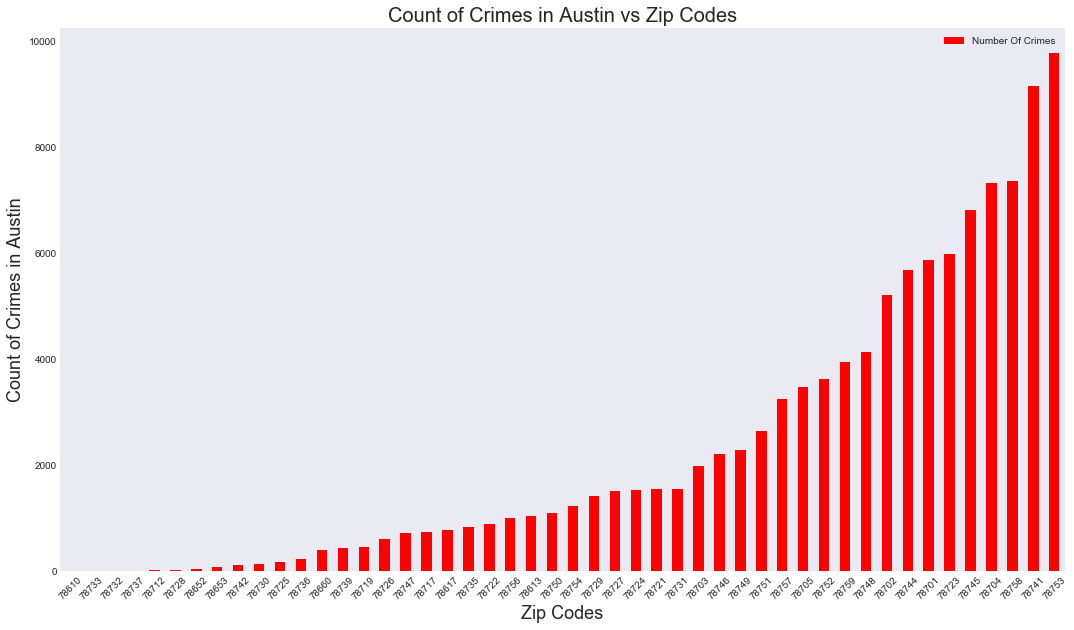

In [81]:
plt.style.use('seaborn-dark')

df_crime_zip_code.plot(x='Zip',y='Number Of Crimes', kind='bar',figsize=(18,10),color=['red','yellow','black']);
plt.xticks(rotation=45);
plt.xlabel('Zip Codes' ,fontsize=(18))
plt.ylabel('Count of Crimes in Austin',fontsize=(18))
plt.title('Count of Crimes in Austin vs Zip Codes',fontsize=(20));